### Predicting the Global Sales Performance of Video Games
### Import the libraries

In [1]:
#import libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random

### Load the dataset

In [2]:
#using the pandas library, read in the video games sales dataset (csv file)
video_games = pd.read_csv('Video_Games.csv')

In [3]:
#view dataset
video_games

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [4]:
#view first 5 rows of dataset
video_games.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [5]:
#view the columns in the dataset
video_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
#check dataset information
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### About the Video Games Sales Dataset
- The dataset contains 16 columns as detailed above
- The dataset has 16719 rows.
- The dependent variable is Global sales
- 10 columns in the dataset have missing data 
- 9 of the columns have float as data types while the others have object as their datatype
- The datatype for year_of_release and user_score columns is not correct and needs to be converted to integer and float respectively
### The objective of this task is to predict sales performance of several video games worldwide i.e. Global_Sales

## Data Preprocessing

In [7]:
#checking the number of null values in each column
video_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
#check for empty string " " in the dataset
video_games.eq(" ").sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [9]:
#check if any duplicated data
video_games.duplicated().sum()

0

#### Observations
- There are no duplicates
- There are no empty strings in the dataset
- Expectedly, some of these columns may not be relevant to the training and prediction exercise and may be dropped if determined to be irrelevant
- The cleaning exercise will start from the critic_score, critic_count, user_score and user_count as they may be relevant to the exercise

In [10]:
#check statistics and details of all data
video_games.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000


- The target variable is Global sales 
- This is supervised leaning and regression analysis will be used.
- From the statistics above, there are outliers in the data especially in NA_sales, EU_sales, JP_Sales, other_sales and User_count
- The max values in these columns have very high values that are different from the general distribution of the data up to the 75th percentile.
- There is thus a need to treat outliers

In [11]:
# select the categorical columns and entries; then assign to a variable called vidgame_obj
vidgame_obj = video_games.select_dtypes(include='object')

#check the descriptive statistics of the categorical variable
vidgame_obj.describe()

Name Platform   Genre        Publisher  \
count                         16717    16719   16717            16665   
unique                        11562       31      12              581   
top     Need for Speed: Most Wanted      PS2  Action  Electronic Arts   
freq                             12     2161    3370             1356   

       User_Score Developer Rating  
count       10015     10096   9950  
unique         96      1696      8  
top           tbd   Ubisoft      E  
freq         2425       204   3991

#### Observations
- PS2 is the most frequently used platform
- The most occuring Genre is Action
- The most frequent Publisher is Electronic Arts
- tbd is a text in the user_score and it is most frequent, this may have caused the wrong data type object instead of integer
- Ubisoft is the highest occuring developer
- E is the highest rating


In [12]:
#chceking the unique value and counts of all the categores by iterating with a for loop
for col in vidgame_obj:
    print(video_games[col].value_counts())
    print()

Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11562, dtype: int64

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO

- Publisher, Developer and Names have too many unique values to use as labels 
- Rating, Genre and Platform will be used for clasification. 
- Platform has a lot of values with few counts, I will group the values with counts less than 500 as 'others'

## Data Cleaning

### Genre

In [13]:
#drop rows with null values in the Genre column since they are just 2 and is not expected to significantly affect the dataset
video_games.dropna(subset= ['Genre'], inplace = True)
#reset index of data after dropping rows
video_games.reset_index(drop= True, inplace = True)

In [14]:
video_games.Genre.isnull().sum()

0

### Critic Score and Critic Count
- Both columns have the same number of null values so they may be related.

In [15]:
#checking null values in critic_score
video_games.Critic_Score.isnull().sum()

8580

In [16]:
#checking null values in critic_count
video_games.Critic_Count.isnull().sum()

8580

In [17]:
video_games.Critic_Score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [18]:
video_games.Critic_Count.describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

- The minimum critic score and critic count are 13 and 3 respectively.
- It is safe to fill the null values in both columns with 0
- This will be easily identifiable since the critic score and counts did not have any 0 value before.

In [19]:
#fill empty values in critic score and critic count with zero
video_games.Critic_Score.fillna(0, inplace = True)
video_games.Critic_Count.fillna(0, inplace = True)

In [20]:
#check that the null values have been resolved
video_games.Critic_Score.isnull().sum()

0

In [21]:
video_games.Critic_Count.isnull().sum()

0

### User Score

In [22]:
#replace the text value tbd noted in the description of the categorical variables with NaN
video_games.User_Score.replace('tbd',np.nan, inplace = True)

In [23]:
#now checking null values
video_games.User_Score.isnull().sum()

9127

#### Observations
- After replacing tbd with NaN, the number of null values in the User_Score column is now 9129, same as the number of null values in User_Count.
- The above implies that for every place where User_Score was tbd, User_Count was null
- After removing the string in the User_Score column, I convert the data type from object to float

In [24]:
#convert and check datatype
video_games.User_Score = video_games.User_Score.astype('float')
video_games.User_Score.dtype

dtype('float64')

In [25]:
#checking the descriptive statistics of User_Score
video_games.User_Score.describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

In [26]:
video_games.User_Score.mode()

0    7.8
Name: User_Score, dtype: float64

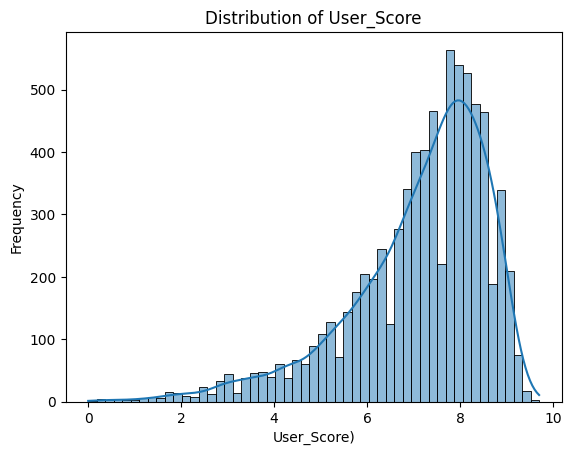

In [27]:
#univariate plot of the Age column
sbn.histplot(data = video_games, x = "User_Score", kde = True); #plot histogram
plt.title("Distribution of User_Score") #add a title
plt.xlabel("User_Score)") #add x-label
plt.ylabel("Frequency") #add y-label
plt.savefig('UserScore.png') #save image

#### Observations
- The minimum value in the User_Score column is 0 so the null values here cannot be replaced with 0
- The mean, median and mode values as seen above are close, and the distribution appears to be roughly normal though slightly skewed to the left.
- So the null values here will be filled using Linear interpolation method

In [28]:
# Use linear interpolation to fill missing values
video_games['User_Score'].interpolate(method='linear', inplace=True)

# Verify that all missing values have been filled
video_games['User_Score'].isnull().any()


False

### User Count

In [29]:
#check descriptive statistics of the User_Count column
video_games.User_Count.describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

#### Observations
- The minimum value in the User_Count column is 4, so the null values here can be replaced with 0
- This will also make it easy to identify user scores that were previously null. Even though they had been filled with the median, where the count is 0, the score must have been null

In [30]:
#fillna with zero
video_games.User_Count.fillna(0, inplace = True)

In [31]:
#check that missing values have been filled
video_games.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating             6767
dtype: int64

#### Observations
- The null values in Year_of_Release, Genre, Critic_Score, Critic_Count, User_Score and User_Count have now been cleaned
- The Name of the video game, the Publisher and the Developer may not be relevant to predicting the Global sales as they have too many unique values to be used as labels

### Rating

In [32]:
#The rating of the games with missing values is not known so these will be replaced with unknown
video_games.Rating.fillna('unknown', inplace = True)

In [33]:
#check that missing values have been resolved
video_games.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
dtype: int64

### Platform

In [34]:
video_games.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [35]:
video_games.Platform.nunique()

31

#### Observations
- Platforms may significantly contribute to the global sales of video game, such as PS2 which is very popular
- However this column has 31 unique values which is too many as machines do not recognise string and they will be converted to number
- For each unique value converted to number in one hot encoding, a column is created, so using all the above will create 31 columns for training the model which will be too complex and may result in overfitting
- To resolve this, I will select platforms with value_counts above 500 while the rest will be set to others, reducing the number of unique values used to 12

In [36]:
#set floor limit to 500
f_limit = 500

#assign value count of the platform column to a variable name
platform_vc = video_games.Platform.value_counts()

#create a list containing only the platforms with minimum of 500 count
top_platform = platform_vc[platform_vc.values>=f_limit].index.tolist()

#check platform list with count of 500 or above
top_platform

['PS2',
 'DS',
 'PS3',
 'Wii',
 'X360',
 'PSP',
 'PS',
 'PC',
 'XB',
 'GBA',
 'GC',
 '3DS']

In [37]:
#create an empty list to append the platforms with minimum of count of 500 and flag those less than 500 as flag 0
allplatform_list = []

for i in range(video_games.shape[0]): #iterate over the rows in video game data
    pform = video_games.Platform.values[i] #select platform items in each row
    flag = 0 #flag the variable pform
    for item in top_platform: #iterating over the list of platforms with count of 500 or above
        if item in pform and flag == 0: #check if the item is in the row
            allplatform_list.append(item) #append the item to the all platform list
            flag = 1 #and change the flag to 1
    if flag == 0: #if the platform item in each row is not in the top_platform list
        allplatform_list.append('Others') #append the item to the all platform list as others

In [38]:
#create a new column in my video_game dataset and fill it with the all platform list
video_games['Main_Platforms'] = allplatform_list

In [39]:
#check values in the new column
video_games['Main_Platforms'].value_counts()

DS        2672
PS2       2161
PS        2022
Wii       1467
Others    1416
PS3       1331
X360      1262
PSP       1209
PC         975
XB         824
GBA        822
GC         556
Name: Main_Platforms, dtype: int64

In [40]:
video_games.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
Main_Platforms        0
dtype: int64

## Data Visualisation 
### Univariate plots of Numerical features

<Figure size 768x576 with 0 Axes>

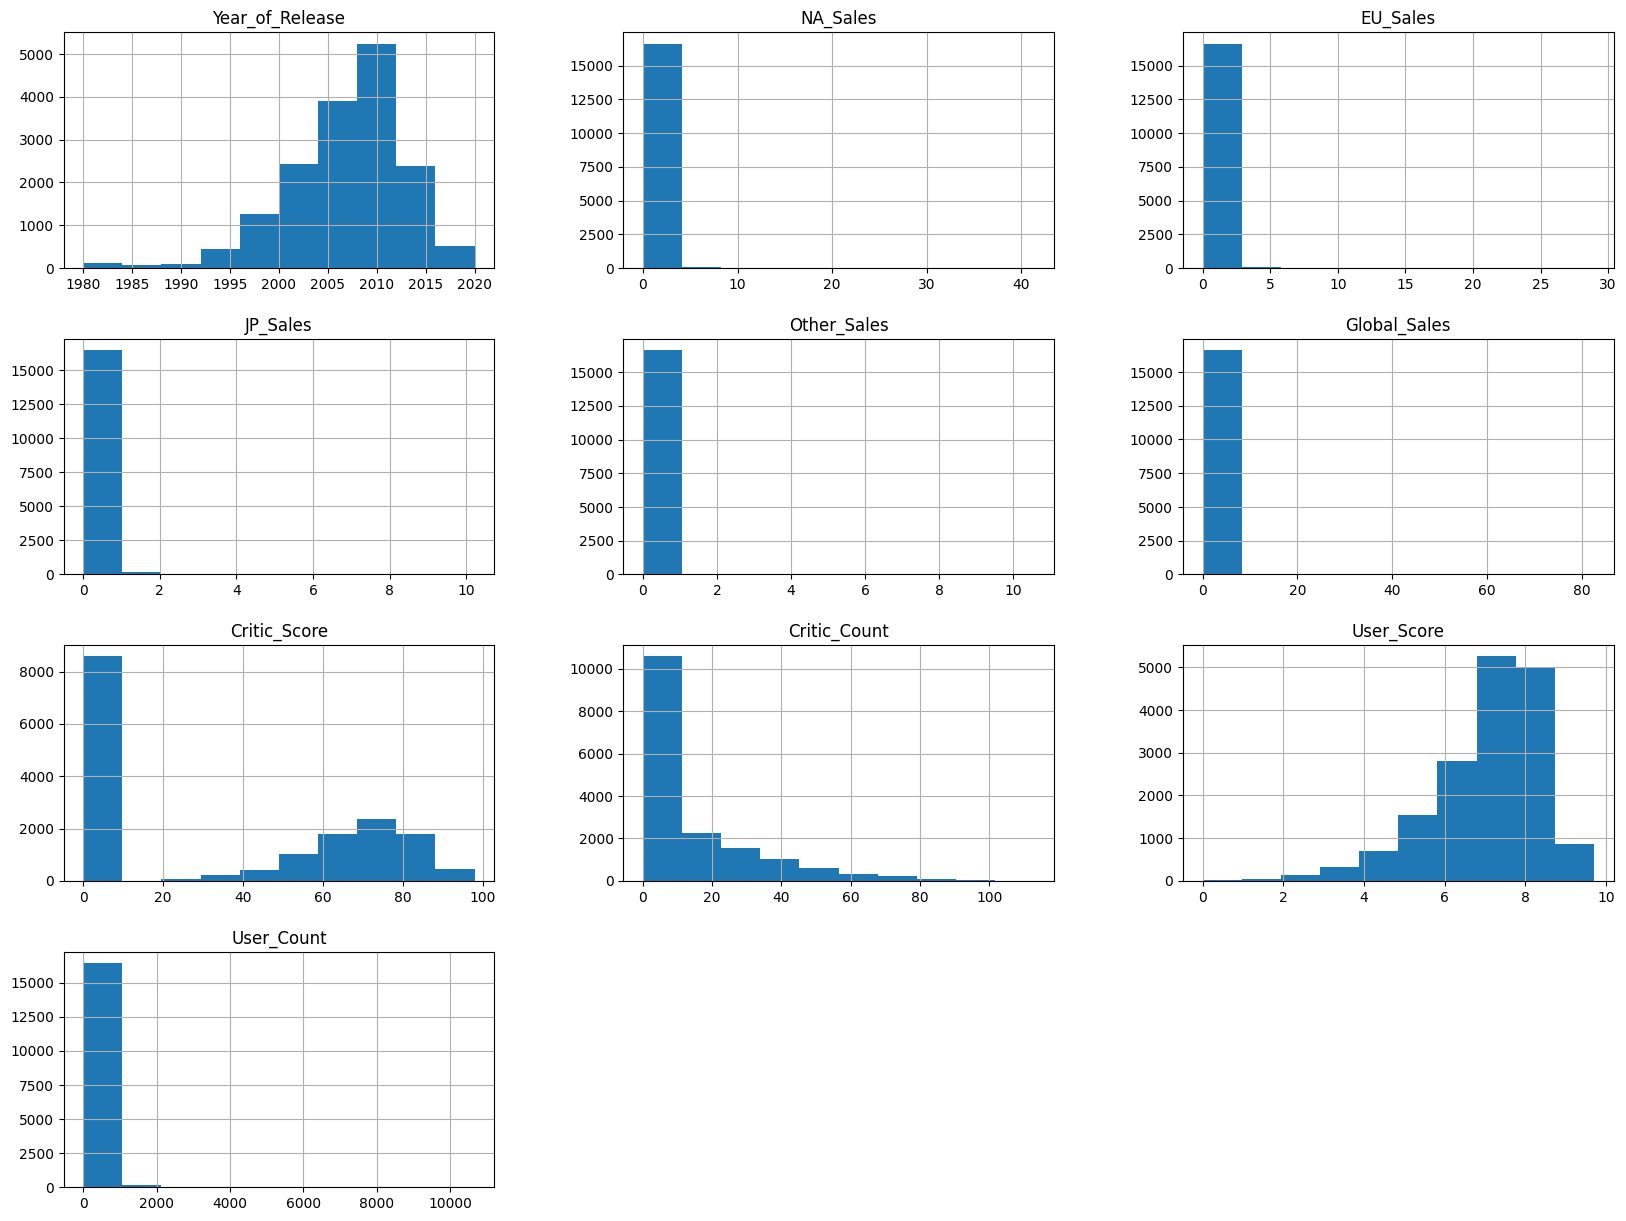

In [41]:
#Checking the distribution of the numerical columns in the data
plt.figure(dpi = 120)
video_games.hist(figsize = (20, 15))
plt.show()

In [42]:
# select the numeric columns and entries; then assign to a variable called vidgame_num
vidgame_num = video_games.select_dtypes(include='number')


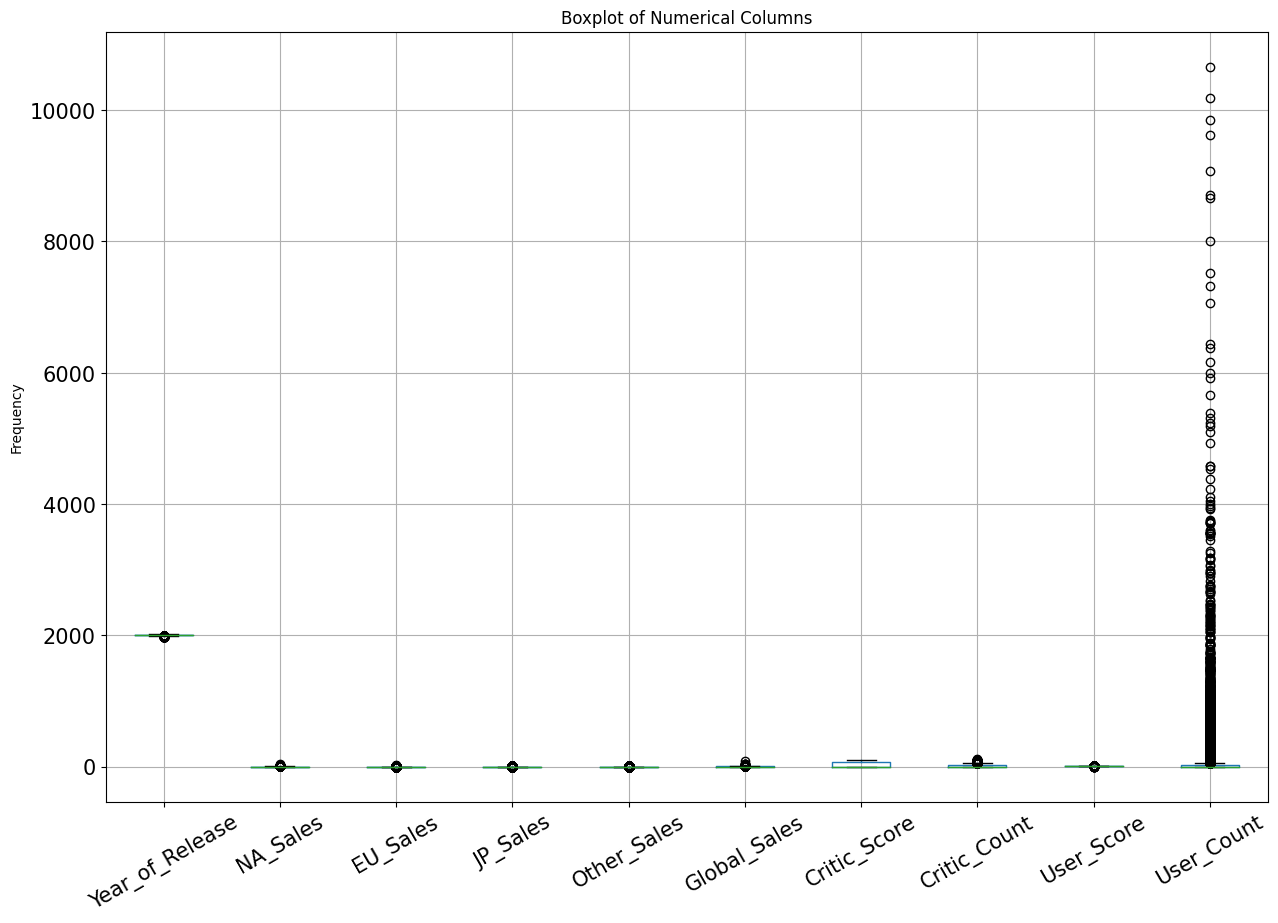

In [43]:
#Boxplot of the numerical columns in the dataset
vidgame_num.boxplot(figsize = (15,10), fontsize = 15, rot = 30) 
plt.ylabel('Frequency')
plt.title('Boxplot of Numerical Columns')
plt.show() # plot shows the count of each numerical entry


#### Observations
- The distribution of Year of Release appears to be normal with outliers to the left side of the plot
- The plot of sales in the various regions and Global sales have similar distribution with outliers to the right side of the plot
- The plot of Critic score, critic count, user score and user count have 0 as the highest frequency, noting that was what was used to fill the null values
- User score appears to be slightly left skewed.
- The boxplot also shows that the data set has several outliers.

### Univariate plots of Categorical features

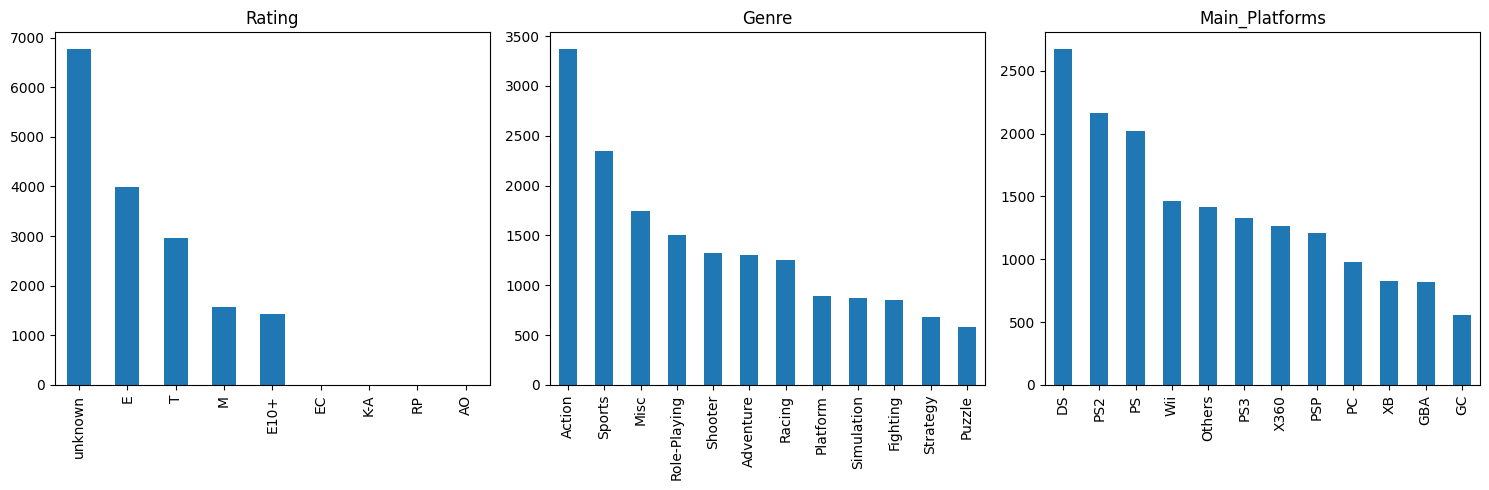

In [44]:
# select the new categorical columns and entries; then assign to a variable called vidgame_obj2
vidgame_obj2 = video_games.select_dtypes(include='object')

#selecting the categorical variables from object
vid_cols = ['Rating', 'Genre', 'Main_Platforms']
vidgames_cat = vidgame_obj2[vid_cols]

# Get the number of columns in 'vid_obj'
num_cols = len(vidgames_cat.columns)

# Set the size of the plot based on the number of columns

fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(num_cols*5, 5))

# Loop through the columns and create a bar chart for each one
for i, col in enumerate(vidgames_cat.columns):
    vidgames_cat[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


#### Observations
- The plots show the frequency of Ratings, Genre and Main_Platforms of video games sales
- Unknown can be disregarded since that was what we used to fill null values in Rating.
- The rating with the highest frequency is 'E', followed by 'T' then 'M'
- The most frequent Genre is Action
- DS has the highest frequency of the video games platform, followed by PS2 and PS

### Heatmap

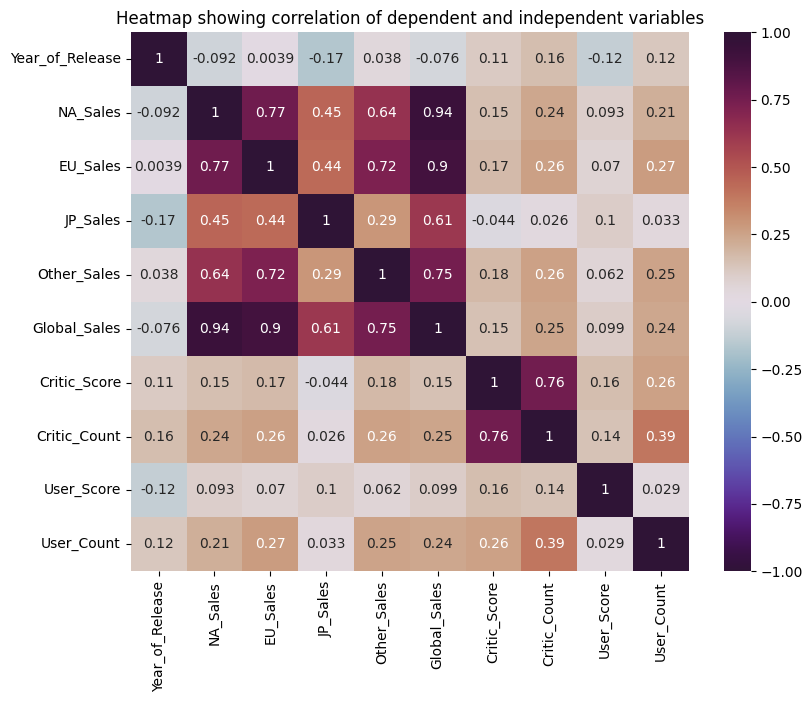

In [45]:
#Plotting a heatmap
vid_corr = vidgame_num.corr() #compute correlation
plt.figure(figsize = (9,7)) #set figure size
sbn.heatmap(vid_corr, annot = True, vmin = -1, vmax = 1, cmap =
            'twilight_shifted').set(title = 'Heatmap showing correlation of dependent and independent variables');

- The heat map explains the relationship between the target variable (Global_sales) and each of the other variables
- NA_sales and EU_sales are highly correlated to the target variable with 94% and 90% correlation respectively and the relationship is positive
- Other_sales and JP_sales are also correlated to Global_sales with 75% and 61% respectively and the relationship is positive
- Critic score, critic count and user count have a moderate positive correlation 
- NA_sales and EU_sales are also highly correlated and may result in multi-colinearity, this is also seen between some of the independent variables
- Year of Release and User Score have almost no correlation with the dependent variable


### Bivariate Plots

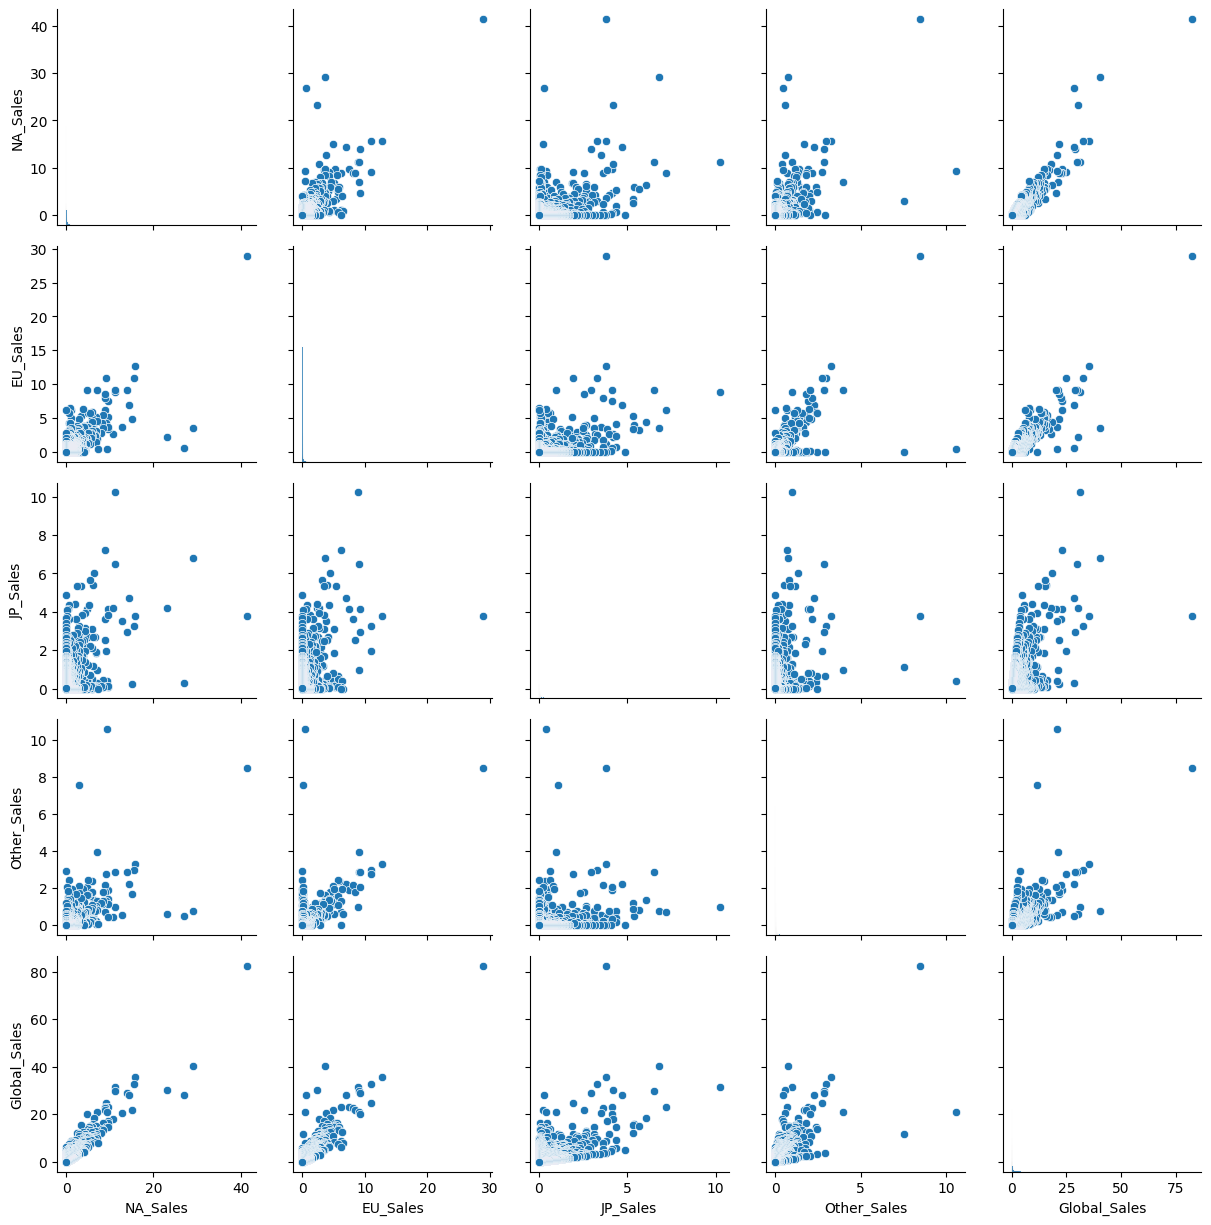

In [46]:
# Select columns of interest
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Create a pairgrid
g = sbn.PairGrid(vidgame_num[cols])

# Plot histograms on the diagonal
g.map_diag(sbn.histplot)

# Plot scatterplots on the off-diagonal
g.map_offdiag(sbn.scatterplot)

#### Observations
- The relationship of Global_Sales with sales in other regions is positive with a few outliers as seen the last row of the pair plots above
- NA_Sales and EU_Sales have the strongest positive relationship with Global_Sales
- Sales in each region has also positively related though somewhat weak except EU_Sales vs Other_Sales in row 2

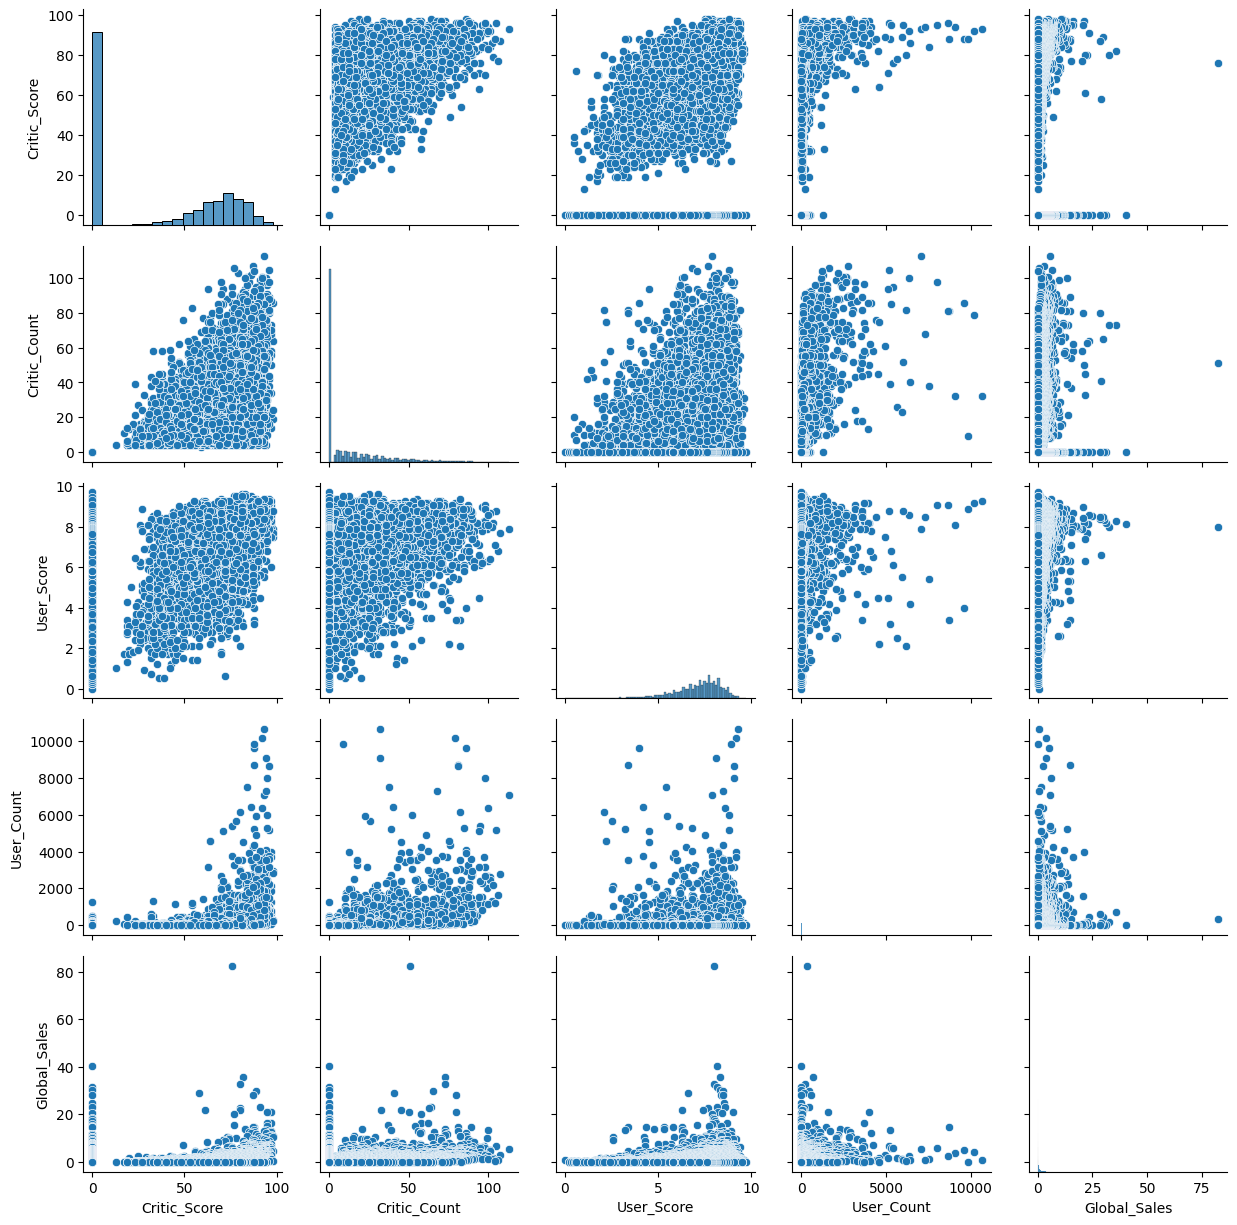

In [47]:
# Select columns of interest
cols2 = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

# Create a pairgrid
grid2 = sbn.PairGrid(vidgame_num[cols2])

# Plot scatterplots on the diagonal
grid2.map_diag(sbn.histplot)

# Plot scatterplots on the off-diagonal
grid2.map_offdiag(sbn.scatterplot)

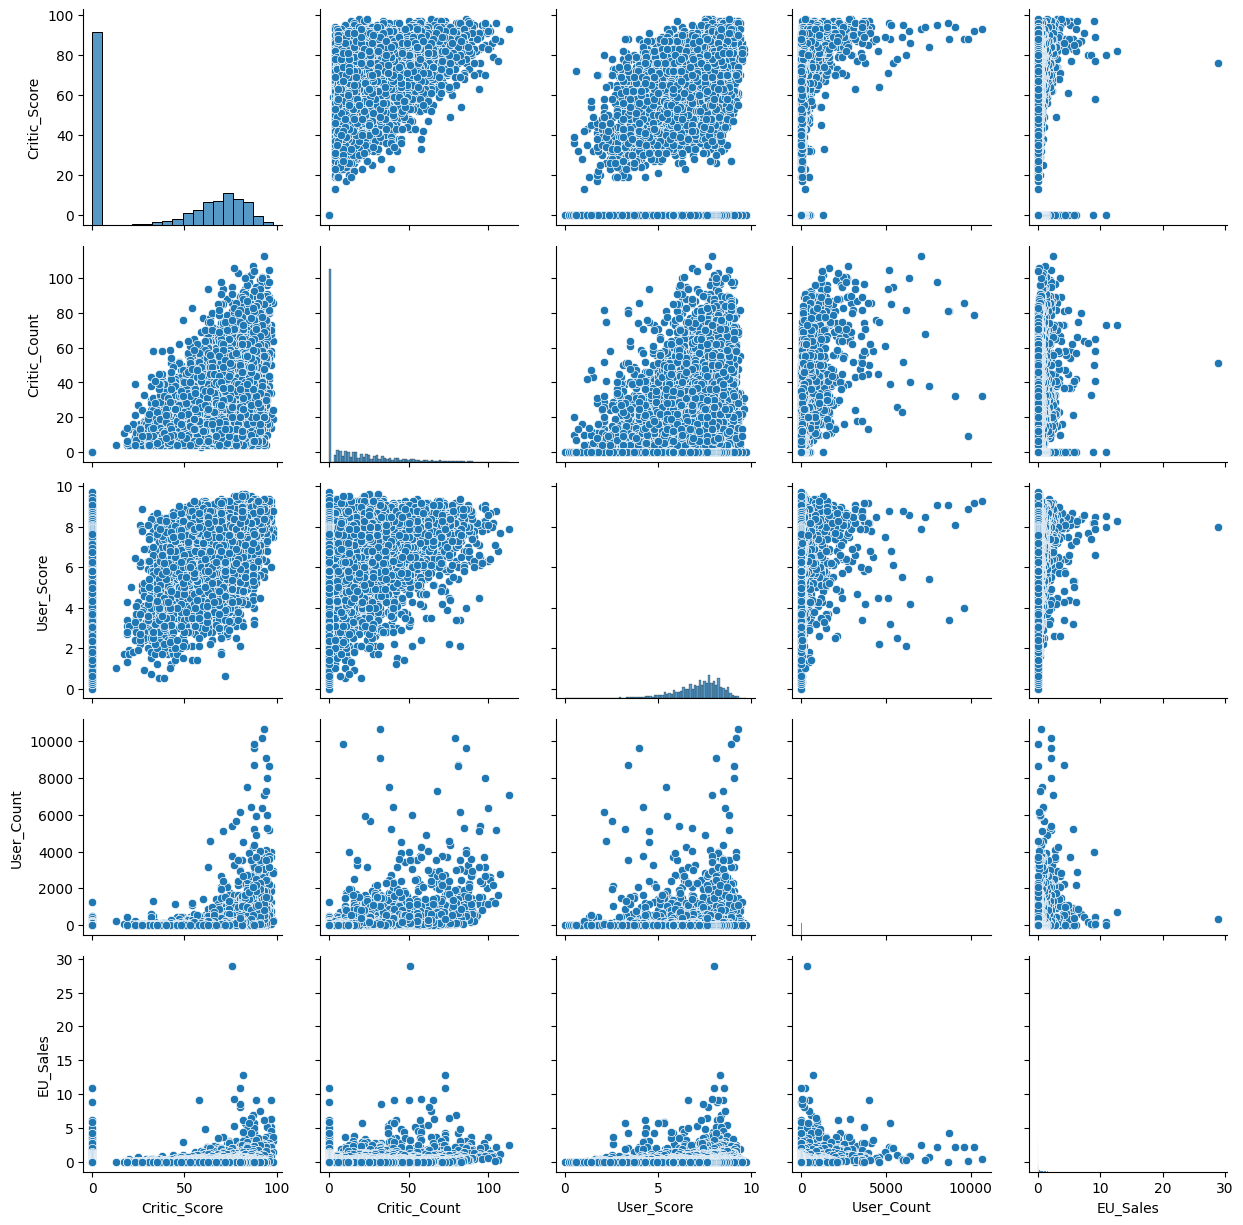

In [48]:
# Select columns of interest
cols3 = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'EU_Sales']

# Create a pairgrid
grid3 = sbn.PairGrid(vidgame_num[cols3])

# Plot scatterplots on the diagonal
grid3.map_diag(sbn.histplot)

# Plot scatterplots on the off-diagonal
grid3.map_offdiag(sbn.scatterplot)

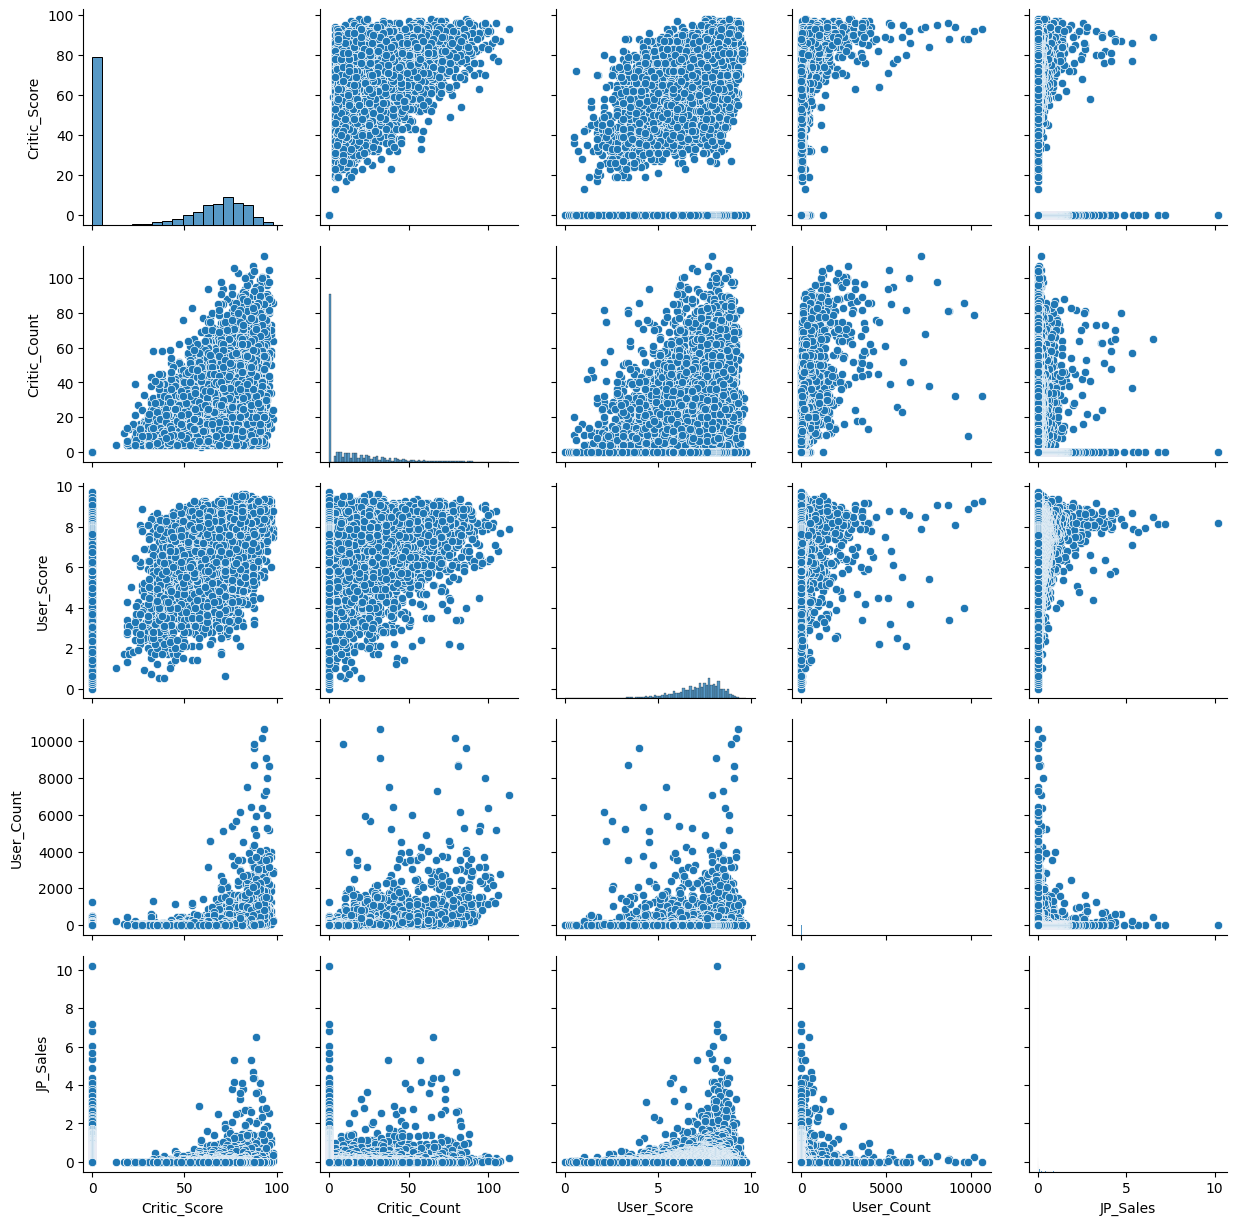

In [49]:
# Select columns of interest
cols4 = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'JP_Sales']

# Create a pairgrid
grid4 = sbn.PairGrid(vidgame_num[cols4])

# Plot scatterplots on the diagonal
grid4.map_diag(sbn.histplot)

# Plot scatterplots on the off-diagonal
grid4.map_offdiag(sbn.scatterplot)

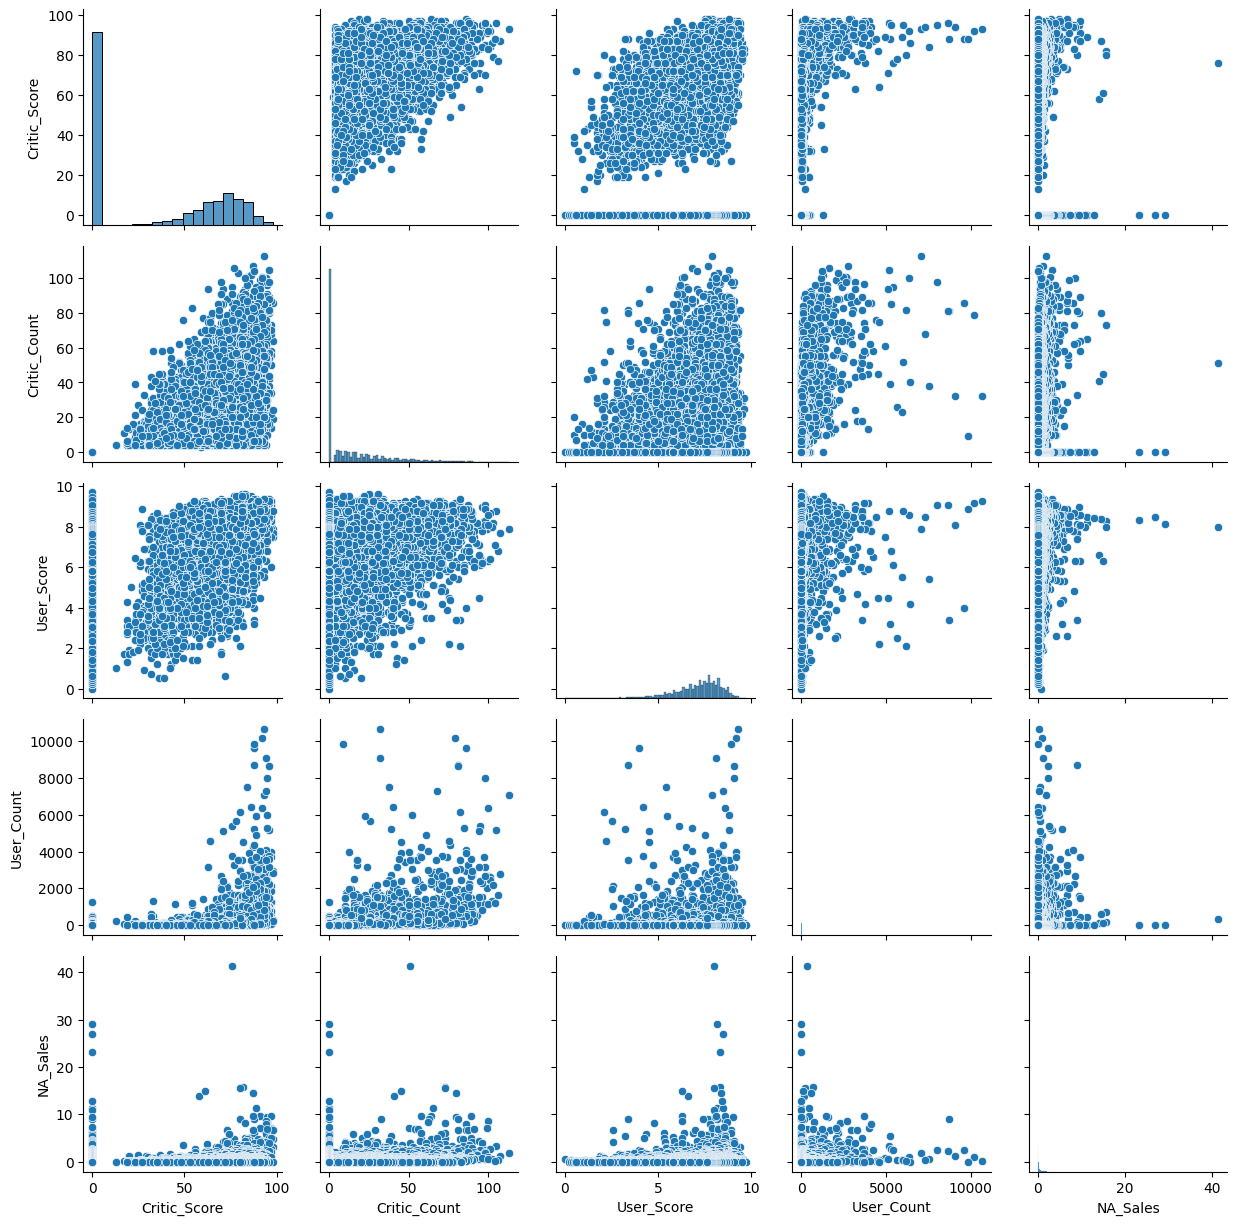

In [50]:
# Select columns of interest
cols5 = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'NA_Sales']

# Create a pairgrid
grid5 = sbn.PairGrid(vidgame_num[cols5])

# Plot scatterplots on the diagonal
grid5.map_diag(sbn.histplot)

# Plot scatterplots on the off-diagonal
grid5.map_offdiag(sbn.scatterplot)

#### Observations
- There is no clear nor strong relationship between variables and Global_Sales in the scatter plots above

### Treating Outliers

In [1]:
#outlier detection using boxplot

#outlier detection using boxplot
plt.figure(figsize = (20,30))
for i, variable in enumerate (vidgame_num):
    plt.subplot(5,4, i + 1)
    plt.boxplot(video_games[variable])
    plt.title(variable)

plt.show()


NameError: name 'plt' is not defined

In [52]:
vidgame_num.drop('Global_Sales', axis = 1, inplace = True)
vidgame_num.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [53]:
def treating_outliers(data, column):
    '''
    Treating outliers in each column

    column: This is the name of the numerical variable
    data: This is the dataFrame
    '''

    Q1 = data[column].quantile(0.25)  #25th quantile
    Q3 = data[column].quantile(0.75)  #75th quantile
    IQR = Q3 -Q1                     #calculating the Inter Quartile range
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR) 
    #replace the outliers with the nearest non-outlier value that is within 1.5 times the IQR using numpy clip function
    data[column] = np.clip(data[column], lower_whisker, upper_whisker) 
    return data
    '''
    Below is a function iterating through all the columns in the numerical 
    data to treat the outliers there by applying the function above
    '''
def all_column_outliers(data, col_list):
    for c in col_list:
        data = treating_outliers(data, c)
    return data

In [54]:
#apply the all column function on the dataset
video_games = all_column_outliers(video_games,vidgame_num)

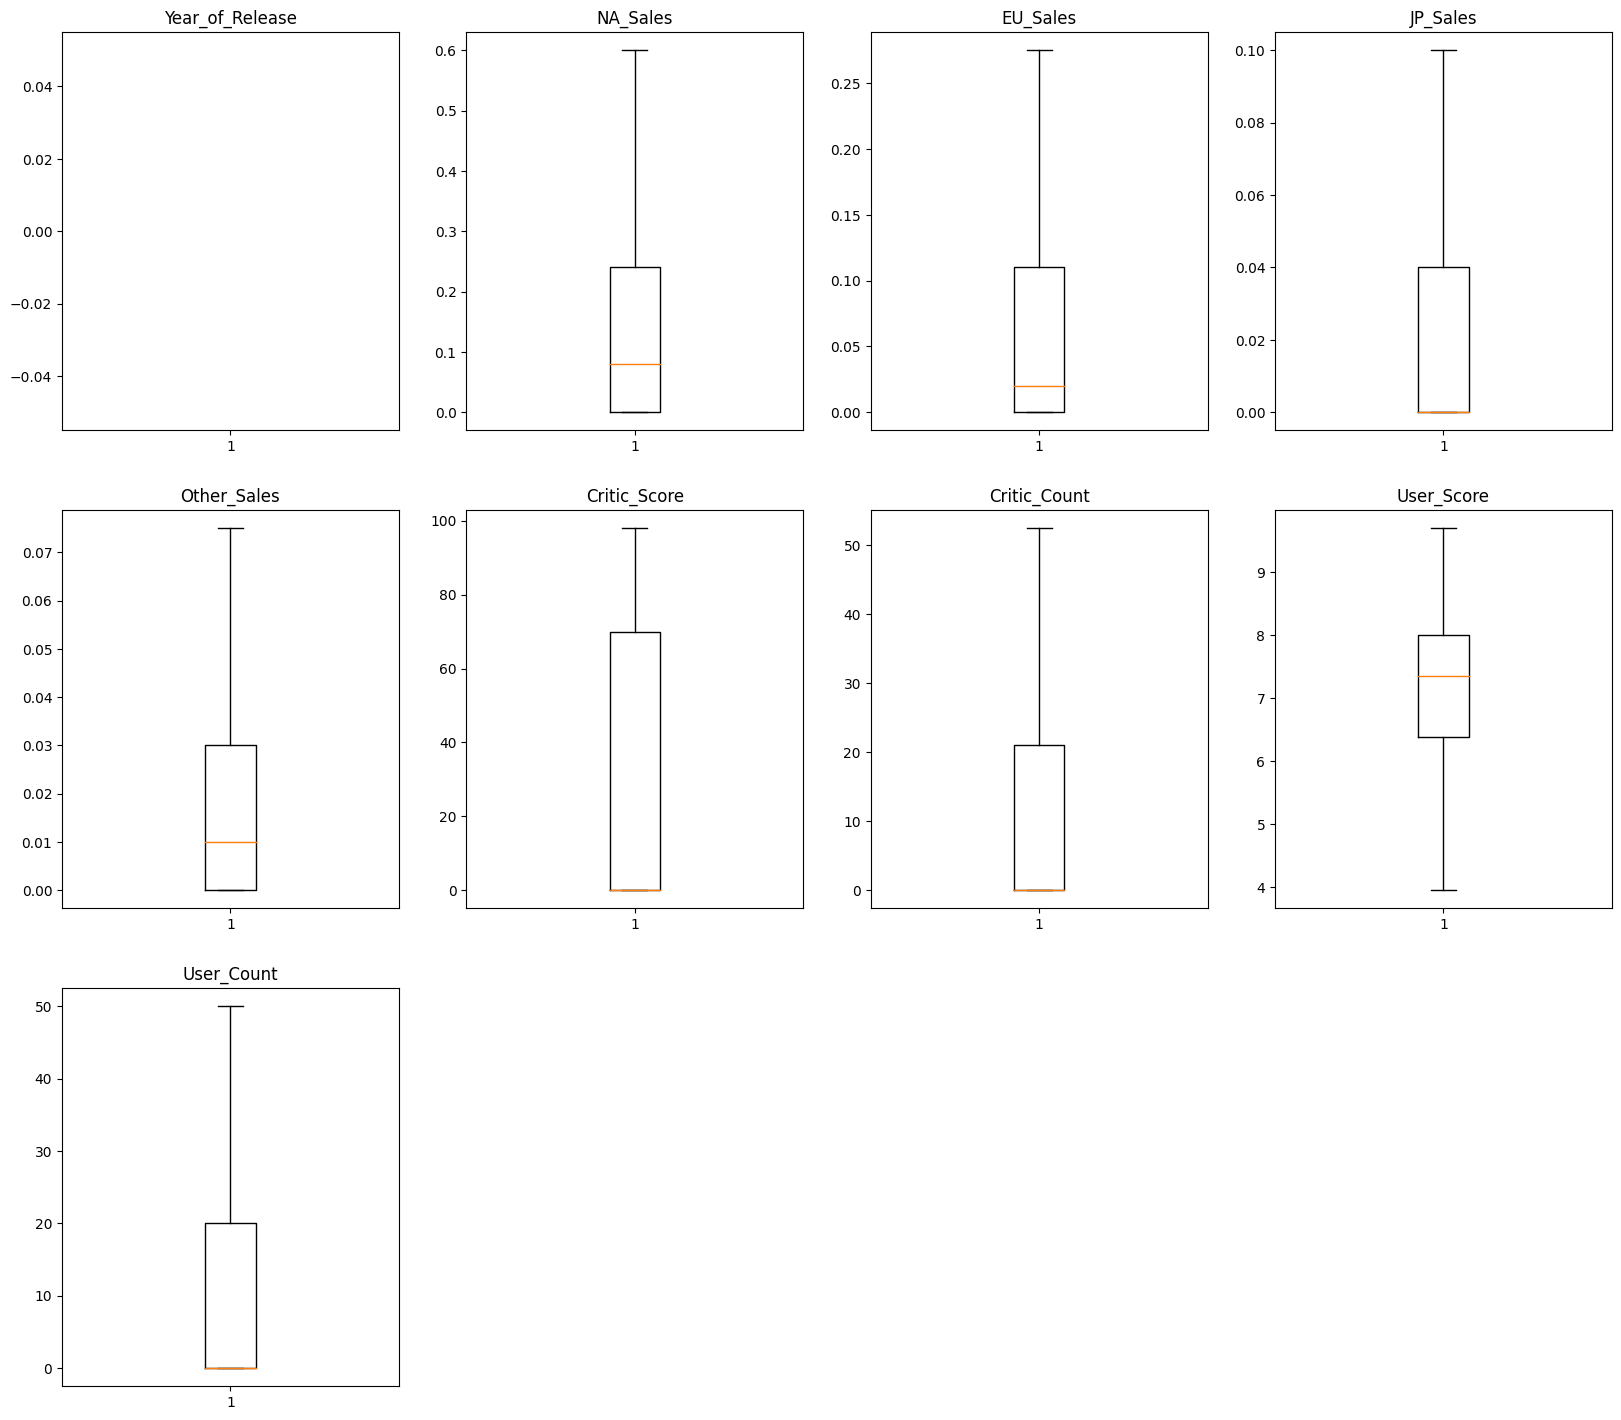

In [55]:
#checking outlier treatment using boxplot
plt.figure(figsize = (20,30))
for i, variable in enumerate (vidgame_num):
    plt.subplot(5,4, i + 1)
    plt.boxplot(video_games[variable], whis = 1.5)
    plt.title(variable)

plt.show()

In [56]:
'''transform the dependent variable using np log transformation to make the target approximately normally distributed where 
the mean and median are close in value 
'''
video_games['Global_Sales_log'] = np.log(video_games['Global_Sales'])


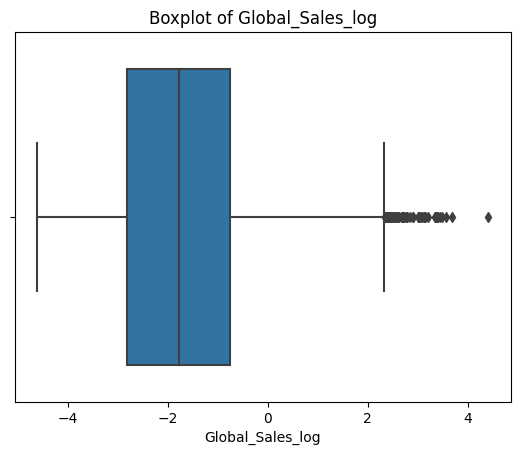

In [57]:
#plot graphs using the logged variable
sbn.boxplot(data = video_games, x ='Global_Sales_log').set(title = 'Boxplot of Global_Sales_log');

### Building the ML model
#### Multiple Linear Regression

In [58]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [59]:
video_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Main_Platforms', 'Global_Sales_log'],
      dtype='object')

#### Feature Selection

In [60]:
#feature selections and dependent variable
X = video_games[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 
                 'User_Count', 'Rating', 'Main_Platforms']]
y = video_games['Global_Sales_log'] 

In [61]:
#check the data
X.isnull().sum()

Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Critic_Score      0
Critic_Count      0
User_Score        0
User_Count        0
Rating            0
Main_Platforms    0
dtype: int64

In [62]:
#convert categorical features to numerical data using OneHotEncoding
X = pd.get_dummies(X, drop_first = True)
X.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0       0.6     0.275       0.1        0.075          76.0          51.0   
1       0.6     0.275       0.1        0.075           0.0           0.0   
2       0.6     0.275       0.1        0.075          82.0          52.5   
3       0.6     0.275       0.1        0.075          80.0          52.5   
4       0.6     0.275       0.1        0.075           0.0           0.0   

   User_Score  User_Count  Genre_Adventure  Genre_Fighting  ...  \
0    8.000000        50.0                0               0  ...   
1    8.150000         0.0                0               0  ...   
2    8.300000        50.0                0               0  ...   
3    8.000000        50.0                0               0  ...   
4    8.166667         0.0                0               0  ...   

   Main_Platforms_GC  Main_Platforms_Others  Main_Platforms_PC  \
0                  0                      0                  0   
1                  0                      1                  0   
2                  0                      0                  0   
3                  0                      0                  0   
4                  0                      1                  0   

   Main_Platforms_PS  Main_Platforms_PS2  Main_Platforms_PS3  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   Main_Platforms_PSP  Main_Platforms_Wii  Main_Platforms_X360  \
0                   0                   1                    0   
1                   0                   0                    0   
2                   0                   1                    0   
3                   0                   1                    0   
4                   0                   0                    0   

   Main_Platforms_XB  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 38 columns]

In [63]:
#split the data into subset and test sets
x_sub, x_test, y_sub, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_sub, y_sub, test_size = 0.2, random_state = 0)

In [64]:
x_train.shape

(10698, 38)

In [65]:
x_test.shape

(3344, 38)

In [66]:
x_val.shape

(2675, 38)

In [67]:
#normalise the data using standard scaler
scaler = StandardScaler()
#fit and transform transform train data
x_train_ft = scaler.fit_transform(x_train)
#transform validation data and test data
x_val_ft = scaler.transform(x_val)
x_test_ft = scaler.transform(x_test)

In [68]:
#instantiate linear regression model
lr = LinearRegression()
#train the model using the training sets
lr.fit(x_train_ft, y_train)


LinearRegression()

### Model Evaluation

In [69]:
#importing model evaluation tools
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
'''
define a function to compute adjusted R-Squared. The higher the adjusted R_squared the better the model, this method adjusts 
for the multiple features used in predicting the target variable.
'''
def adj_r2(predictors, targets, predictions):
    r2 = r2_score(targets, predictions) # Calculate the r2 score
    n = predictors.shape[0]              # Get the number of samples
    k = predictors.shape[1]              # Get the number of predictors
    return 1 - ((1-r2) * (n - 1) / (n-k-1)) # Calculate and return the adjusted r2 score

'''
define a function to compute different metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) etc., to check
the performance of the regression model
'''  

def model_performance_metrics(model, predictors, target):
    ypred = model.predict(predictors)                      #testing the model

    r2  = r2_score(target,ypred)                            #Computing R-squared
    adjr2 = adj_r2(predictors, target, ypred)               #Computing adjusted R-squared
    mse = mean_squared_error(target, ypred)                 #Computing MSE
    rmse = np.sqrt(mse)                                     #Computing RMSE
    mae = mean_absolute_error(target, ypred)                #Computing MAE
  

    #Creating a list of dictionaries containing the performance metrics 
    metrics_list = [{"Model Name" : type(model).__name__,
                     "MSE": mse, 
                     "RMSE": rmse, 
                     "MAE": mae, 
                     "R-Squared": r2, 
                     "Adj.R-Squared": adjr2}]
    #Creating a dataframe of the performance metrics 
    df_metrics = pd.DataFrame(metrics_list)
    return df_metrics

#### Interpreting Model Performance and Coefficients

In [71]:
#checking the performance of the model on the training set
lr_train = model_performance_metrics(lr, x_train_ft, y_train)
lr_train

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0  LinearRegression  0.382643  0.618581  0.484173   0.821805       0.821169

- The Rsquared measure indicates that 82% of the variation in the Global sales was explained by all the variables in the dataset
- The adjusted rsquared adjust for the multiple features in the dataset
- RMSE and MAE are not too high though the closer it is to 0, the better the model

In [72]:
#checking the performance of the model on the validation set
lr_val = model_performance_metrics(lr, x_val_ft, y_val)
lr_val

Model Name       MSE     RMSE       MAE  R-Squared  Adj.R-Squared
0  LinearRegression  0.399867  0.63235  0.491925   0.810718       0.807989

- From the result above the model is not overfitting as the scores for the training and the validation are close, the performance on the train set is similar to the performance on the validation set

In [73]:
#check the coefficients of the variables
print(lr.coef_)
print(x_train.columns)

[ 6.21720251e-01  2.67228457e-01  4.04250231e-01  4.36885574e-01
  2.17920165e-02  2.14792334e-02  1.53143124e-02 -9.90448073e-02
 -7.50773762e-02 -1.04130347e-03  3.20933748e-02  3.91649524e-03
 -1.55539046e-02  1.04925476e-02  2.18708485e-02 -9.99463231e-05
  1.62371432e-02  5.12196005e-02  4.88173184e-03 -2.29481577e+11
 -1.51528101e+11 -1.27772987e+10 -5.21752987e+09 -1.56605258e+11
 -7.37835661e+09 -2.06805609e+11 -2.64849381e+11  4.17158636e-02
  2.46528149e-02  1.21406421e-01 -4.16473059e-02  1.12114363e-02
 -2.42140275e-03 -2.88677791e-02 -4.97933962e-02  1.68642904e-02
  1.90139045e-02  3.21717957e-02]
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating

In [74]:
#take the exponential of the coefficient which is currently in log scale
np.exp(lr.coef_)

array([1.86212862, 1.30633886, 1.49817879, 1.54787895, 1.0220312 ,
       1.02171157, 1.01543218, 0.90570213, 0.9276717 , 0.99895924,
       1.03261392, 1.00392417, 0.98456643, 1.01054779, 1.02211177,
       0.99990006, 1.01636968, 1.05255401, 1.00489367, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.0425982 , 1.02495921, 1.1290837 ,
       0.95920803, 1.01127452, 0.99758153, 0.97154491, 0.95142597,
       1.0170073 , 1.01919582, 1.0326949 ])

In [75]:
for i, col in enumerate (x_train.columns):
    print(f'The coefficient of {col} is {np.exp(lr.coef_[i])}')

The coefficient of NA_Sales is 1.8621286159364132
The coefficient of EU_Sales is 1.3063388550117354
The coefficient of JP_Sales is 1.4981787903402914
The coefficient of Other_Sales is 1.5478789493051734
The coefficient of Critic_Score is 1.0220311967426363
The coefficient of Critic_Count is 1.0217115726848078
The coefficient of User_Score is 1.015432177432774
The coefficient of User_Count is 0.9057021250481483
The coefficient of Genre_Adventure is 0.9276717038241861
The coefficient of Genre_Fighting is 0.998959238499768
The coefficient of Genre_Misc is 1.032613920928409
The coefficient of Genre_Platform is 1.0039241747311858
The coefficient of Genre_Puzzle is 0.9845664326577434
The coefficient of Genre_Racing is 1.0105477874314617
The coefficient of Genre_Role-Playing is 1.0221117687238084
The coefficient of Genre_Shooter is 0.999900058671335
The coefficient of Genre_Simulation is 1.016369682033281
The coefficient of Genre_Sports is 1.052554009320079
The coefficient of Genre_Strategy i

#### Interpretation
- The coefficient of NA sales is 1.86 and this means that for every unit of increase in sales of video_game in North America, the Global Sales will increase by 1.86
- Similar interpretation can be given for each of the coefficients

### Ridge Regression
- This is often used to estimate regression models and solves multicolinearity by shrinking the coefficient of irrelevant variables thereby reducing its impact on the target 
- Ridge Regression is thus useful for regularisation to avoid overfitting

In [76]:
#import the Ridge from sklearn
from sklearn.linear_model import Ridge

#instatiate the model
ridge = Ridge (random_state =0)

#fit the model
ridge.fit(x_train_ft, y_train)

Ridge(random_state=0)

In [77]:
#using a for loop, try different values of alpha to see if the model performance will improve
alpha_values = np.linspace(0.2,10, num =10)
for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha = alpha)
    ridge.fit(x_train_ft, y_train)
    ridge_train = model_performance_metrics(ridge, x_train_ft, y_train)
    print(ridge_train)

  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382643  0.618582  0.484161   0.821804       0.821169
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382643  0.618582  0.484156   0.821804       0.821169
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382643  0.618582  0.484152   0.821804       0.821169
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382643  0.618582  0.484147   0.821804       0.821169
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382643  0.618582  0.484142   0.821804       0.821169
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382643  0.618582  0.484137   0.821804       0.821169
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382644  0.618582  0.484132   0.821804       0.821169
  Model Name       MSE      RMSE  

- The performance remain unchanged even though I tried using different alpha values

In [78]:
#check performance of ridge regression on the training set
ridge_train = model_performance_metrics(ridge, x_train_ft, y_train)
ridge_train

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.382644  0.618582  0.484118   0.821804       0.821169

In [79]:
#check performance of ridge regression on the validation set
ridge_val = model_performance_metrics(ridge, x_val_ft, y_val)
ridge_val

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Ridge  0.399887  0.632366  0.491872   0.810708       0.807979

### Lasso Regression
- An alternative to Ridge for regularising linear regression is the Lasso. The lasso also restricts coefficients to zero, unlike Ridge that shrinks impact, lasso zerorises the irrelevant coefficients

In [80]:
#import lasso from sklearn
from sklearn.linear_model import Lasso

#instatiate the model
lasso = Lasso (random_state =0)

#fit the model
lasso.fit(x_train_ft, y_train)

Lasso(random_state=0)

In [81]:
#using for loop to check the performance of the model while changing alpha to differemt values
alpha_values = np.linspace(0.001,0.2, num =10)
for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha = alpha)
    lasso.fit(x_train_ft, y_train)
    lasso_train = model_performance_metrics(lasso, x_train_ft, y_train)
    print(lasso_train)
    print(alpha)

  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.382704  0.618631  0.484215   0.821776       0.821141
0.001
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.394536  0.628121  0.491014   0.816266       0.815611
0.023111111111111114
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.407296  0.638198  0.497265   0.810324       0.809647
0.045222222222222226
  Model Name      MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.42365  0.650884  0.504934   0.802708       0.802005
0.06733333333333334
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.436618  0.660771  0.508617   0.796669       0.795944
0.08944444444444445
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.452284  0.672521  0.513383   0.789373       0.788622
0.11155555555555556
  Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squar

In [82]:
#check performance of lasso regression using alpha =0.001 
#instatiate the model
lasso = Lasso (random_state =0, alpha = 0.001)

#fit the model
lasso.fit(x_train_ft, y_train)
lasso_train = model_performance_metrics(lasso, x_train_ft, y_train)
lasso_train

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.382704  0.618631  0.484215   0.821776       0.821141

In [83]:
#check performance of lasso regression using on validation dataset
lasso_val = model_performance_metrics(lasso, x_val_ft, y_val)
lasso_val

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.399485  0.632048  0.491987   0.810898       0.808172

In [84]:
for i, col in enumerate (x_train.columns):
    print(f'The coefficient of {col} is {np.exp(lasso.coef_[i])}')

The coefficient of NA_Sales is 1.8641189551675617
The coefficient of EU_Sales is 1.3065506750714262
The coefficient of JP_Sales is 1.4953059216030093
The coefficient of Other_Sales is 1.5431545652208558
The coefficient of Critic_Score is 1.0213024031947875
The coefficient of Critic_Count is 1.0186516265254388
The coefficient of User_Score is 1.0146583630991641
The coefficient of User_Count is 0.9128722036733106
The coefficient of Genre_Adventure is 0.926502906264272
The coefficient of Genre_Fighting is 0.9989956690902395
The coefficient of Genre_Misc is 1.029439618784792
The coefficient of Genre_Platform is 1.0014835826977009
The coefficient of Genre_Puzzle is 0.9839688420540088
The coefficient of Genre_Racing is 1.0077209224164383
The coefficient of Genre_Role-Playing is 1.01960122706102
The coefficient of Genre_Shooter is 1.0
The coefficient of Genre_Simulation is 1.0135069036510633
The coefficient of Genre_Sports is 1.0486812405913093
The coefficient of Genre_Strategy is 1.002406455

#### Support Vector Regression

In [85]:
#import SVR from sklearn
from sklearn.svm import SVR

#instatiate the model
svr = SVR(kernel='linear')

#fit the model
svr.fit(x_train_ft, y_train)

SVR(kernel='linear')

In [86]:
#check performance of support vector regression using training dataset
svr_train = model_performance_metrics(svr,x_train_ft,y_train)
svr_train

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0        SVR  0.398322  0.631127  0.473797   0.814503       0.813842

In [87]:
#check performance of support vector regression using validation dataset
svr_val = model_performance_metrics(svr,x_val_ft,y_val)
svr_val

Model Name      MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0        SVR  0.41691  0.645686  0.478128    0.80265       0.799805

- Looking at the metrics of the 4 regressors adopted above, linear and ridge have the same performance on the validation test
- while SVR is a little worse off than the rest
- The MSE and RMSE in Lasso regression is lower while its r-squared and Adjusted r-squared score is higher.
- This will be used for feature selection to reduce the number of features used for building the model.

### Feature Selection
#### Forward selection
- This involves adding a feature to the model one at a time

In [88]:
#!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
'''though the performance of the models using the three regressors are similar but lasso regression has a slightly better 
performance
'''
lasso_reg = Lasso (random_state =0, alpha = 0.001)

#build the forward feature selection
sfs = SFS(lasso_reg, k_features =x_train.shape[1], forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

sfs = sfs.fit(x_train_ft,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  38 | elapsed:    7.1s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    7.5s finished

[2023-05-04 08:54:16] Features: 1/38 -- score: 0.6559829539815665[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.0s finished

[2023-05-04 08:54:16] Features: 2/38 -- score: 0.7318380463868165[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.0s finished

[2023-05-04 08:54:16] Features: 3/38 -- score: 0.791351235181798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of 

#### Visualise model performance

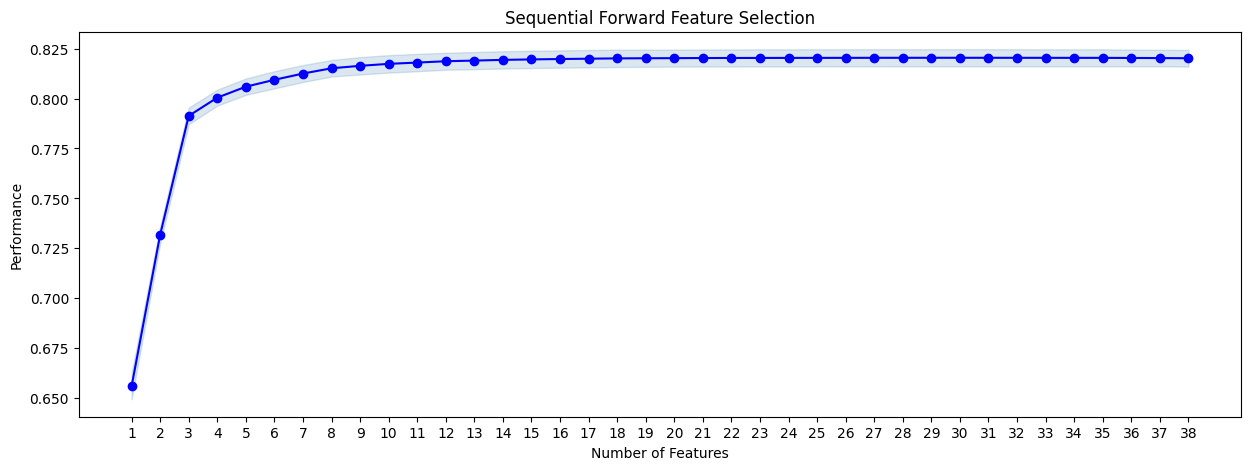

In [89]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind ='std_err', figsize=(15,5));
plt.title('Sequential Forward Feature Selection');

#### Observations
- checking the performance of adding each feature, it shows that the model only marginally improves from the 10th feature, by the 16th feature, the increase is minute and begins to decline by the 30th feature
- This implies that the model will still perform well with as little as 16 features without having to use as much as 34 features

In [90]:
#rebuild the forward feature selection using 16 features
sfs = SFS(lasso_reg, k_features =16, forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

sfs = sfs.fit(x_train_ft,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.0s finished

[2023-05-04 08:54:32] Features: 1/16 -- score: 0.6559829539815665[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished

[2023-05-04 08:54:32] Features: 2/16 -- score: 0.7318380463868165[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished

[2023-05-04 08:54:33] Features: 3/16 -- score: 0.791351235181798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of 

In [91]:
#get the important features
feature_columns = list(sfs.k_feature_idx_)
x_train2 = x_train[x_train.columns[feature_columns]]
x_val2 = x_val[x_val.columns[feature_columns]]
x_test2 = x_test[x_test.columns[feature_columns]]
x_train.columns[feature_columns[:2]] #check important features

Index(['NA_Sales', 'EU_Sales'], dtype='object')

In [92]:
#scale the data
#fit and transform transform train data
x_train2_ft = scaler.fit_transform(x_train2)
#transform test data
x_val2_ft = scaler.transform(x_val2)
x_test2_ft = scaler.transform(x_test2)

### Rebuild the Model using fewer features 
- This will reduce the complexity of the model and avoid overfitting 
- As determined earlier, the model performed better on the validation set when Lasso regression was used.
- The model will thus be rebuilt using 16 features in Lasso Regression

#### Lasso Regression

In [93]:
#rebuild the ridge regression using the selected features
lasso = Lasso (random_state =0, alpha = 0.001)
lasso.fit(x_train2_ft, y_train)

Lasso(alpha=0.001, random_state=0)

In [94]:
#check performance of lasso regression using on training dataset
lasso2_train = model_performance_metrics(lasso,x_train2_ft,y_train)
lasso2_train

Model Name     MSE      RMSE    MAE  R-Squared  Adj.R-Squared
0      Lasso  0.3855  0.620886  0.486   0.820474       0.820205

In [95]:
#check performance of lasso regression using validation dataset
lasso2_val = model_performance_metrics(lasso,x_val2_ft,y_val)
lasso2_val

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.397298  0.630316  0.493058   0.811934       0.810802

- The model's performance is similar on the training set and validations sets with very small differences in the errors and the coefficients of determinant
- The difference between the metrics on the training set and validation is small so the model is not overfitting
- Even though the results are very similar, the lasso regression has the best performance on the validation set with fewer features as its errors are slightly lower and it has the higher coefficient of determinant for both r2-score and adjusted r2-score
- Thus, the Lasso Regression will be used to predict the test data

In [96]:
y_pred= lasso.predict(x_test2_ft)
y_pred

array([-2.47388345, -1.30911134, -1.61678664, ..., -2.73933628,
       -2.15592129, -2.47861335])

In [97]:
lasso2_test = model_performance_metrics(lasso,x_test2_ft,y_test)
lasso2_test

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0      Lasso  0.383148  0.618989  0.487355   0.822424        0.82157

### Non-Linear Regressors
#### Tree based Methods
- These methods give better performance than linear regressors and incorporate feature selection into the methods

In [98]:
#import libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import VotingRegressor

#### Decision Tree

In [99]:
# instantiate the decision tree regressor model
dt = DecisionTreeRegressor(random_state=0)

# fit the model to the training data
dt.fit(x_train_ft, y_train)


DecisionTreeRegressor(random_state=0)

In [100]:
#evaluate model performance on train set
dt_train=model_performance_metrics(dt, x_train_ft, y_train)
dt_train

Model Name       MSE      RMSE       MAE  R-Squared  \
0  DecisionTreeRegressor  0.001496  0.038682  0.002247   0.999303   

   Adj.R-Squared  
0       0.999301

In [101]:
#evaluate model performance on validation set
dt_val=model_performance_metrics(dt, x_val_ft, y_val)
dt_val

Model Name       MSE      RMSE       MAE  R-Squared  \
0  DecisionTreeRegressor  0.127417  0.356955  0.171124   0.939686   

   Adj.R-Squared  
0       0.938816

In [102]:
#checking the importance of each feature by Random Forest Model using visualisations
feature_col = x_train.columns.to_list()

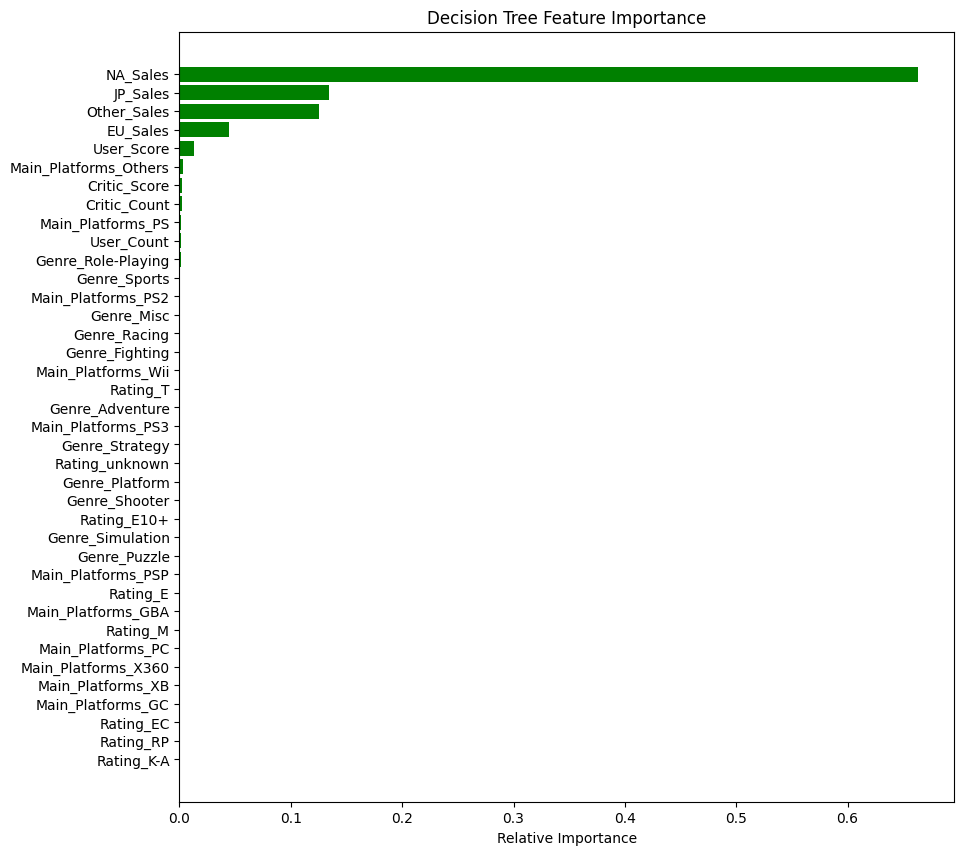

In [103]:
# extract feature importances from decision tree model
feat_importancedt = dt.feature_importances_

# sort the indices of feature importances in ascending order
indices_dt = np.argsort(feat_importancedt)

plt.figure(figsize=(10,10)) # set the size of the plot
plt.title( 'Decision Tree Feature Importance') # set the title of the plot
# create horizontal bar plot of feature importances
plt.barh(range(len(indices_dt)), feat_importancedt[indices_dt], color = 'green', align = 'center')
#label the y-axis with the feature names in the sorted order
plt.yticks(range(len(indices_dt)), (feature_col[i] for i in indices_dt))
plt.xlabel('Relative Importance') # set the x-axis label
plt.show() #display the plot

- Most of the features are not important in predicting the target variable
- The top 4 important features are NA sales, JP Sales, Other sales and EU_Sales

In [104]:
#selecting the top 7 features
top_dtfeatures = []

for i in indices_dt[-1:-8:-1]:
    top_dtfeatures.append(i)

x_traindt = x_train[x_train.columns[top_dtfeatures]]
x_valdt = x_val[x_val.columns[top_dtfeatures]]
x_testdt = x_test[x_test.columns[top_dtfeatures]]
x_train.columns[top_dtfeatures] #check important features

Index(['NA_Sales', 'JP_Sales', 'Other_Sales', 'EU_Sales', 'User_Score',
       'Main_Platforms_Others', 'Critic_Score'],
      dtype='object')

In [105]:
#scale the data
#fit and transform transform train data
x_traindt_ft = scaler.fit_transform(x_traindt)
#transform test data
x_valdt_ft = scaler.transform(x_valdt)
x_testdt_ft = scaler.transform(x_testdt)

#### Rebuilding the model using the top 7 features

In [106]:
# fit the model to the training data with fewer features
dt.fit(x_traindt_ft, y_train)

DecisionTreeRegressor(random_state=0)

In [107]:
#evaluate model performance on train set
dt_train2=model_performance_metrics(dt, x_traindt_ft, y_train)
dt_train2

Model Name       MSE      RMSE       MAE  R-Squared  \
0  DecisionTreeRegressor  0.013583  0.116546  0.021285   0.993674   

   Adj.R-Squared  
0        0.99367

In [108]:
#evaluate model performance on validation set
dt_val2=model_performance_metrics(dt, x_valdt_ft, y_val)
dt_val2

Model Name       MSE      RMSE       MAE  R-Squared  \
0  DecisionTreeRegressor  0.132273  0.363694  0.174611   0.937387   

   Adj.R-Squared  
0       0.937222

- The model uses fewer features, reducing the complexity 
- The performance of the model is good on the training set but its performance on the validation sets is relatively not as good which may indicate overfitting

#### Random Forest

In [109]:
#instantiate the model
rf = RandomForestRegressor(random_state = 0)

#train the model
rf.fit(x_train_ft, y_train)

RandomForestRegressor(random_state=0)

In [110]:
#evaluate model performance on training set
rf_train=model_performance_metrics(rf, x_train_ft, y_train)
rf_train

Model Name       MSE      RMSE       MAE  R-Squared  \
0  RandomForestRegressor  0.012091  0.109961  0.052475   0.994369   

   Adj.R-Squared  
0       0.994349

In [111]:
#evaluate model performance on validation set
rf_val=model_performance_metrics(rf, x_val_ft, y_val)
rf_val

Model Name      MSE      RMSE       MAE  R-Squared  \
0  RandomForestRegressor  0.08196  0.286287  0.144153   0.961203   

   Adj.R-Squared  
0       0.960644

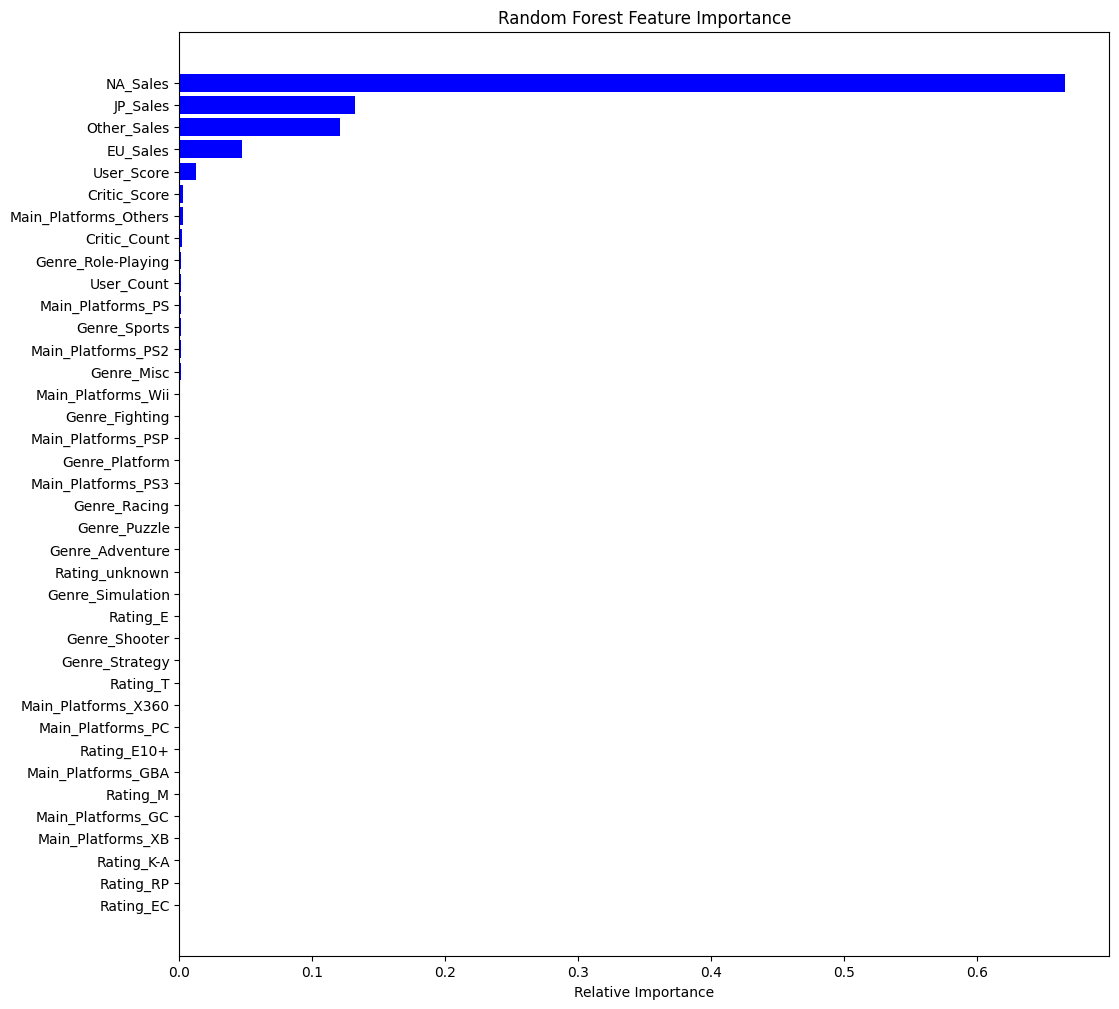

In [112]:
# extract feature importances from random forest model
feat_importance = rf.feature_importances_

# sort the indices of feature importances in ascending order
indices = np.argsort(feat_importance)

plt.figure(figsize=(12,12)) # set the size of the plot
plt.title( 'Random Forest Feature Importance') # set the title of the plot
# create horizontal bar plot of feature importances
plt.barh(range(len(indices)), feat_importance[indices], color = 'blue', align = 'center')
plt.yticks(range(len(indices)), (feature_col[i] for i in indices)) # label the y-axis with the feature names in the sorted order
plt.xlabel('Relative Importance') # set the x-axis label
plt.show() #display the plot

- Most of the features are not important in predicting the target variable
- The top 5 important features are NA sales, JP Sales, Other sales, EU_Sales and Crtic Score


In [113]:
#selecting the top 8 features
top_features = []

for i in indices[-1:-9:-1]:
    top_features.append(i)

x_train3 = x_train[x_train.columns[top_features]]
x_val3 = x_val[x_val.columns[top_features]]
x_test3 = x_test[x_test.columns[top_features]]
x_train.columns[top_features] #check important features

Index(['NA_Sales', 'JP_Sales', 'Other_Sales', 'EU_Sales', 'User_Score',
       'Critic_Score', 'Main_Platforms_Others', 'Critic_Count'],
      dtype='object')

In [114]:
#scale the data
#fit and transform transform train data
x_train3_ft = scaler.fit_transform(x_train3)
#transform test data
x_val3_ft = scaler.transform(x_val3)
x_test3_ft = scaler.transform(x_test3)

#### Rebuilding the model using the top 8 features

In [115]:
#train the model
rf.fit(x_train3_ft, y_train)

RandomForestRegressor(random_state=0)

In [116]:
#evaluate model performance
rf_train3=model_performance_metrics(rf, x_train3_ft, y_train)
rf_train3

Model Name      MSE      RMSE       MAE  R-Squared  \
0  RandomForestRegressor  0.02234  0.149465  0.064374   0.989596   

   Adj.R-Squared  
0       0.989589

In [117]:
#evaluate model performance
rf_val3=model_performance_metrics(rf, x_val3_ft, y_val)
rf_val3

Model Name       MSE      RMSE       MAE  R-Squared  \
0  RandomForestRegressor  0.089689  0.299482  0.150301   0.957544   

   Adj.R-Squared  
0       0.957417

- The model uses fewer features, reducing the complexity and the performance of the model is good on both the training and validation sets.

#### Gradient Boosting

In [118]:
#instantiate the model
gb = GradientBoostingRegressor(random_state = 0)

#train the model
gb.fit(x_train_ft, y_train)

GradientBoostingRegressor(random_state=0)

In [119]:
#check model performance on train data
gb_train=model_performance_metrics(gb, x_train_ft, y_train)
gb_train

Model Name      MSE      RMSE       MAE  R-Squared  \
0  GradientBoostingRegressor  0.07864  0.280428  0.165449   0.963378   

   Adj.R-Squared  
0       0.963247

In [120]:
#check model performance on validation data
gb_val=model_performance_metrics(gb, x_val_ft, y_val)
gb_val

Model Name       MSE      RMSE       MAE  R-Squared  \
0  GradientBoostingRegressor  0.088361  0.297256  0.176734   0.958173   

   Adj.R-Squared  
0        0.95757

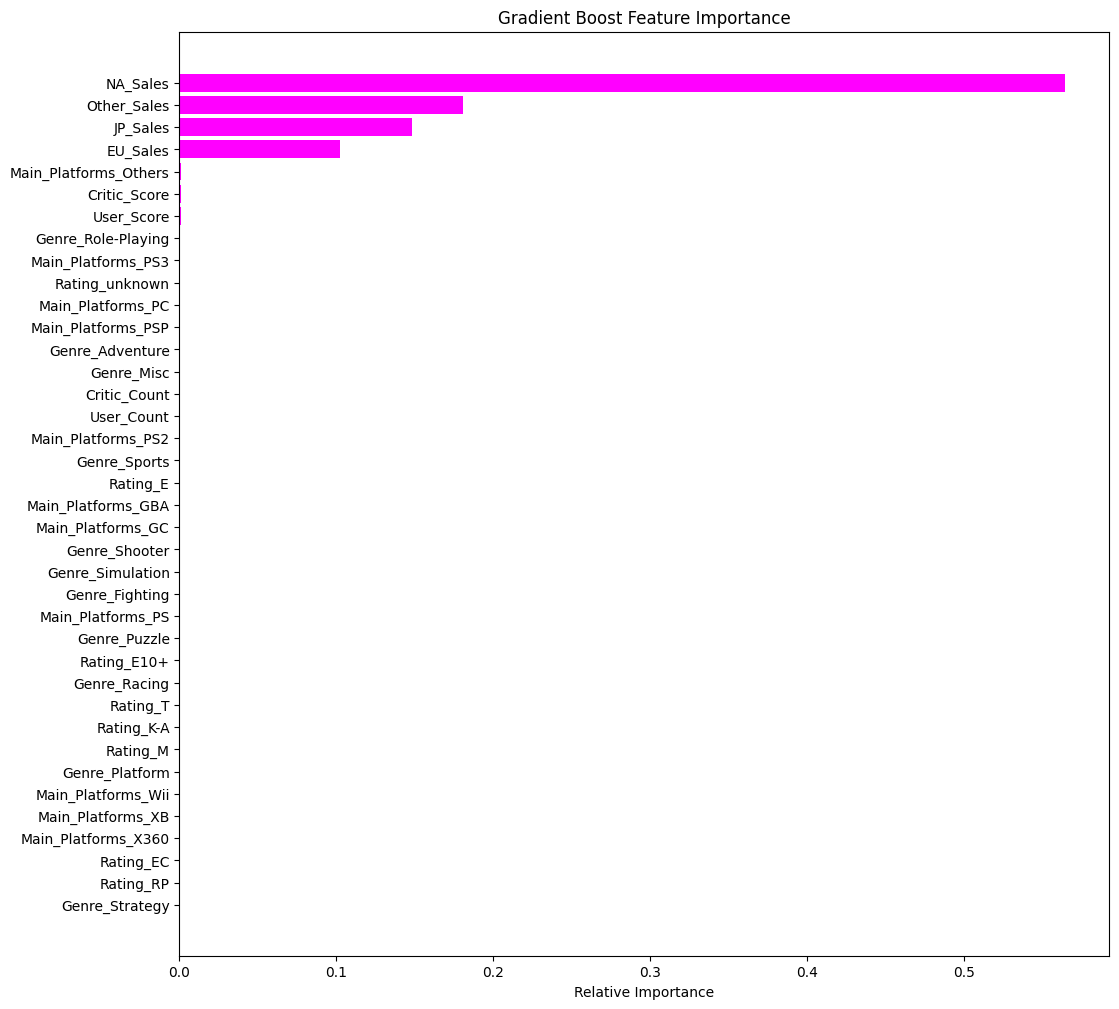

In [121]:
# extract feature importances from gradient boost model
feat_importancegb = gb.feature_importances_

# sort the indices of feature importances in ascending order
indices_gb = np.argsort(feat_importancegb)

plt.figure(figsize=(12,12)) # set the size of the plot
plt.title( 'Gradient Boost Feature Importance') # set the title of the plot
# create horizontal bar plot of feature importances
plt.barh(range(len(indices_gb)), feat_importancegb[indices_gb], color = 'magenta', align = 'center')
#label the y-axis with the feature names in the sorted order
plt.yticks(range(len(indices_gb)), (feature_col[i] for i in indices_gb))
plt.xlabel('Relative Importance') # set the x-axis label
plt.show() #display the plot

- Gradient boost picked only the top 7 features as the important features

In [122]:
#selecting the top 7 features
top_gbfeatures = []

for i in indices_gb[-1:-8:-1]:
    top_gbfeatures.append(i)

x_traingb = x_train[x_train.columns[top_gbfeatures]]
x_valgb = x_val[x_val.columns[top_gbfeatures]]
x_testgb = x_test[x_test.columns[top_gbfeatures]]
x_train.columns[top_gbfeatures] #check important features

Index(['NA_Sales', 'Other_Sales', 'JP_Sales', 'EU_Sales',
       'Main_Platforms_Others', 'Critic_Score', 'User_Score'],
      dtype='object')

In [123]:
#scale the data
#fit and transform transform train data
x_traingb_ft = scaler.fit_transform(x_traingb)
#transform test data
x_valgb_ft = scaler.transform(x_valgb)
x_testgb_ft = scaler.transform(x_testgb)

#### Rebuilding the model using top 7 features

In [124]:
#train model using selected features
gb.fit(x_traingb_ft, y_train)

GradientBoostingRegressor(random_state=0)

In [125]:
#check model performance on train data
gb_train2=model_performance_metrics(gb, x_traingb_ft, y_train)
gb_train2

Model Name       MSE      RMSE      MAE  R-Squared  \
0  GradientBoostingRegressor  0.078803  0.280718  0.16226   0.963302   

   Adj.R-Squared  
0       0.963278

In [126]:
#check model performance on validation data
gb_val2=model_performance_metrics(gb, x_valgb_ft, y_val)
gb_val2

Model Name       MSE      RMSE       MAE  R-Squared  \
0  GradientBoostingRegressor  0.086905  0.294796  0.172151   0.958862   

   Adj.R-Squared  
0       0.958754

#### K-Neighbours Regression

In [127]:
#instatiate the kneighbours model
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')

#train the model using the kn regressor
kn.fit(x_train_ft, y_train)


KNeighborsRegressor(weights='distance')

In [128]:
#check model performance on train data
kn_train=model_performance_metrics(kn, x_train_ft, y_train)
kn_train

Model Name       MSE      RMSE       MAE  R-Squared  Adj.R-Squared
0  KNeighborsRegressor  0.001496  0.038682  0.002247   0.999303       0.999301

In [129]:
#check model performance on validation data
kn_val=model_performance_metrics(kn, x_val_ft, y_val)
kn_val

Model Name       MSE     RMSE       MAE  R-Squared  Adj.R-Squared
0  KNeighborsRegressor  0.446705  0.66836  0.475435   0.788546       0.785498

In [130]:
# define a range of n_neighbors values to experiment with
n_neighbors_values = [3, 5, 7, 9, 11]

# create a KFold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# iterate over each n_neighbors value and perform cross-validation
for n_neighbors in n_neighbors_values:
    # create a KNeighborsRegressor object with the current n_neighbors value
    kn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
    
    # perform cross-validation and calculate mean R-squared score
    r2_scores = cross_val_score(kn, x_train_ft, y_train, cv=kfold, scoring='r2')
    mean_r2 = r2_scores.mean()
    
    # print the results for the current n_neighbors value
    print(f"n_neighbors = {n_neighbors}, mean R-squared = {mean_r2:.4f}")


n_neighbors = 3, mean R-squared = 0.7847
n_neighbors = 5, mean R-squared = 0.7861
n_neighbors = 7, mean R-squared = 0.7832
n_neighbors = 9, mean R-squared = 0.7787
n_neighbors = 11, mean R-squared = 0.7736


- After checking the performance of each n_neighbours values, 5 appears to be the best value but the model is performing poorly on the validation set as it is not generalising well
- Examining the 4 models, the gradient boost model has a better performance on the validation set compared to the other models, with lower RMSE and MSE scores, it also has a higher coefficient of determinant.
- In addition, the gradient boost model generalises better as its performance on the validation set is close to performance on the testing set

#### Predicting the test data

In [131]:
y_pred= gb.predict(x_testgb_ft)
y_pred

array([-1.75247863, -0.93060116, -1.13949353, ..., -2.71968929,
       -1.50917935, -2.82092101])

In [132]:
gb_test = model_performance_metrics(gb,x_testgb_ft,y_test)
gb_test

Model Name       MSE      RMSE       MAE  R-Squared  \
0  GradientBoostingRegressor  0.075196  0.274218  0.160655   0.965149   

   Adj.R-Squared  
0       0.965076

- The model performs even better on the test set and generalises well while the error rates are lower and the R-squared is higher

#### Voting Ensemble 

In [133]:
ensemble = VotingRegressor(estimators=[('dt', dt), ('kn', kn), ('gb', gb), ('rf', rf)])


In [134]:
scores = cross_val_score(ensemble, x_train, y_train, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.93 (+/- 0.01)


### Classification
- For classification, Rating, Genre and Main_Platforms will be used as labels

#### Seaborn plotting of the target variables in the video games dataset

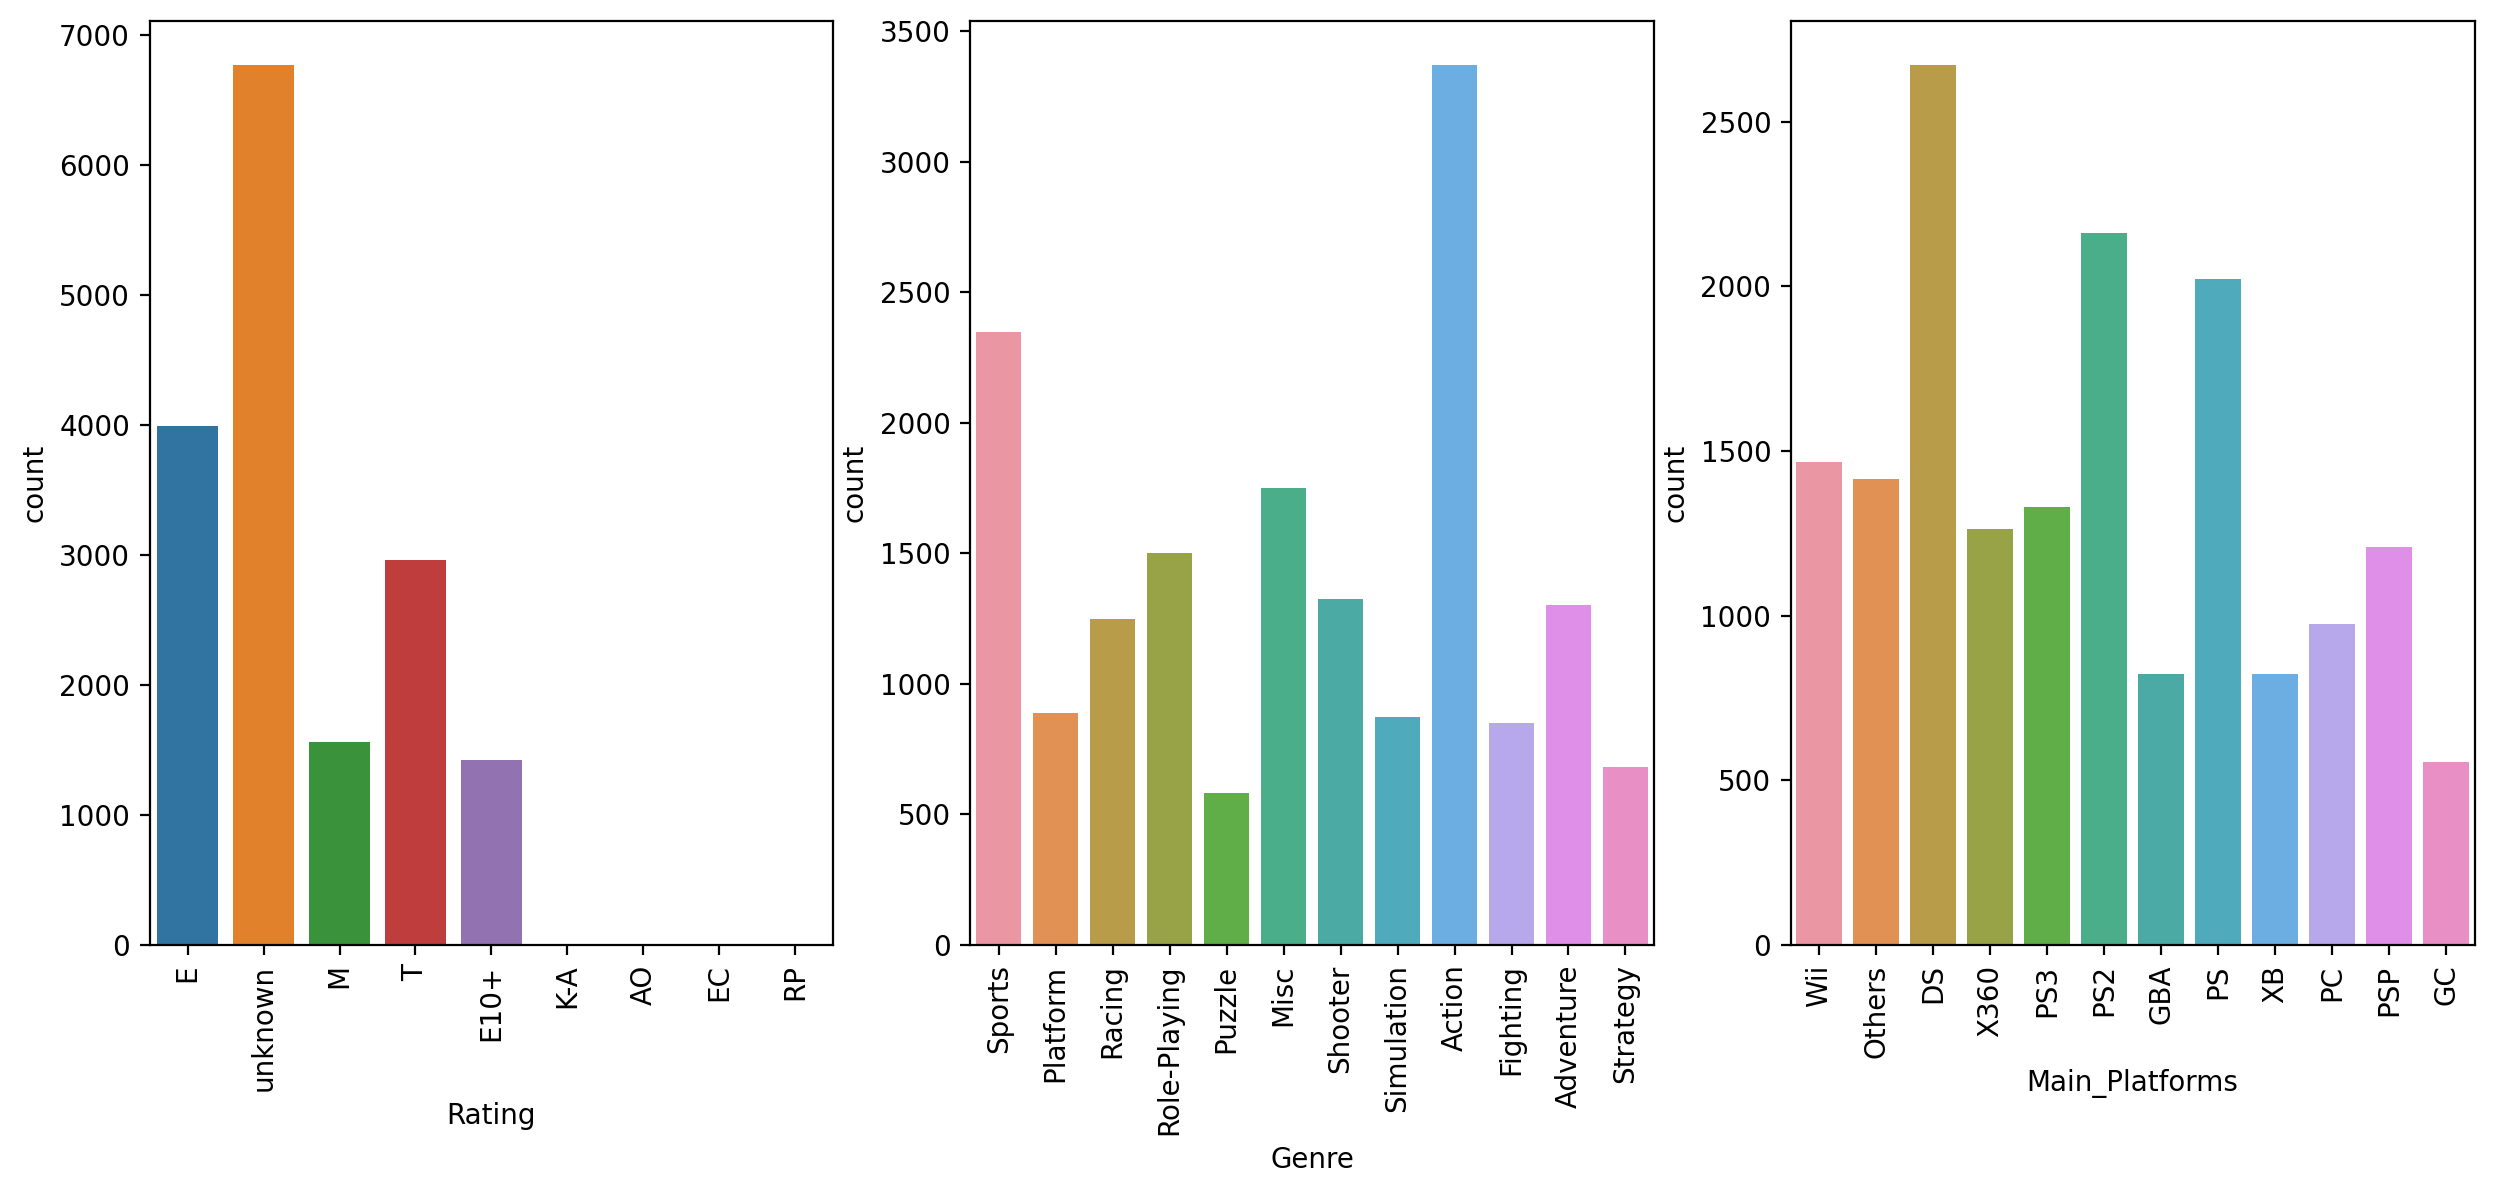

In [135]:
# creates the framework for the subplots and set their dimensions and resolutiona
fig, ax_position=plt.subplots(ncols = 3,figsize=(15,6),dpi=200)

# create the three subplots, set the x-axis data to each of the label and set the ax_position
a = sbn.countplot(x = 'Rating', data = video_games, ax=ax_position[0]) 
a = sbn.countplot(x = 'Genre', data = video_games, ax=ax_position[1])
a = sbn.countplot(x = 'Main_Platforms', data = video_games, ax=ax_position[2])

# Rotate xticks labels
for ax in ax_position:
    ax.tick_params(axis='x', labelrotation=90)

#### Boxplot of the categorical variables

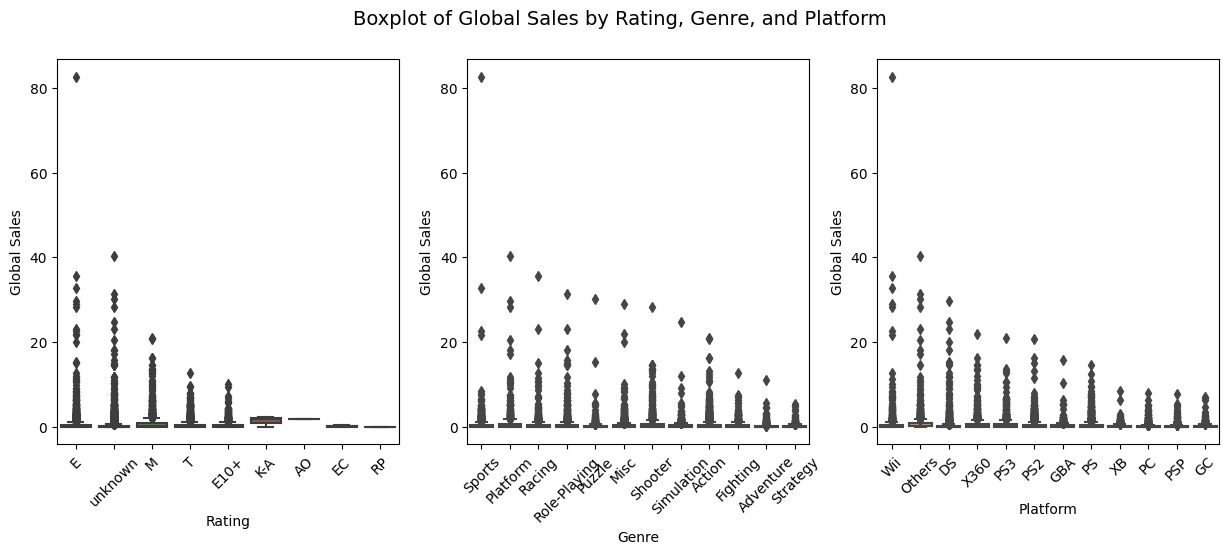

In [136]:
# Select columns of interest
cat_cols = ['Rating', 'Genre', 'Main_Platforms', 'Global_Sales']

# Create a subplot with three boxplots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Plot the boxplots
for i, col in enumerate(cat_cols[:-1]):
    sbn.boxplot(data=video_games, x=col, y='Global_Sales', ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)


# Set the plot title and axis labels
fig.suptitle('Boxplot of Global Sales by Rating, Genre, and Platform', fontsize=14)
axs[0].set(xlabel='Rating', ylabel='Global Sales')
axs[1].set(xlabel='Genre', ylabel='Global Sales')
axs[2].set(xlabel='Platform', ylabel='Global Sales')

#show the plot
plt.show()

#### Observations
- Rating contributes to Global Sales with E having the highest numbers 
- Global Sales is highest for Wii and DS platforms 

### Using Rating as a Target Variable
#### Feature Selection

In [137]:
from collections import Counter

In [138]:
#select data based on most frequent ratings ['E', 'T', 'M', E10+]
video_games['Rating'].value_counts()

unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: Rating, dtype: int64

In [139]:
#drop the rows for other values where rating is not in this list
vidgame_new = video_games[ video_games['Rating'].isin(['E', 'T', 'M', 'E10+'])]

In [140]:
vidgame_new['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
Name: Rating, dtype: int64

In [141]:
#selecting the features and target
X_cr = vidgame_new[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Main_Platforms']]
y_cr = vidgame_new['Rating'] 

In [142]:
Counter(y_cr)

Counter({'E': 3991, 'M': 1563, 'T': 2961, 'E10+': 1420})

In [143]:
#convert categorical features to numerical data using OneHotEncoding
X_cr = pd.get_dummies(X_cr, drop_first = True)
X_cr.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0       0.6     0.275       0.1        0.075          76.0          51.0   
2       0.6     0.275       0.1        0.075          82.0          52.5   
3       0.6     0.275       0.1        0.075          80.0          52.5   
6       0.6     0.275       0.1        0.075          89.0          52.5   
7       0.6     0.275       0.1        0.075          58.0          41.0   

   User_Score  User_Count  Global_Sales  Genre_Adventure  ...  \
0         8.0        50.0         82.53                0  ...   
2         8.3        50.0         35.52                0  ...   
3         8.0        50.0         32.77                0  ...   
6         8.5        50.0         29.80                0  ...   
7         6.6        50.0         28.92                0  ...   

   Main_Platforms_GC  Main_Platforms_Others  Main_Platforms_PC  \
0                  0                      0                  0   
2                  0                      0                  0   
3                  0                      0                  0   
6                  0                      0                  0   
7                  0                      0                  0   

   Main_Platforms_PS  Main_Platforms_PS2  Main_Platforms_PS3  \
0                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   
6                  0                   0                   0   
7                  0                   0                   0   

   Main_Platforms_PSP  Main_Platforms_Wii  Main_Platforms_X360  \
0                   0                   1                    0   
2                   0                   1                    0   
3                   0                   1                    0   
6                   0                   0                    0   
7                   0                   1                    0   

   Main_Platforms_XB  
0                  0  
2                  0  
3                  0  
6                  0  
7                  0  

[5 rows x 31 columns]

In [144]:
#encoding the target using label encoder which is often used for discrete target variables
from sklearn.preprocessing import LabelEncoder

In [145]:
#instatiate label encoder and encode y
le = LabelEncoder()
y_cr = le.fit_transform(y_cr)

In [146]:
#split the data into subset and test sets
x_subcr, x_testcr, y_subcr, y_testcr = train_test_split(X_cr, y_cr, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_traincr, x_valcr, y_traincr, y_valcr = train_test_split(x_subcr, y_subcr, test_size = 0.2, random_state = 0)

In [147]:
#scale the data
#fit and transform transform train data
x_traincr_ft = scaler.fit_transform(x_traincr)
#transform test data
x_valcr_ft = scaler.transform(x_valcr)
x_testcr_ft = scaler.transform(x_testcr)

### Model Selection
#### 1. Random Forest Classifier

In [148]:
#instantiate the random forest model
rfc = RandomForestClassifier(random_state = 0)

#train the model
rfc.fit(x_traincr_ft, y_traincr)

RandomForestClassifier(random_state=0)

### Model Performance Check

In [149]:
#import libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [150]:
#function to compute different metrics to check performance of a regression model

def model_performance_label(model,predictors, target, threshold = 0.5):
    '''
    Function to compute different metrics to check the performance of the classification model
    model: classifier
    predictors: independent variables
    target: dependent_variable
    '''
    #predicting using the independent variables
    pred_prob= model.predict_proba(predictors)[:, 1]
    
    #convert the probability to class
    pred_class = np.round(pred_prob > threshold)
    
    acc = accuracy_score(target, pred_class) #checking the accuracy of the calculation model
    recall = recall_score (target, pred_class, average = 'weighted') #computing recall
    precision = precision_score (target, pred_class, average = 'weighted') #computing precision
    f1 = f1_score(target, pred_class, average = 'weighted') #computing f1 score
    
   
     #Creating a dataframe of metrics 
    dfc_perf = pd.DataFrame(
        {"Model Name" : type(model).__name__,
          "Accuracy" : acc, 
          "Recall" : recall, 
          "Precision" : precision, 
          "F1_Score" : f1
        }, index =[0])
    
    conf_mat = confusion_matrix(target, pred_class) #computing the confusion matrix
    plt.figure(figsize =(8,5)) #figure size
    sbn.heatmap(conf_mat, annot = True, fmt = 'g', cmap = 'seismic') #plot heat map of the confusion matrix
    plt.xlabel('Predicted Label') #set xlabel
    plt.ylabel('Actual Label') #set ylabel
    plt.show() #display plot

    return dfc_perf

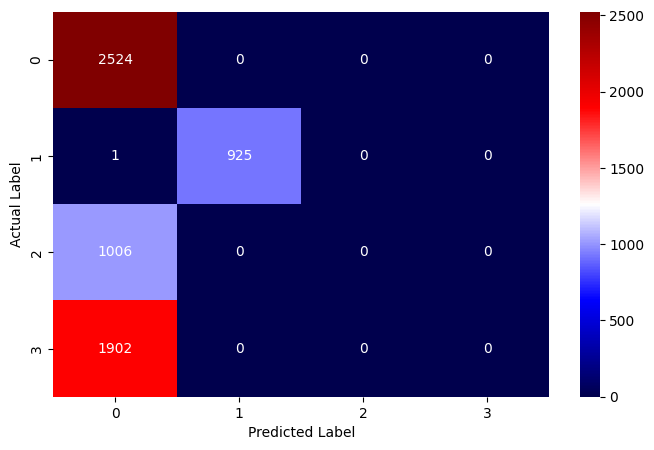

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.542466  0.542466   0.330068  0.397413

In [151]:
#checking the performance of the random forest classifier on the training set
rfc_train = model_performance_label(rfc, x_traincr_ft, y_traincr)
rfc_train

- The accuracy score shows that the model predicted the correct class for 54.25% of the training dataset
- The recall score shows that of all the actual positive cases in the training dataset, the model correctly identified only 54.2 percent of them
- The precision score shows that only 33% of the predictions are correct
- Taking into account the precision and the recall, the F1-score measures the overall accuracy of the model as 0.397, indicating a moderate level of performance
- The confusion matrix shows that the model predicted only two labels correctly
- 1006 of the rating 2 was wrongly predicted as rating 0
- 1902 of the rating 3 was also wrongly predicted as rating 0
- The model is struggling to understand the video games with ratings 2 and 3

In general, these results suggest that the model is not performing very well, as the accuracy and precision are relatively low, and the recall and F1 score are only moderate. 

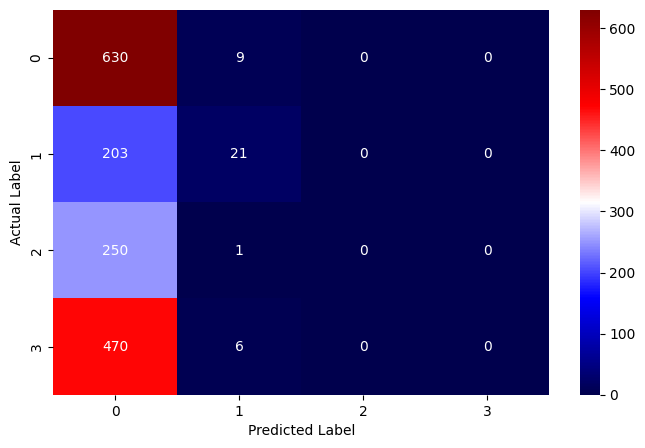

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.409434  0.409434   0.242991  0.253682

In [152]:
#checking the performance of the random forest classifier on the validation set
rfc_val = model_performance_label(rfc, x_valcr_ft, y_valcr)
rfc_val

- The model is overfitting as the performance metrics on the training data is higher than the performance of the model on the validation data. The model is not generalising well, its performance on validation is poor

### Balancing the data using imblearn

In [153]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

#instatiate the smote object
sm = SMOTE(random_state = 0, k_neighbors=2)

In [154]:
X_sm, y_sm = sm.fit_resample(X_cr, y_cr)

In [155]:
Counter(y_sm)

Counter({0: 3991, 2: 3991, 3: 3991, 1: 3991})

In [156]:
y_sm_df = pd.DataFrame(y_sm, columns=['Rating'])

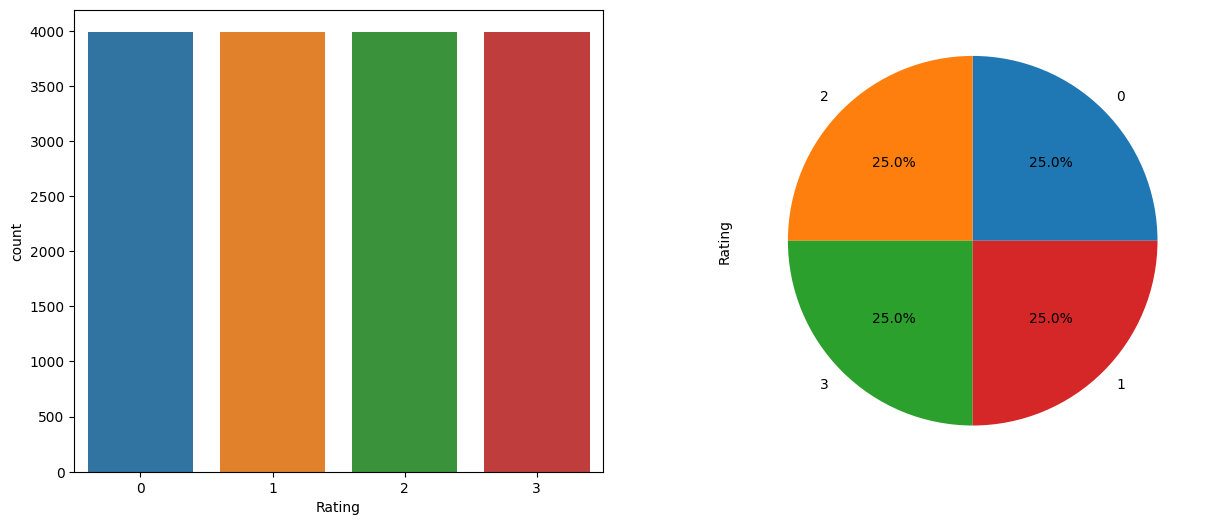

In [157]:
# Plot of the balanced dataset
bal_vidgame = pd.concat([X_sm,y_sm_df], axis = 1) #concatenating X_sm and y_sm along the columns using pd.concat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot

#create countplot and set the x-axis data to 'Rating' column from 'bal_vidgame' DataFrame.
a = sbn.countplot(x = 'Rating', data = bal_vidgame, ax=ax[0]) 

#create pie chart with count values in 'Rating', and set it to ax[1] and display percentage values on the pie chart.
a= bal_vidgame['Rating'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

In [158]:
#split the data into subset and test sets
x_subsm, x_testsm, y_subsm, y_testsm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_trainsm, x_valsm, y_trainsm, y_valsm = train_test_split(x_subsm, y_subsm, test_size = 0.2, random_state = 0)

In [159]:
#scale the data
#fit and transform transform train data
x_trainsm_ft = scaler.fit_transform(x_trainsm)
#transform test data
x_valsm_ft = scaler.transform(x_valsm)
x_testsm_ft = scaler.transform(x_testsm)

#### Rebuilding the model using the balanced data

In [160]:
#train the random forest model
rfc = RandomForestClassifier(random_state = 0)

#train the model using the balanced data
rfc.fit(x_trainsm_ft, y_trainsm)

RandomForestClassifier(random_state=0)

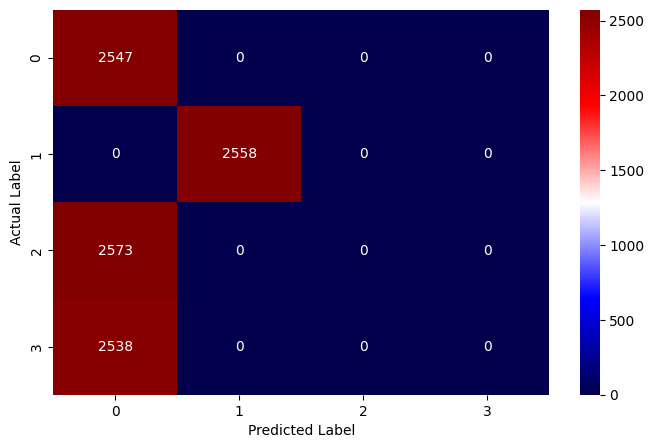

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.499706  0.499706   0.333312  0.374841

In [161]:
#evaluate performance of the model on balanced training dataset
rfc_trainsm = model_performance_label(rfc, x_trainsm_ft, y_trainsm)
rfc_trainsm

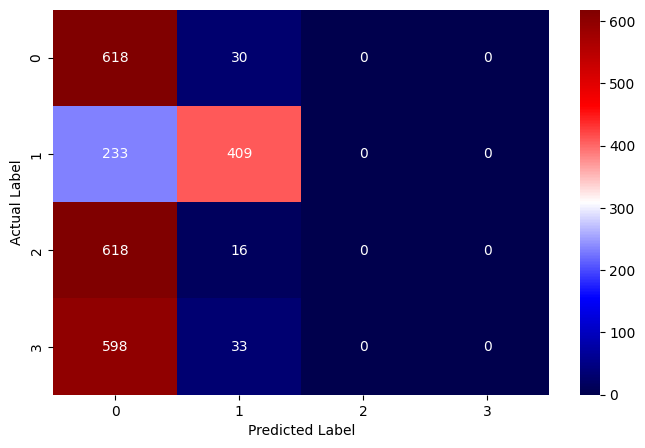

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.401957  0.401957   0.286423  0.297355

In [162]:
#checking the performance of the random forest classifier on the validation set
rfc_valsm = model_performance_label(rfc, x_valsm_ft, y_valsm)
rfc_valsm

- The performance score shows that the model is still perfoming poorly despite the attempt to balance the data. it may be unable to inteprete the rating using the features as there may be no significant relationship.
- The model is underfitting as the perfomance metrics are poor on both the training and validation sets and as such it is unreliable

#### Hyperparameter tuning using GridSearchCV


In [163]:
#import modules
from sklearn.model_selection import GridSearchCV


In [164]:
#define three hyperparameters: n_estimators, max_depth, & min_samples_split, and try three different values per hyperparameter
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}


In [165]:
#Create an instance of the GridSearchCV class, pass the model instance and parameters, using 5 cv folds
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,n_jobs=-1)

In [166]:
#Fit the GridSearchCV instance to the training data
grid_search.fit(x_traincr_ft, y_traincr)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [167]:
#Retrieve the best hyperparameters:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

In [168]:
#Use the best hyperparameters to create a new instance of the machine learning model
rfc_tuned = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10)


In [169]:
#Train the new model on the training data
rfc_tuned.fit(x_traincr_ft, y_traincr)


RandomForestClassifier(min_samples_split=10)

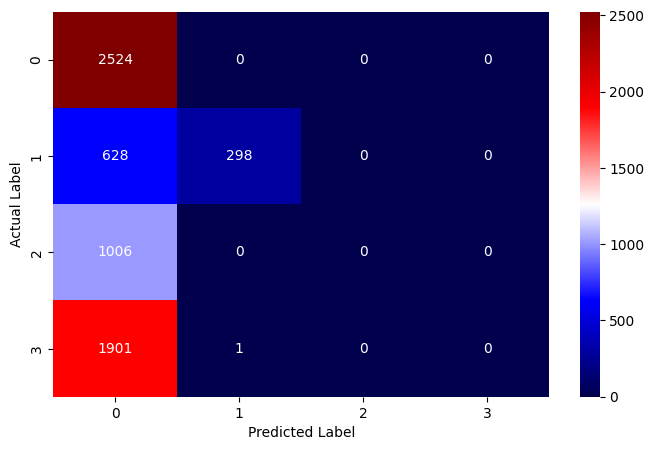

Model Name  Accuracy   Recall  Precision  F1_Score
0  RandomForestClassifier   0.44385  0.44385   0.310526   0.30434

In [170]:
#checking the performance of the tuned random forest classifier on the training set
rfctuned_train = model_performance_label(rfc_tuned, x_traincr_ft, y_traincr)
rfctuned_train

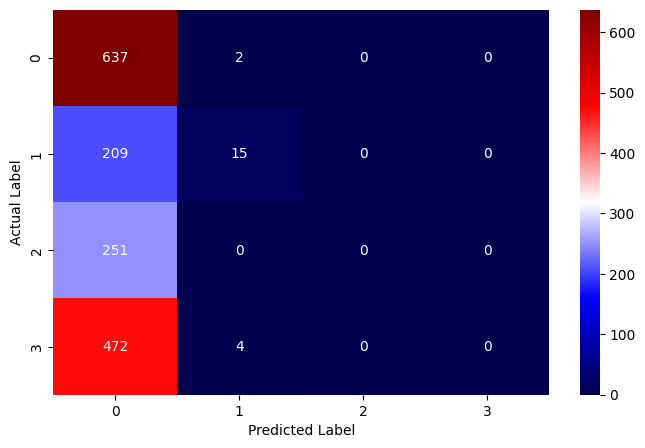

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.410063  0.410063   0.263791  0.249136

In [171]:
#checking the performance of the tuned random forest classifier on the validation set
rfctuned_val = model_performance_label(rfc_tuned, x_valcr_ft, y_valcr)
rfctuned_val

#### 2. Logistic Regression

In [172]:
#import library
from sklearn.linear_model import LogisticRegression

In [173]:
#instantiate model
log_reg = LogisticRegression()

In [174]:
#train the model using scaled data
log_reg.fit(x_traincr_ft, y_traincr)

LogisticRegression()

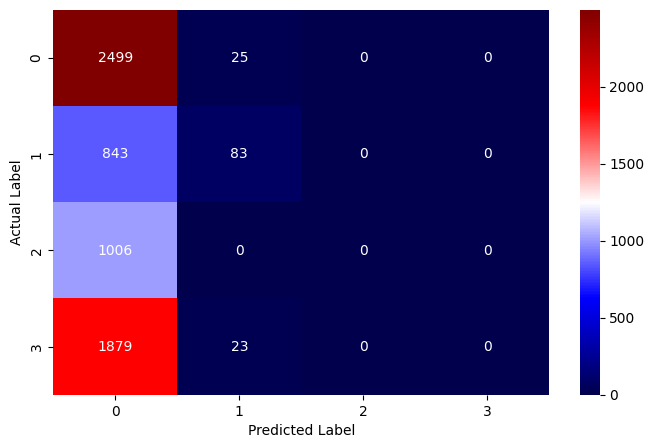

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.406103  0.406103   0.251593  0.249602

In [175]:
#checking the performance of the logistic regression on the training set
logr_train = model_performance_label(log_reg, x_traincr_ft, y_traincr)
logr_train

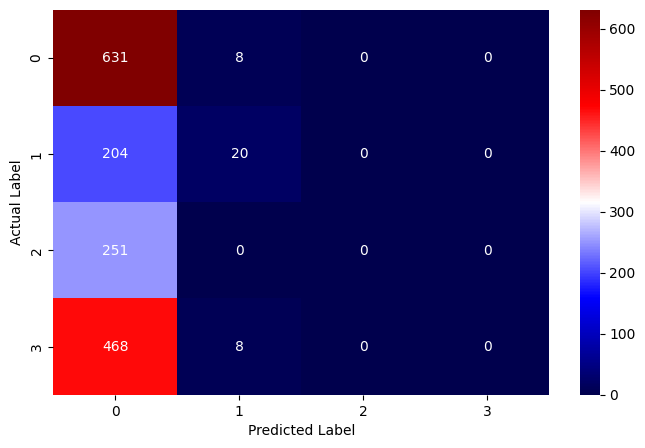

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.409434  0.409434   0.241453  0.252947

In [176]:
#evaluate performance of the model on validation set
logr_val = model_performance_label(log_reg, x_valcr_ft, y_valcr)
logr_val

#### Rebuidling the model using balanced data

In [177]:
#train the model using balanced data
log_reg.fit(x_trainsm_ft, y_trainsm)

LogisticRegression()

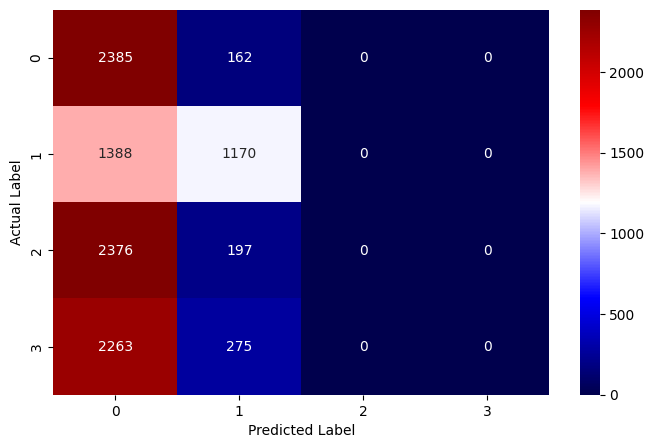

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.347984  0.347984    0.23308  0.242839

In [178]:
#checking the performance of the logistic classifier on the balanced training set
logrsm_train = model_performance_label(log_reg, x_trainsm_ft, y_trainsm)
logrsm_train

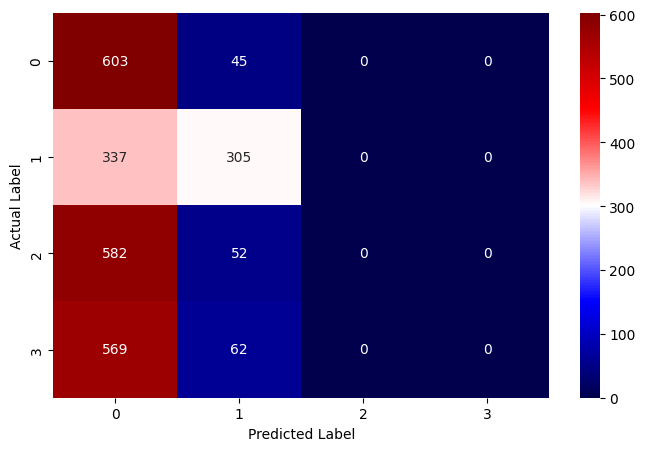

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.355382  0.355382   0.238307  0.250257

In [179]:
#checking the performance of the logistic classifier on the balanced validation set
logrsm_val = model_performance_label(log_reg, x_valsm_ft, y_valsm)
logrsm_val

#### Hyperparameter tuning on Logistic Regression

In [180]:
# Define the hyperparameters and their values that to search over
param_gridlr = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}

# Create an instance of the GridSearchCV class and pass the model instance and the hyperparameter grid as parameters
grid_searchlr = GridSearchCV(estimator=log_reg, param_grid=param_gridlr, cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_searchlr.fit(x_traincr_ft, y_traincr)

# Retrieve the best hyperparameters
best_paramslr = grid_searchlr.best_params_
best_paramslr

{'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}

In [181]:
# Create an instance of the logistic regression model with the best hyperparameters
log_regt = LogisticRegression(penalty=best_paramslr['penalty'], C=best_paramslr['C'], solver=best_paramslr['solver'])

# Train the model on the training dataset
log_regt.fit(x_traincr_ft, y_traincr)


LogisticRegression(C=10.0, solver='saga')

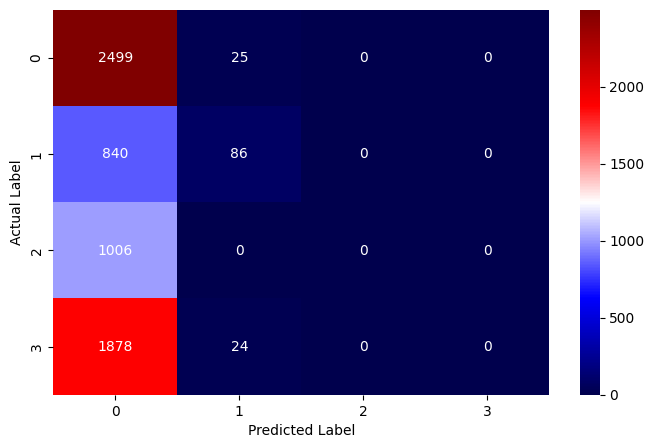

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.406574  0.406574   0.252197  0.250443

In [182]:
#checking the performance of the logistic regression on the training set
logrtuned_train = model_performance_label(log_regt, x_traincr_ft, y_traincr)
logrtuned_train

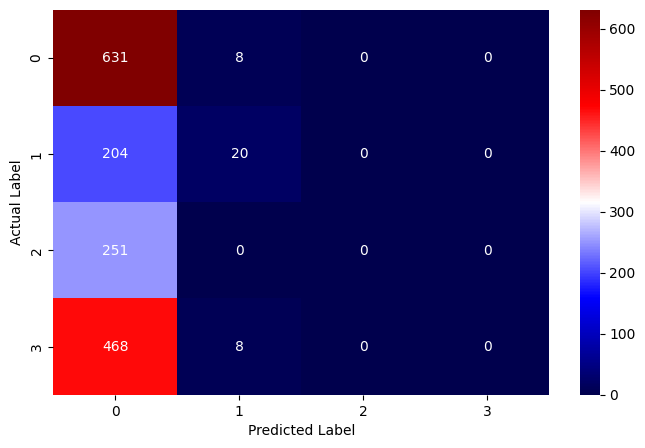

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.409434  0.409434   0.241453  0.252947

In [183]:
#checking the performance of the logistic regression on the validation set
logrtuned_val = model_performance_label(log_regt, x_valcr_ft, y_valcr)
logrtuned_val

#### 3. KNeighbours Classifier

In [184]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [185]:
#instantiate the model
knc= KNeighborsClassifier()

In [186]:
#train the model using scaled data
knc.fit(x_traincr_ft, y_traincr)

KNeighborsClassifier()

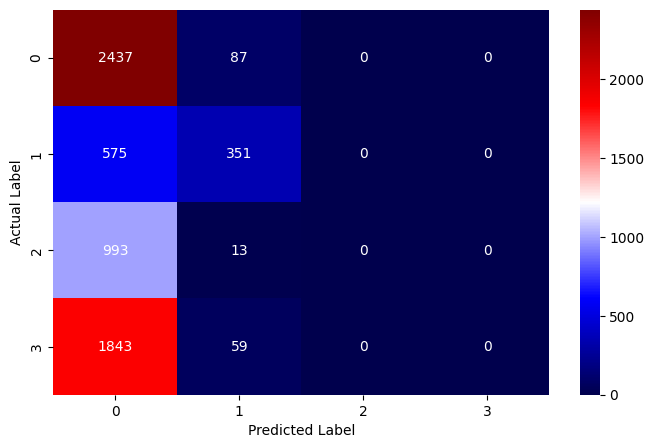

Model Name  Accuracy    Recall  Precision  F1_Score
0  KNeighborsClassifier  0.438503  0.438503   0.265668  0.302312

In [187]:
#checking the performance of the KN clasifier on the training set
knc_train = model_performance_label(knc, x_traincr_ft, y_traincr)
knc_train

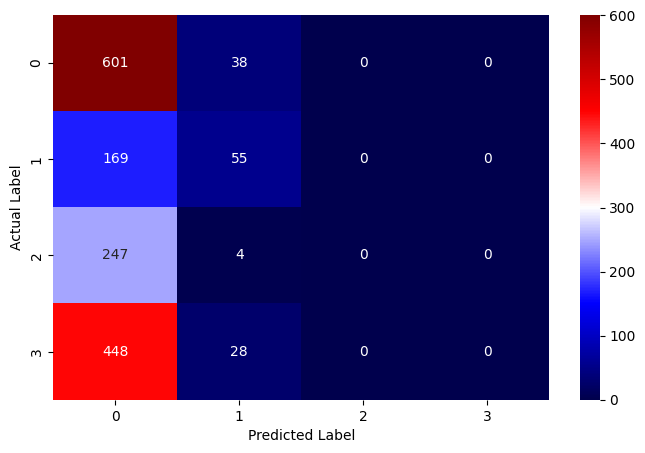

Model Name  Accuracy    Recall  Precision  F1_Score
0  KNeighborsClassifier  0.412579  0.412579   0.226857  0.273999

In [188]:
#evaluate performance of the model on validation set
knc_val = model_performance_label(knc, x_valcr_ft, y_valcr)
knc_val

#### Using balanced data

In [189]:
#train the model using balanced data
knc.fit(x_trainsm_ft, y_trainsm)

KNeighborsClassifier()

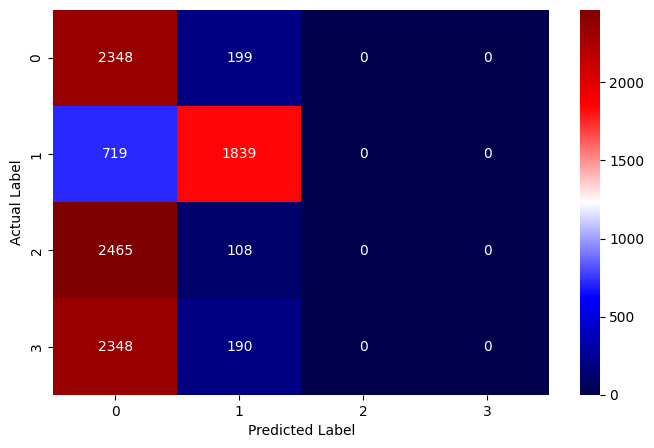

Model Name  Accuracy    Recall  Precision  F1_Score
0  KNeighborsClassifier  0.409847  0.409847   0.271407  0.300461

In [190]:
#evaluate performance of the model on training set
knc_trainsm = model_performance_label(knc, x_trainsm_ft, y_trainsm)
knc_trainsm

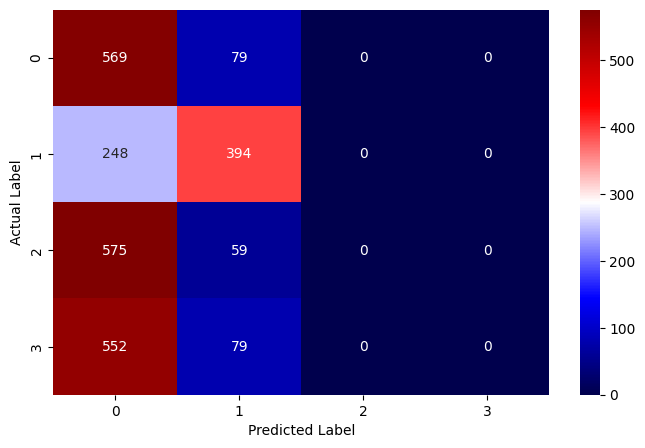

Model Name  Accuracy    Recall  Precision  F1_Score
0  KNeighborsClassifier  0.376908  0.376908   0.236265  0.269373

In [191]:
#evaluate performance of the model on validation set
knc_valsm = model_performance_label(knc, x_valsm_ft, y_valsm)
knc_valsm

#### Hyperparameter tuning

In [192]:
# Define the hyperparameters and their values that to search over
param_gridkn = {'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

# Create an instance of the GridSearchCV class and pass the model instance and the hyperparameter grid as parameters
grid_searchkn = GridSearchCV(estimator=knc, param_grid=param_gridkn, cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_searchkn.fit(x_traincr_ft, y_traincr)

# Retrieve the best hyperparameters
best_paramskn = grid_searchkn.best_params_
best_paramskn

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [193]:
# Create an instance of the KN classification model with the best hyperparameters
knct = KNeighborsClassifier(n_neighbors=9, weights='uniform',metric='manhattan')

# Train the model on the training dataset
knct.fit(x_traincr_ft, y_traincr)


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

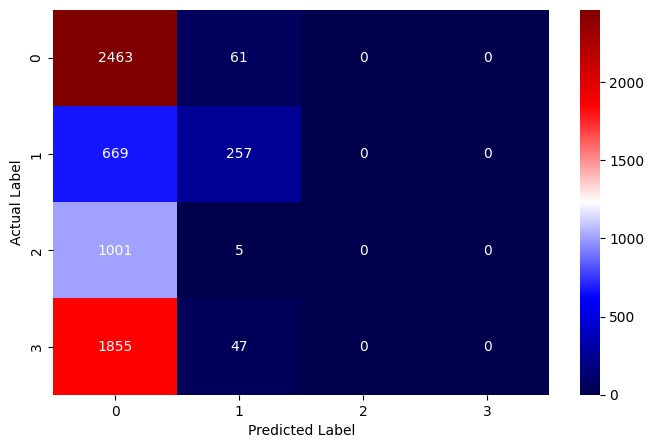

Model Name  Accuracy    Recall  Precision  F1_Score
0  KNeighborsClassifier  0.427807  0.427807    0.26445    0.2875

In [194]:
#checking the performance of the KN classification on the training set
kncrtuned_train = model_performance_label(knct, x_traincr_ft, y_traincr)
kncrtuned_train

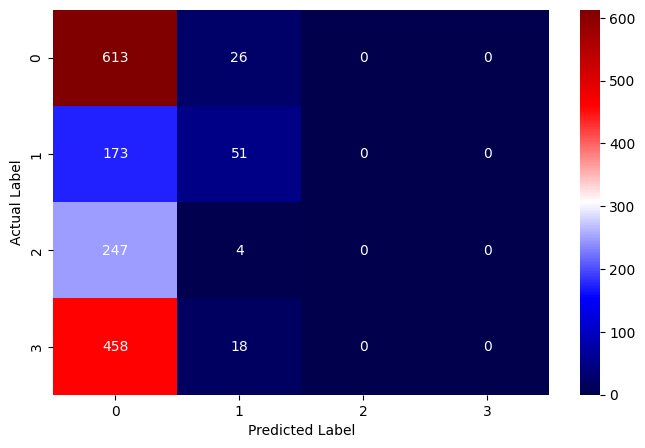

Model Name  Accuracy   Recall  Precision  F1_Score
0  KNeighborsClassifier   0.41761  0.41761   0.237804  0.275809

In [195]:
#checking the performance of the KN classification on the validation set
kncrtuned_val = model_performance_label(knct, x_valcr_ft, y_valcr)
kncrtuned_val

#### 4. Decision Tree Classifier with cross validation

In [196]:
#import modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [197]:
#instantiate the model
dt_clf = DecisionTreeClassifier()

In [198]:
#split the data into training and test sets
x_train_cr, x_test_cr, y_train_cr, y_test_cr = train_test_split(X_cr, y_cr, test_size = 0.2, random_state = 0)


In [199]:
# Define cross-validation parameters
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [200]:
# Perform cross-validation on training data
scores = cross_val_score(dt_clf, x_train_cr, y_train_cr, cv=cv)
# Print mean and standard deviation of scores
print('Cross-validation scores of training data: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())

Cross-validation scores of training data:  [0.53899371 0.53962264 0.54716981 0.53366897 0.54185022]
Mean score:  0.5402610715967876
Standard deviation:  0.004375514205694304


In [201]:
# Perform cross-validation on test data
scores = cross_val_score(dt_clf, x_test_cr, y_test_cr, cv=cv)
# Print mean and standard deviation of scores
print('Cross-validation scores of test data: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())

Cross-validation scores of test data:  [0.52512563 0.52261307 0.50881612 0.53400504 0.4861461 ]
Mean score:  0.5153411895750794
Standard deviation:  0.016684631679416875


In [202]:
# Fit classifier on training dataset
dt_clf.fit(x_train_cr, y_train_cr)


DecisionTreeClassifier()

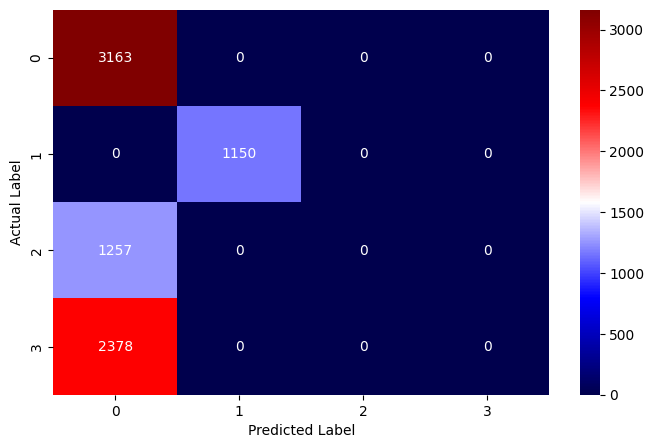

Model Name  Accuracy    Recall  Precision  F1_Score
0  DecisionTreeClassifier  0.542652  0.542652   0.329856  0.397427

In [203]:
#evaluate performance of the model on training set
dtc_train = model_performance_label(dt_clf, x_train_cr, y_train_cr)
dtc_train

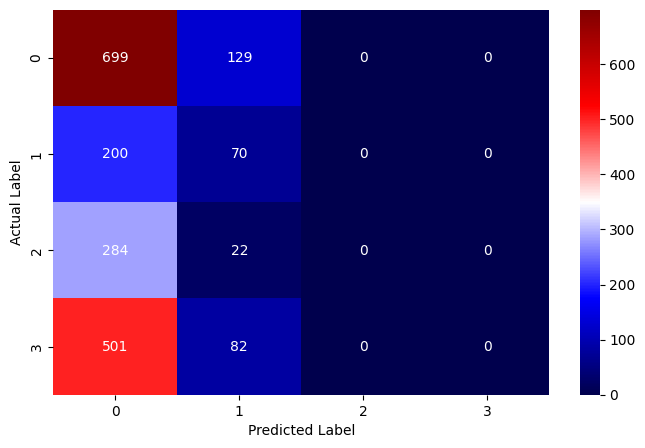

Model Name  Accuracy    Recall  Precision  F1_Score
0  DecisionTreeClassifier  0.387016  0.387016   0.204361   0.26511

In [204]:
#evaluate performance of the model on test set
dtc_test = model_performance_label(dt_clf, x_test_cr, y_test_cr)
dtc_test

### Using Genre as a Target Variable
#### Feature Selection

In [205]:
#selecting the features and target
X_cg = video_games[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Main_Platforms']]
y_cg = video_games['Genre'] 

In [206]:
#convert categorical features to numerical data using OneHotEncoding
X_cg = pd.get_dummies(X_cg, drop_first = True)
X_cg

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0          0.60     0.275      0.10        0.075          76.0          51.0   
1          0.60     0.275      0.10        0.075           0.0           0.0   
2          0.60     0.275      0.10        0.075          82.0          52.5   
3          0.60     0.275      0.10        0.075          80.0          52.5   
4          0.60     0.275      0.10        0.075           0.0           0.0   
...         ...       ...       ...          ...           ...           ...   
16712      0.00     0.000      0.01        0.000           0.0           0.0   
16713      0.00     0.010      0.00        0.000           0.0           0.0   
16714      0.00     0.000      0.01        0.000           0.0           0.0   
16715      0.01     0.000      0.00        0.000           0.0           0.0   
16716      0.00     0.000      0.01        0.000           0.0           0.0   

       User_Score  User_Count  Global_Sales  Rating_E  ...  Main_Platforms_GC  \
0        8.000000        50.0         82.53         1  ...                  0   
1        8.150000         0.0         40.24         0  ...                  0   
2        8.300000        50.0         35.52         1  ...                  0   
3        8.000000        50.0         32.77         1  ...                  0   
4        8.166667         0.0         31.37         0  ...                  0   
...           ...         ...           ...       ...  ...                ...   
16712    5.800000         0.0          0.01         0  ...                  0   
16713    5.800000         0.0          0.01         0  ...                  0   
16714    5.800000         0.0          0.01         0  ...                  0   
16715    5.800000         0.0          0.01         0  ...                  0   
16716    5.800000         0.0          0.01         0  ...                  0   

       Main_Platforms_Others  Main_Platforms_PC  Main_Platforms_PS  \
0                          0                  0                  0   
1                          1                  0                  0   
2                          0                  0                  0   
3                          0                  0                  0   
4                          1                  0                  0   
...                      ...                ...                ...   
16712                      0                  0                  0   
16713                      0                  0                  0   
16714                      0                  0                  1   
16715                      0                  0                  0   
16716                      0                  0                  1   

       Main_Platforms_PS2  Main_Platforms_PS3  Main_Platforms_PSP  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
16712                   0                   1                   0   
16713                   0                   0                   0   
16714                   0                   0                   0   
16715                   0                   0                   0   
16716                   0                   0                   0   

       Main_Platforms_Wii  Main_Platforms_X360  Main_Platforms_XB  
0                       1                    0                  0  
1                       0                    0                  0  
2                       1                    0                  0  
3                       1                    0                  0  
4                       0                    0                 

In [207]:
#instatiate label encoder and encode the target variable
le = LabelEncoder()
y_cg = le.fit_transform(y_cg)

In [208]:
#split the data into subset and test sets
x_subcg, x_testcg, y_subcg, y_testcg = train_test_split(X_cg, y_cg, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_traincg, x_valcg, y_traincg, y_valcg = train_test_split(x_subcg, y_subcg, test_size = 0.2, random_state = 0)

In [209]:
#scale the data
#fit and transform transform train data
x_traincg_ft = scaler.fit_transform(x_traincg)
#transform test data
x_valcg_ft = scaler.transform(x_valcg)
x_testcg_ft = scaler.transform(x_testcg)

### Model Selection
#### 1. Random Forest Classifier

In [210]:
#train the model
rfc.fit(x_traincg_ft, y_traincg)

RandomForestClassifier(random_state=0)

#### Model Performance Check

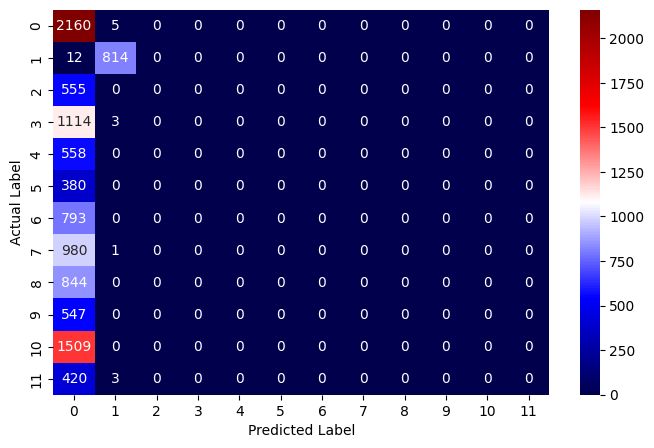

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.277996  0.277996   0.120369   0.14872

In [211]:
#checking the performance of the random forest classifier on the training set
rfcg_train = model_performance_label(rfc, x_traincg_ft, y_traincg)
rfcg_train

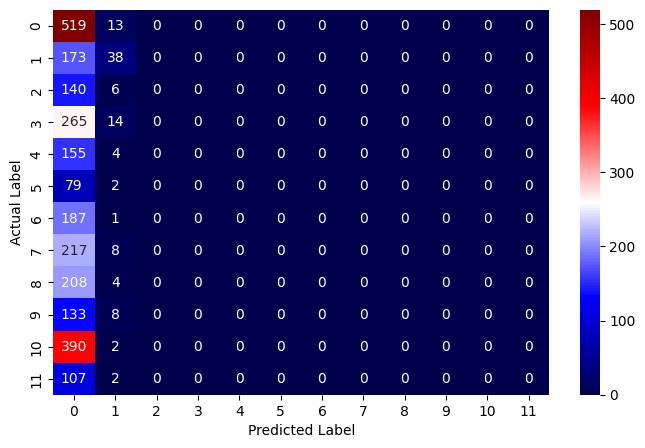

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.208224  0.208224   0.069502  0.085638

In [212]:
#checking the performance of the random forest classifier on the validation set
rfcg_val = model_performance_label(rfc, x_valcg_ft, y_valcg)
rfcg_val

#### Balancing the data

In [213]:
X_smg, y_smg = sm.fit_resample(X_cg, y_cg)

In [214]:
y_smg_df = pd.DataFrame(y_smg, columns=['Genre'])

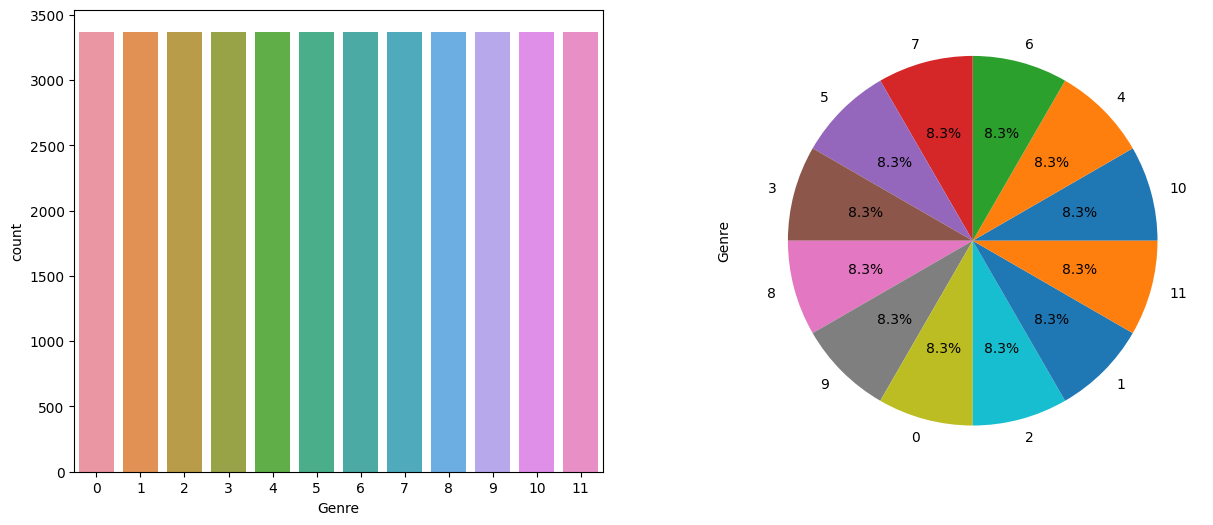

In [215]:
# Plot of the balanced dataset
bal_vidgameg = pd.concat([X_smg,y_smg_df], axis = 1) #concatenating X_smg and y_smg along the columns using pd.concat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot

#create countplot and set the x-axis data to 'Genre' column from 'bal_vidgameg' DataFrame.
a = sbn.countplot(x = 'Genre', data = bal_vidgameg, ax=ax[0]) 

#create pie chart with count values in 'Genre', and set it to ax[1] and display percentage values on the pie chart.
a= bal_vidgameg['Genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

In [216]:
#split the data into subset and test sets
x_subsmg, x_testsmg, y_subsmg, y_testsmg = train_test_split(X_smg, y_smg, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_trainsmg, x_valsmg, y_trainsmg, y_valsmg = train_test_split(x_subsmg, y_subsmg, test_size = 0.2, random_state = 0)

In [217]:
#scale the data
#fit and transform transform train data
x_trainsmg_ft = scaler.fit_transform(x_trainsmg)
#transform test data
x_valsmg_ft = scaler.transform(x_valsmg)
x_testsmg_ft = scaler.transform(x_testsmg)

#### Rebuilding the model using the balanced data

In [218]:
#train the model using the balanced data
rfc.fit(x_trainsmg_ft, y_trainsmg)

RandomForestClassifier(random_state=0)

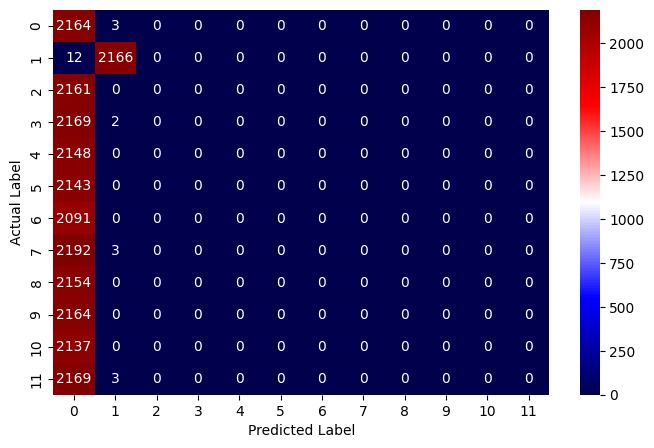

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.167304  0.167304   0.091373  0.097717

In [219]:
#evaluate performance of the model on balanced training dataset
rfc_trainsmg = model_performance_label(rfc, x_trainsmg_ft, y_trainsmg)
rfc_trainsmg

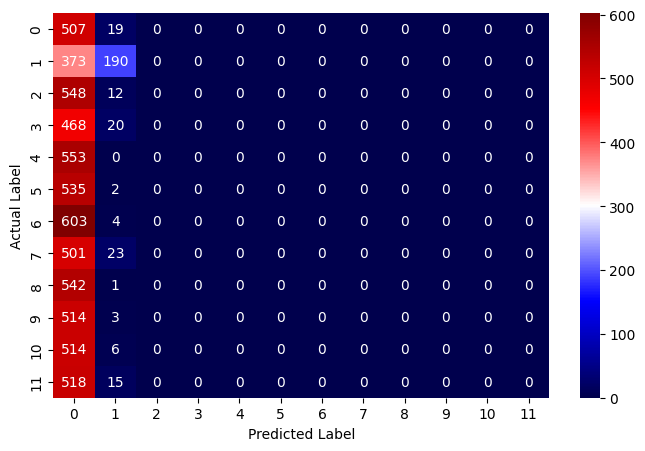

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.107711  0.107711   0.062709  0.050831

In [220]:
#checking the performance of the random forest classifier on the validation set
rfc_valsmg = model_performance_label(rfc, x_valsmg_ft, y_valsmg)
rfc_valsmg

#### Hyperparameter tuning using GridSearchCV

In [221]:
#Fit the GridSearchCV instance to the training data
grid_search.fit(x_traincg_ft, y_traincg)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [222]:
#Retrieve the best hyperparameters
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [223]:
#Use the best hyperparameters to create a new instance of the machine learning model
rfcg_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2)

In [224]:
#Train the new model on the training data
rfcg_tuned.fit(x_traincg_ft, y_traincg)

RandomForestClassifier(max_depth=10, n_estimators=200)

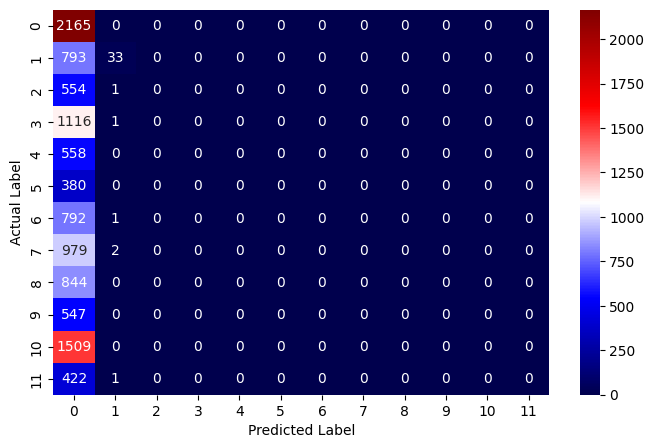

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.205459  0.205459   0.106437  0.074223

In [225]:
#checking the performance of the tuned random forest classifier on the training set
rfcgtuned_train = model_performance_label(rfcg_tuned, x_traincg_ft, y_traincg)
rfcgtuned_train

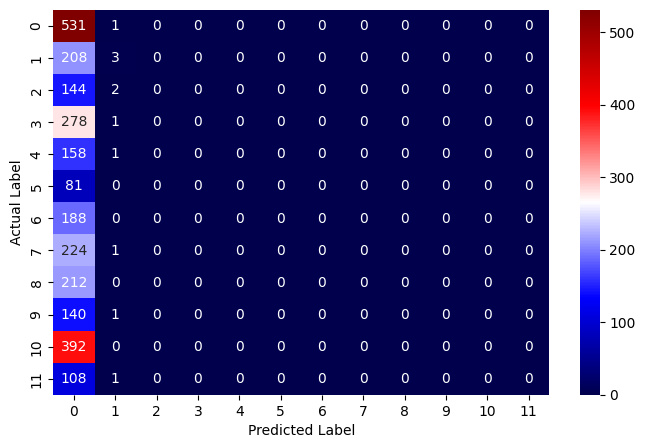

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.199626  0.199626   0.061154  0.068217

In [226]:
#checking the performance of the tuned random forest classifier on the validation set
rfcgtuned_val = model_performance_label(rfcg_tuned, x_valcg_ft, y_valcg)
rfcgtuned_val

#### 2. Logistic Regression

In [227]:
#train the model using scaled data
log_reg.fit(x_traincg_ft, y_traincg)

LogisticRegression()

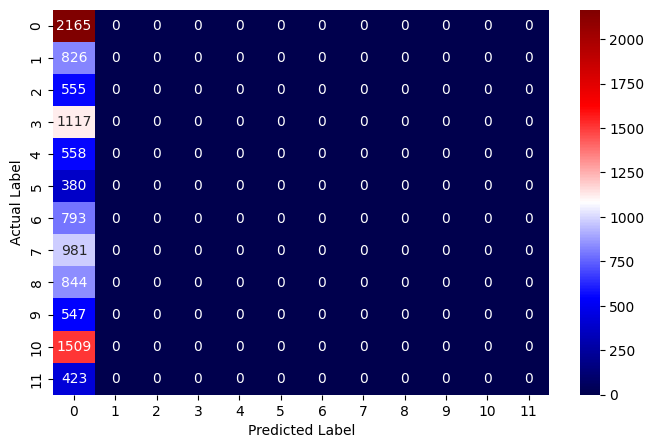

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.202374  0.202374   0.040955  0.068124

In [228]:
#checking the performance of the logistic regression on the training set
logrg_train = model_performance_label(log_reg, x_traincg_ft, y_traincg)
logrg_train

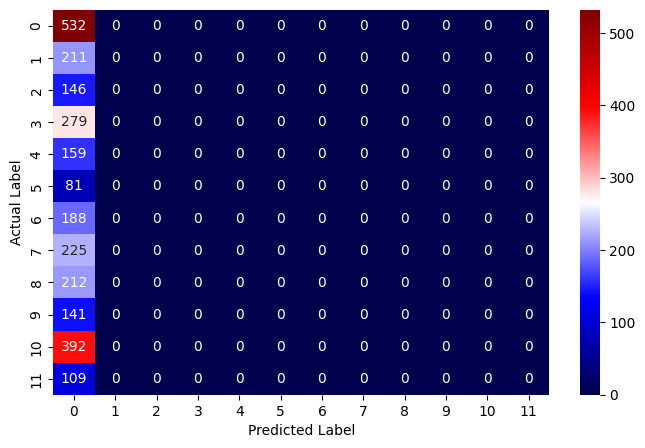

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.198879  0.198879   0.039553  0.065983

In [229]:
#evaluate performance of the model on validation set
logrg_val = model_performance_label(log_reg, x_valcg_ft, y_valcg)
logrg_val

#### Rebuidling the model using balanced data

In [230]:
#train the model using balanced data
log_reg.fit(x_trainsmg_ft, y_trainsmg)

LogisticRegression()

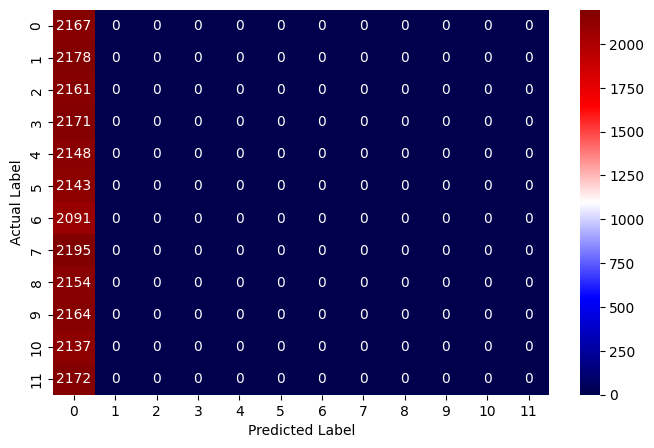

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.083729  0.083729   0.007011  0.012938

In [231]:
#checking the performance of the logistic classifier on the balanced training set
logrsmg_train = model_performance_label(log_reg, x_trainsmg_ft, y_trainsmg)
logrsmg_train

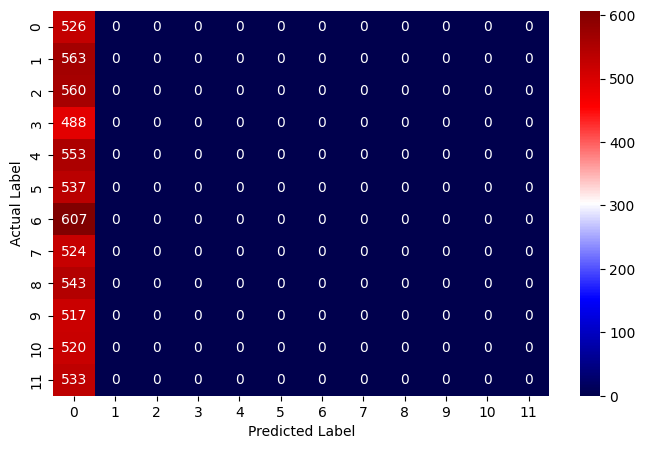

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.081286  0.081286   0.006607  0.012221

In [232]:
#checking the performance of the logistic classifier on the balanced validation set
logrsmg_val = model_performance_label(log_reg, x_valsmg_ft, y_valsmg)
logrsmg_val

#### Hyperparameter tuning

In [233]:
# Fit the GridSearchCV instance to the training data
grid_searchlr.fit(x_traincg_ft, y_traincg)

# Retrieve the best hyperparameters
best_paramslrg = grid_searchlr.best_params_
best_paramslrg

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [234]:
# Create an instance of the logistic regression model with the best hyperparameters
log_regg = LogisticRegression(penalty=best_paramslrg['penalty'], C=best_paramslrg['C'], solver=best_paramslrg['solver'])

# Train the model on the training dataset
log_regg.fit(x_traincg_ft, y_traincg)

LogisticRegression(penalty='l1', solver='liblinear')

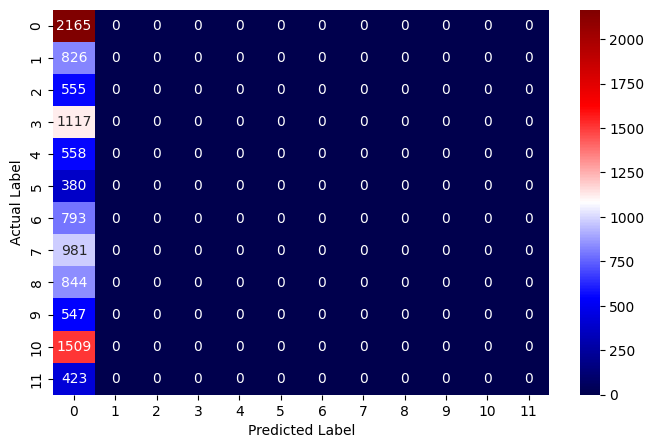

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.202374  0.202374   0.040955  0.068124

In [235]:
#checking the performance of the logistic regression on the training set
logrgtuned_train = model_performance_label(log_regg, x_traincg_ft, y_traincg)
logrgtuned_train

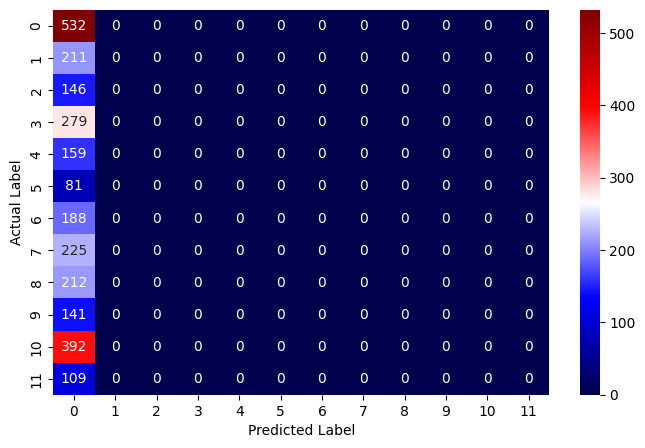

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.198879  0.198879   0.039553  0.065983

In [236]:
#checking the performance of the logistic regression on the validation set
logrgtuned_val = model_performance_label(log_regg, x_valcg_ft, y_valcg)
logrgtuned_val

### Using Main_Platforms as a Target Variable
#### Feature Selection

In [237]:
#selecting the features and target
X_cp = video_games[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 
                    'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Genre']]
y_cp = video_games['Main_Platforms'] 

In [238]:
#convert categorical features to numerical data using OneHotEncoding
X_cp = pd.get_dummies(X_cp, drop_first = True)
X_cp.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0       0.6     0.275       0.1        0.075          76.0          51.0   
1       0.6     0.275       0.1        0.075           0.0           0.0   
2       0.6     0.275       0.1        0.075          82.0          52.5   
3       0.6     0.275       0.1        0.075          80.0          52.5   
4       0.6     0.275       0.1        0.075           0.0           0.0   

   User_Score  User_Count  Global_Sales  Rating_E  ...  Genre_Fighting  \
0    8.000000        50.0         82.53         1  ...               0   
1    8.150000         0.0         40.24         0  ...               0   
2    8.300000        50.0         35.52         1  ...               0   
3    8.000000        50.0         32.77         1  ...               0   
4    8.166667         0.0         31.37         0  ...               0   

   Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  Genre_Role-Playing  \
0           0               0             0             0                   0   
1           0               1             0             0                   0   
2           0               0             0             1                   0   
3           0               0             0             0                   0   
4           0               0             0             0                   1   

   Genre_Shooter  Genre_Simulation  Genre_Sports  Genre_Strategy  
0              0                 0             1               0  
1              0                 0             0               0  
2              0                 0             0               0  
3              0                 0             1               0  
4              0                 0             0               0  

[5 rows x 28 columns]

In [239]:
#instatiate label encoder and encode the target variable
le = LabelEncoder()
y_cp = le.fit_transform(y_cp)

In [240]:
#split the data into subset and test sets
x_subcp, x_testcp, y_subcp, y_testcp = train_test_split(X_cp, y_cp, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_traincp, x_valcp, y_traincp, y_valcp = train_test_split(x_subcp, y_subcp, test_size = 0.2, random_state = 0)

In [241]:
#scale the data
#fit and transform transform train data
x_traincp_ft = scaler.fit_transform(x_traincp)
#transform test data
x_valcp_ft = scaler.transform(x_valcp)
x_testcp_ft = scaler.transform(x_testcp)

### Model Selection
#### 1. Random Forest Classifier

In [242]:
#train the model
rfc.fit(x_traincp_ft, y_traincp)

RandomForestClassifier(random_state=0)

#### Model Performance Check

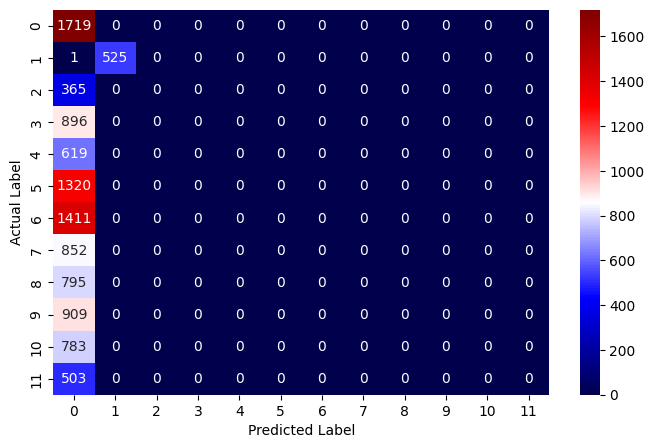

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.209759  0.209759    0.07632  0.095575

In [243]:
#checking the performance of the random forest classifier on the training set
rfcp_train = model_performance_label(rfc, x_traincp_ft, y_traincp)
rfcp_train

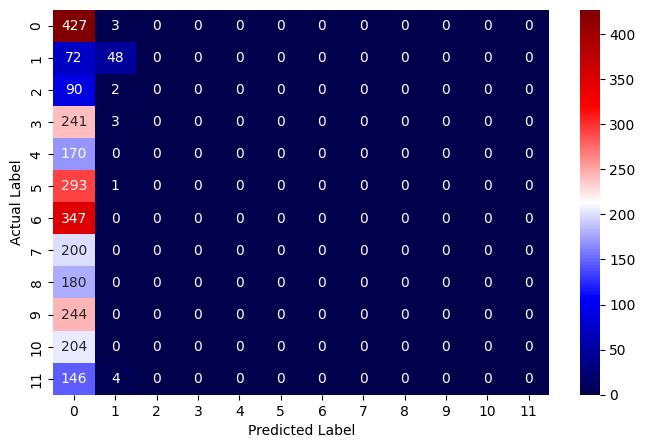

Model Name  Accuracy   Recall  Precision  F1_Score
0  RandomForestClassifier   0.17757  0.17757   0.061558  0.068891

In [244]:
#checking the performance of the random forest classifier on the validation set
rfcp_val = model_performance_label(rfc, x_valcp_ft, y_valcp)
rfcp_val

#### Rebuidling the model using balanced data

In [245]:
X_smp, y_smp = sm.fit_resample(X_cp, y_cp)

In [246]:
y_smp_df = pd.DataFrame(y_smp, columns=['Main_Plaforms'])

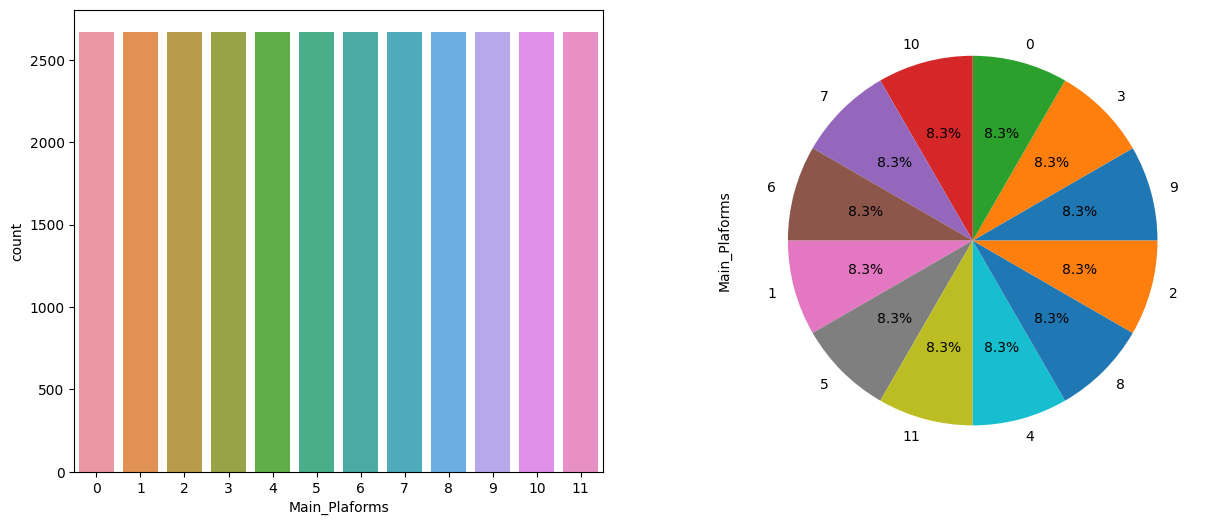

In [247]:
# Plot of the balanced dataset
bal_vidgamep = pd.concat([X_smp,y_smp_df], axis = 1) #concatenating X_smp and y_smp along the columns using pd.concat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot

#create countplot and set the x-axis data to 'Main_Platforms' column from 'bal_vidgamep' DataFrame.
a = sbn.countplot(x = 'Main_Plaforms', data = bal_vidgamep, ax=ax[0]) 

#create pie chart with count values in 'Main_Plaforms', and set it to ax[1] and display percentage values on the pie chart.
a= bal_vidgamep['Main_Plaforms'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

In [248]:
#split the data into subset and test sets
x_subsmp, x_testsmp, y_subsmp, y_testsmp = train_test_split(X_smp, y_smp, test_size = 0.2, random_state = 0)
#split subset further into training set and validation set
x_trainsmp, x_valsmp, y_trainsmp, y_valsmp = train_test_split(x_subsmp, y_subsmp, test_size = 0.2, random_state = 0)

In [249]:
#scale the data
#fit and transform transform train data
x_trainsmp_ft = scaler.fit_transform(x_trainsmp)
#transform test data
x_valsmp_ft = scaler.transform(x_valsmp)
x_testsmp_ft = scaler.transform(x_testsmp)

#### Rebuilding the model using the balanced data

In [250]:
#train the model using the balanced data
rfc.fit(x_trainsmp_ft, y_trainsmp)

RandomForestClassifier(random_state=0)

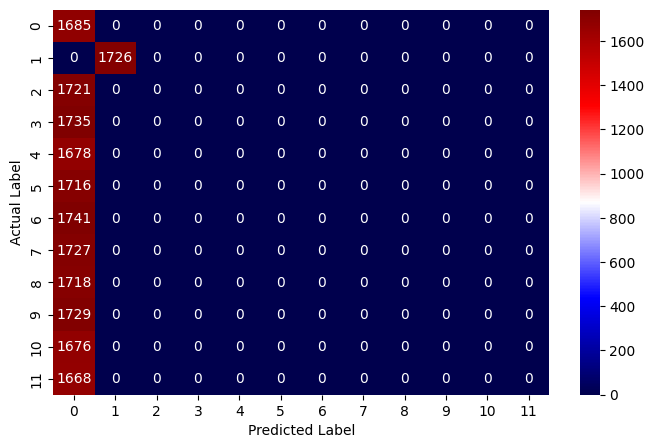

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.166228  0.166228   0.091475  0.097626

In [251]:
#evaluate performance of the model on balanced training dataset
rfc_trainsmp = model_performance_label(rfc, x_trainsmp_ft, y_trainsmp)
rfc_trainsmp

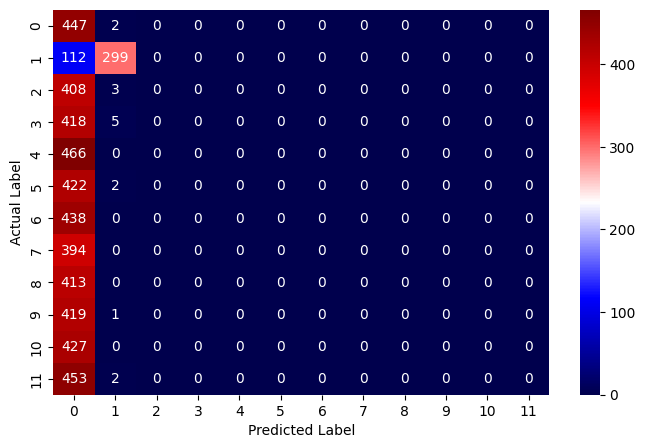

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.145391  0.145391   0.084395  0.080926

In [252]:
#checking the performance of the random forest classifier on the validation set
rfc_valsmp = model_performance_label(rfc, x_valsmp_ft, y_valsmp)
rfc_valsmp

#### Hyperparameter tuning using GridSearchCV

In [253]:
#Fit the GridSearchCV instance to the training data
grid_search.fit(x_traincp_ft, y_traincp)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [254]:
#Retrieve the best hyperparameters:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

In [255]:
#Use the best hyperparameters to create a new instance of the machine learning model
rfcp_tuned = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10)

In [256]:
RandomForestClassifier()

RandomForestClassifier()

In [257]:
#Train the new model on the training data
rfcp_tuned.fit(x_traincp_ft, y_traincp)

RandomForestClassifier(min_samples_split=10)

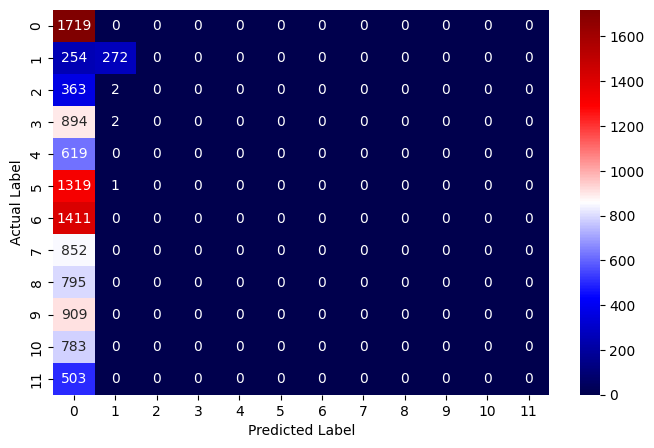

Model Name  Accuracy   Recall  Precision  F1_Score
0  RandomForestClassifier   0.18611  0.18611   0.074786  0.078815

In [258]:
#checking the performance of the tuned random forest classifier on the training set
rfcptuned_train = model_performance_label(rfcp_tuned, x_traincp_ft, y_traincp)
rfcptuned_train

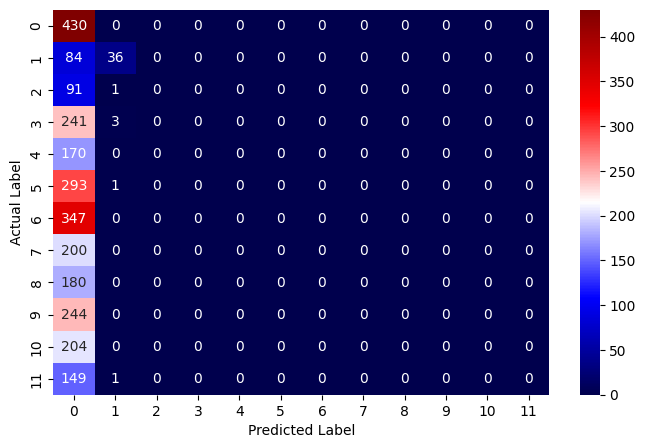

Model Name  Accuracy    Recall  Precision  F1_Score
0  RandomForestClassifier  0.174206  0.174206   0.064703  0.065071

In [259]:
#checking the performance of the tuned random forest classifier on the validation set
rfcptuned_val = model_performance_label(rfcp_tuned, x_valcp_ft, y_valcp)
rfcptuned_val

#### 2. Logistic Regression

In [260]:
#train the model using scaled data
log_reg.fit(x_traincp_ft, y_traincp)

LogisticRegression()

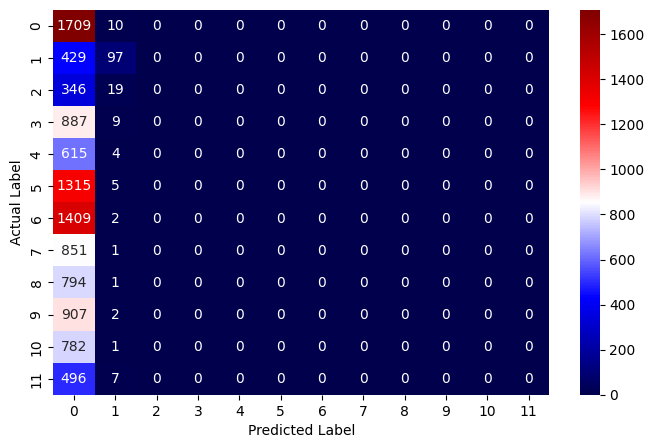

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.168817  0.168817   0.056239  0.058747

In [261]:
#checking the performance of the logistic regression on the training set
logrp_train = model_performance_label(log_reg, x_traincp_ft, y_traincp)
logrp_train

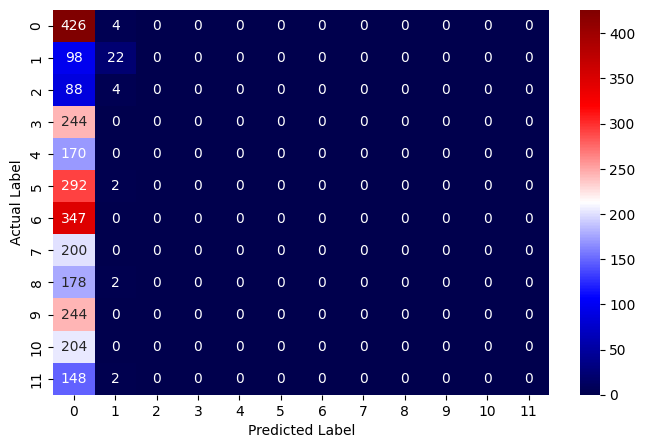

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.167477  0.167477   0.053363  0.057279

In [262]:
#evaluate performance of the model on validation set
logrp_val = model_performance_label(log_reg, x_valcp_ft, y_valcp)
logrp_val

#### Rebuidling the model using balanced data

In [263]:
#train the model using balanced data
log_reg.fit(x_trainsmp_ft, y_trainsmp)

LogisticRegression()

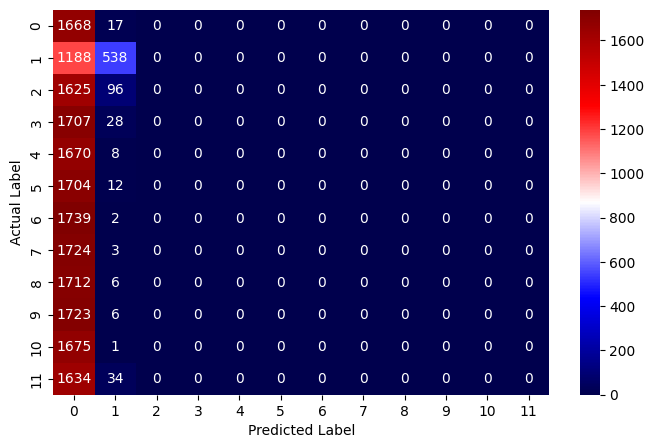

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.107505  0.107505   0.067185  0.049307

In [264]:
#checking the performance of the logistic classifier on the balanced training set
logrsmp_train = model_performance_label(log_reg, x_trainsmp_ft, y_trainsmp)
logrsmp_train

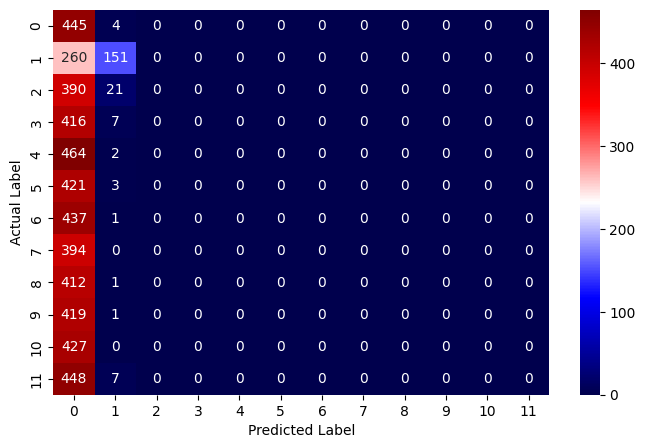

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.116157  0.116157   0.068981  0.054193

In [265]:
#checking the performance of the logistic classifier on the balanced validation set
logrsmp_val = model_performance_label(log_reg, x_valsmp_ft, y_valsmp)
logrsmp_val

#### Hyperparameter tuning using GridSearchCV

In [266]:
# Fit the GridSearchCV instance to the training data
grid_searchlr.fit(x_traincp_ft, y_traincp)

# Retrieve the best hyperparameters
best_paramslrp = grid_searchlr.best_params_
best_paramslrp

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

In [267]:
# Create an instance of the logistic regression model with the best hyperparameters
log_regp = LogisticRegression(penalty=best_paramslrp['penalty'], C=best_paramslrp['C'], solver=best_paramslrp['solver'])

# Train the model on the training dataset
log_regp.fit(x_traincp_ft, y_traincp)

LogisticRegression(penalty='l1', solver='saga')

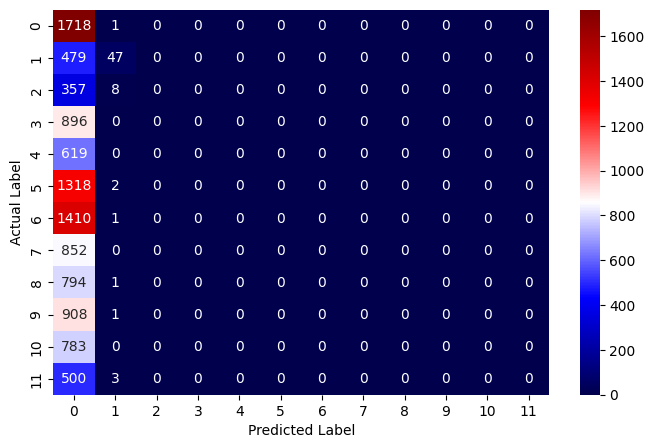

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.164984  0.164984   0.062068  0.052528

In [268]:
#checking the performance of the logistic regression on the training set
logrptuned_train = model_performance_label(log_regp, x_traincp_ft, y_traincp)
logrptuned_train

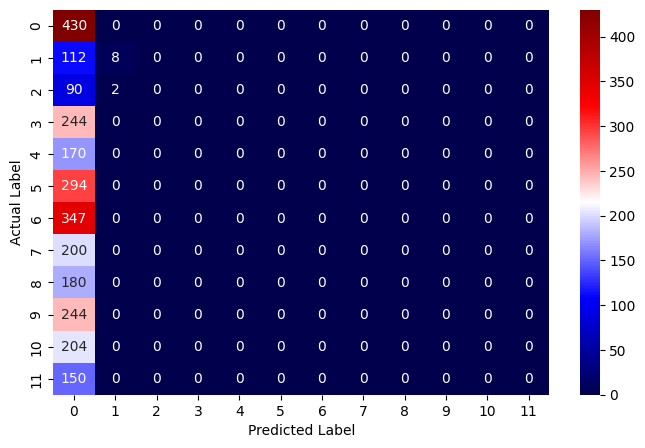

Model Name  Accuracy    Recall  Precision  F1_Score
0  LogisticRegression  0.163738  0.163738   0.061825  0.050188

In [269]:
#checking the performance of the logistic regression on the validation set
logrptuned_val = model_performance_label(log_regp, x_valcp_ft, y_valcp)
logrptuned_val

#### Predicting the test data using the best model- KNeighbours classification with tuning

In [270]:
y_predkn= knct.predict(x_testcr_ft)
y_predkn

array([0, 2, 0, ..., 1, 0, 2])

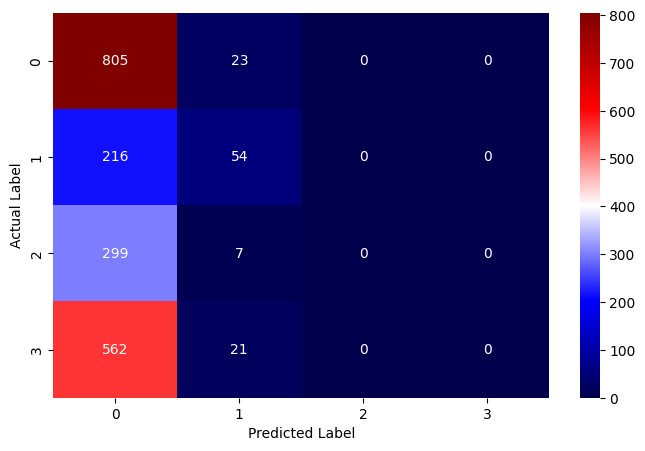

Model Name  Accuracy   Recall  Precision  F1_Score
0  KNeighborsClassifier   0.43231  0.43231   0.248124  0.286699

In [271]:
#checking the performance of the KNeighbour classification on the test data
kncrtuned_test = model_performance_label(knct, x_testcr_ft, y_testcr)
kncrtuned_test

### Clustering

In [272]:
video_games.isnull().sum()

Name                   0
Platform               0
Year_of_Release      269
Genre                  0
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer           6621
Rating                 0
Main_Platforms         0
Global_Sales_log       0
dtype: int64

In [273]:
#drop columns with null values
vidgame_ul = video_games.drop(['Name', 'Platform', 'Year_of_Release', 'Developer', 'Publisher' ,'Global_Sales_log'], axis =1)

In [274]:
#select numerical data
X_ul = vidgame_ul.select_dtypes(include = 'number')

In [275]:
#normalise the numerical data using standard scale
X_ulsd = scaler.fit_transform(X_ul)

#### Clustering using Kmeans

In [276]:
#import the libraries
from sklearn.cluster import KMeans

In [277]:
#instantiate the model and assign it to km
km = KMeans()

In [278]:
kmi = [] #open an empty list

for i in range (1, 10): #loop through the range
    kmeans = KMeans(n_clusters =i, random_state = 0) #create a km object with i clusters
    kmeans.fit(X_ulsd)  # Fit kmeans to the data in X_ulsd
    # Append the inertia to the kmi list
    kmi.append(kmeans.inertia_)

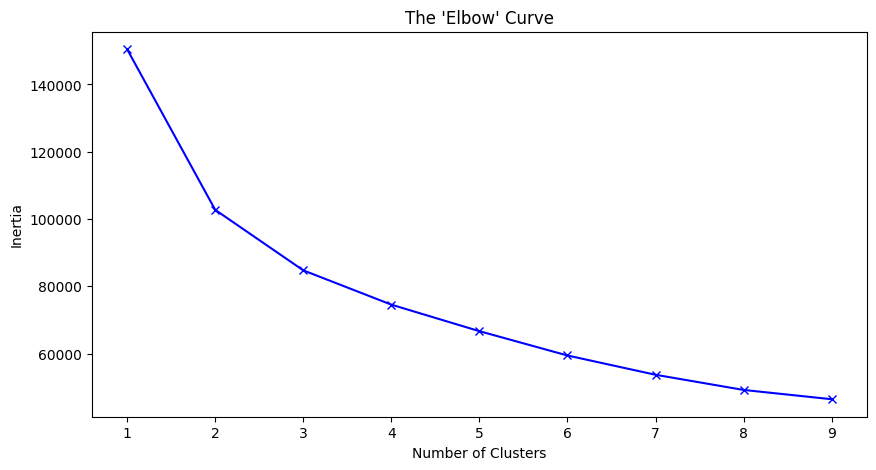

In [279]:
# create a dataframe with columns 'Cluster' and 'KMI'
cluster_fr = pd.DataFrame({'Cluster': range(1,10), 'KMI': kmi})

plt.figure(figsize=(10,5)) #set plotsize
# plot the 'Cluster' column on x-axis and 'KMI' on y-axis, use circle markers for each data point
plt.plot(cluster_fr['Cluster'],cluster_fr['KMI'],  'bx-')
plt.xlabel('Number of Clusters')#set xlabel
plt.ylabel('Inertia') #set ylabel
plt.title("The 'Elbow' Curve") #set title
plt.show()#show plot

- from the elbow curve the number of clusters can be either 3 or 4

In [280]:
#rebuilding kmeans using 3 as the number of clusters
km = KMeans(n_clusters = 3, random_state = 0)

#fit and predict the clusters to be used for data clustering into 3 groups
km_pred =km.fit_predict(X_ulsd)



In [281]:
#check the number of groups
np.unique(km_pred)

array([0, 1, 2])

In [282]:
#pass the predicted cluster to a column in the dataframe
vidgame_ul['Cluster'] = km_pred

In [283]:
#select numerical columns
vidgame_numc = vidgame_ul.select_dtypes(include = 'number').columns.tolist()
vidgame_numc

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Cluster']

In [284]:
#drop cluster as that is the y-axis
vidgame_numc.remove('Cluster')
vidgame_numc

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count']

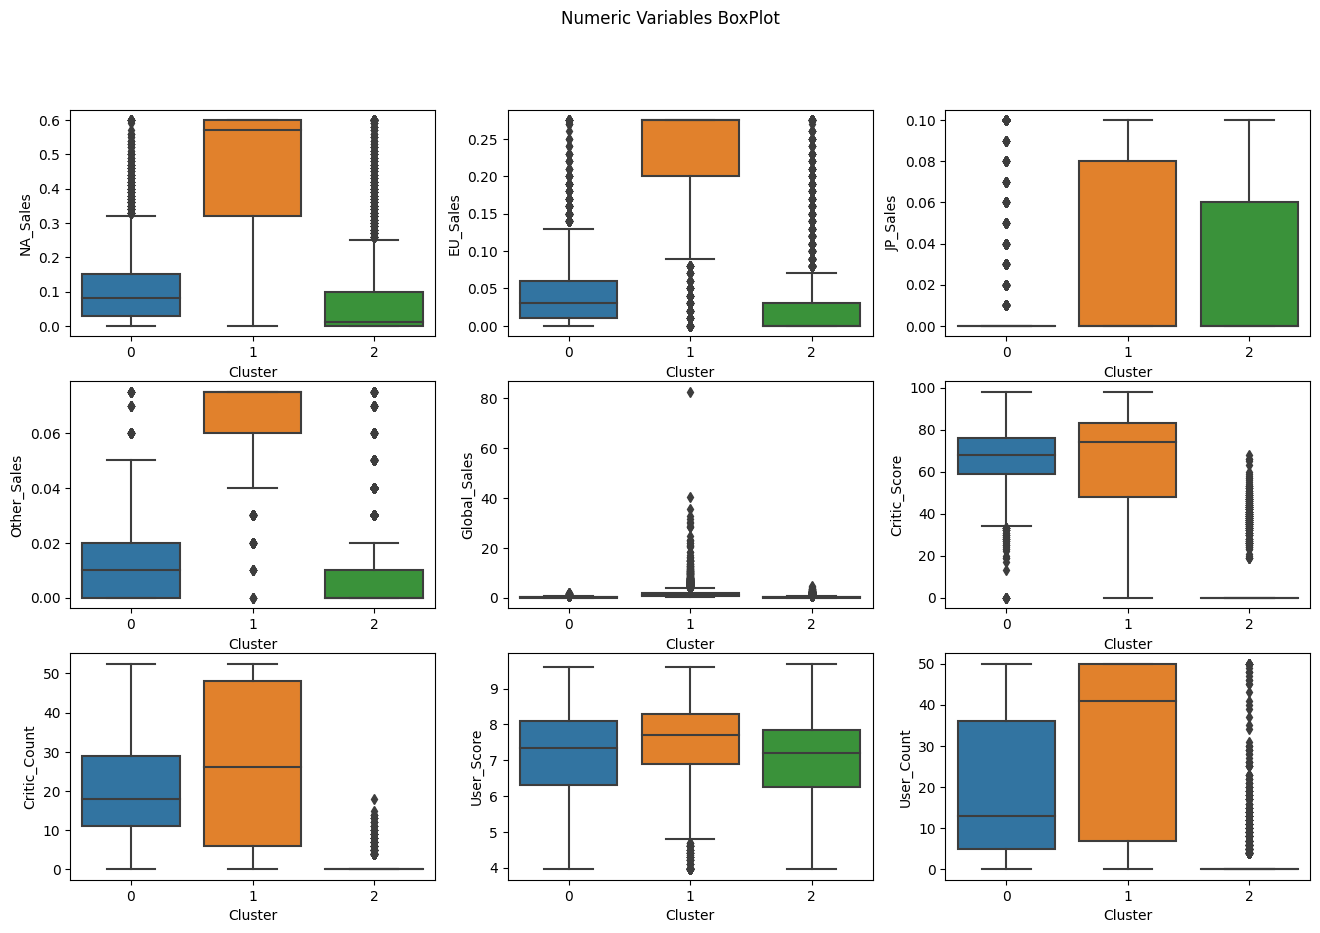

In [285]:
#set number of rows in the subplot
plot_rows = 3
#set number of columns in the subplot
plot_cols = 3
#create subplots
fig, ax = plt.subplots(plot_rows, plot_cols, figsize = (16,10))
#set title
fig.suptitle('Numeric Variables BoxPlot')

#initiate for loop to iterate through the variable and creat a boxplot of each subplot
count = 0

for i in range (plot_rows):
    for j in range(plot_cols):
        sbn.boxplot (ax = ax[i,j], x = vidgame_ul['Cluster'], y = vidgame_ul[vidgame_numc[count]])
        count+=1
fig.tight_layout
plt.show()

- The average sales of the video games in group 1 of NA is very high, similar to EU sales and other regions in the world.
- The critic score, count and the user count are similarly high

In [286]:
#viewing the video games in the cluster with higher sales
vidgame_ul[vidgame_ul['Cluster']==1]

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0           Sports      0.60     0.275      0.10        0.075         82.53   
1         Platform      0.60     0.275      0.10        0.075         40.24   
2           Racing      0.60     0.275      0.10        0.075         35.52   
3           Sports      0.60     0.275      0.10        0.075         32.77   
4     Role-Playing      0.60     0.275      0.10        0.075         31.37   
...            ...       ...       ...       ...          ...           ...   
5647        Action      0.09     0.160      0.02        0.050          0.32   
5736      Strategy      0.00     0.270      0.00        0.050          0.31   
5764        Action      0.04     0.170      0.00        0.075          0.31   
5896        Action      0.09     0.130      0.01        0.070          0.30   
5943    Simulation      0.02     0.240      0.00        0.040          0.29   

      Critic_Score  Critic_Count  User_Score  User_Count   Rating  \
0             76.0          51.0    8.000000        50.0        E   
1              0.0           0.0    8.150000         0.0  unknown   
2             82.0          52.5    8.300000        50.0        E   
3             80.0          52.5    8.000000        50.0        E   
4              0.0           0.0    8.166667         0.0  unknown   
...            ...           ...         ...         ...      ...   
5647          59.0          52.5    6.900000        50.0        M   
5736          79.0          33.0    5.200000        50.0     E10+   
5764          69.0          15.0    8.100000        38.0        M   
5896          73.0          28.0    7.500000        43.0        M   
5943          90.0          52.5    8.800000        50.0        T   

     Main_Platforms  Cluster  
0               Wii        1  
1            Others        1  
2               Wii        1  
3               Wii        1  
4            Others        1  
...             ...      ...  
5647             PS        1  
5736             PC        1  
5764            PSP        1  
5896            PSP        1  
5943             PC        1  

[3268 rows x 13 columns]

### Model Evaluation

In [287]:
#import intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

#import extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score



In [288]:
#defining a function to evaluate clustering models on the data set, using different number of clusters
def evaluate_ncluster_model(model_class,X, y_true, Linkage = None, random_state=None):
    # Define the list of n_clusters values to try
    n_clusters_list = [2, 3, 4, 5]

    # Create empty lists to store the evaluation results for each n_clusters value
    db_scores = []
    silhouette_scores = []
    ch_scores = []
    ars_scores = []
    vm_scores = []
    ami_scores = []

    # Iterate through the n_clusters values and evaluate the model class
    for n_clusters in n_clusters_list:
        # Build the model class for the current n_clusters value
        model = model_class(n_clusters=n_clusters)
        y_pred = model.fit_predict(X)

        # Evaluate the performance of the model class using the intrinsic and extrinsic metrics
        db_score = davies_bouldin_score(X, y_pred)
        sil_score = silhouette_score(X, y_pred)
        ch_score = calinski_harabasz_score(X, y_pred)
        ars_score = adjusted_rand_score(y_true, y_pred)
        vm_score = v_measure_score(y_true, y_pred)
        ami_score = adjusted_mutual_info_score(y_true, y_pred)

        # Append the evaluation results to the corresponding lists
        db_scores.append(db_score)
        silhouette_scores.append(sil_score)
        ch_scores.append(ch_score)
        ars_scores.append(ars_score)
        vm_scores.append(vm_score)
        ami_scores.append(ami_score)

    # Create a dataframe to store the evaluation results for all n_clusters values
    intrinsic_measuresdf = pd.DataFrame({
        'n_clusters': n_clusters_list,
        'DB Score': db_scores,
        'Silhouette Score': silhouette_scores,
        'Calinski-Harabasz Score': ch_scores,
    })
    
    extrinsic_measuresdf = pd.DataFrame({
        'n_clusters': n_clusters_list,
        'Adjusted Rand Score': ars_scores,
        'V-Measure Score': vm_scores,
        'Adjusted Mutual Info Score': ami_scores
    })

    return intrinsic_measuresdf, extrinsic_measuresdf


In [289]:
intrinsic_measuresdf, extrinsic_measuresdf = evaluate_ncluster_model(KMeans, X_ulsd, video_games['Rating'], random_state = 0)
print("Intrinsic Evaluation Measures")
print(f'********************************')
display(intrinsic_measuresdf)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(extrinsic_measuresdf)


Intrinsic Evaluation Measures
********************************


n_clusters  DB Score  Silhouette Score  Calinski-Harabasz Score
0           2  1.308321          0.378047              7767.197332
1           3  1.385726          0.276259              6480.976064
2           4  1.357551          0.293308              5673.057814
3           5  1.271714          0.272625              5252.123237


Extrinsic Performance Metrics:
********************************


n_clusters  Adjusted Rand Score  V-Measure Score  \
0           2             0.120361         0.078651   
1           3             0.341846         0.251080   
2           4             0.327007         0.269925   
3           5             0.177597         0.236471   

   Adjusted Mutual Info Score  
0                    0.078413  
1                    0.250768  
2                    0.269526  
3                    0.235970

In [290]:
intrinsic_measuresdf, extrinsic_measuresdf = evaluate_ncluster_model(KMeans, X_ulsd, video_games['Genre'], random_state = 0)
print("Internal Evaluation Measures")
print(f'********************************')
display(intrinsic_measuresdf)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(extrinsic_measuresdf)


Internal Evaluation Measures
********************************


n_clusters  DB Score  Silhouette Score  Calinski-Harabasz Score
0           2  1.308321          0.378047              7767.197332
1           3  1.385850          0.276226              6480.973806
2           4  1.354285          0.293705              5673.098862
3           5  1.275606          0.272941              5251.786989


Extrinsic Performance Metrics:
********************************


n_clusters  Adjusted Rand Score  V-Measure Score  \
0           2             0.000914         0.016057   
1           3             0.007474         0.023143   
2           4             0.007519         0.027675   
3           5             0.013762         0.035164   

   Adjusted Mutual Info Score  
0                    0.015836  
1                    0.022763  
2                    0.027140  
3                    0.034503

In [291]:
intrinsic_measuresdf, extrinsic_measuresdf = evaluate_ncluster_model(KMeans, X_ulsd, video_games['Main_Platforms'], 
                                                                     random_state = 0)
print("Internal Evaluation Measures")
print(f'********************************')
display(intrinsic_measuresdf)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(extrinsic_measuresdf)


Internal Evaluation Measures
********************************


n_clusters  DB Score  Silhouette Score  Calinski-Harabasz Score
0           2  1.308321          0.378047              7767.197332
1           3  1.385726          0.276259              6480.976064
2           4  1.354285          0.293705              5673.098862
3           5  1.207940          0.296358              5169.827183


Extrinsic Performance Metrics:
********************************


n_clusters  Adjusted Rand Score  V-Measure Score  \
0           2             0.012949         0.024100   
1           3             0.034871         0.058945   
2           4             0.036182         0.065871   
3           5             0.036846         0.066965   

   Adjusted Mutual Info Score  
0                    0.023885  
1                    0.058583  
2                    0.065363  
3                    0.066284

#### Agglomerative Clustering 

In [292]:
#import module
from sklearn.cluster import AgglomerativeClustering


In [293]:
#instantiate object using 3 as the number of clusters and setting linkage to single
agg_cl = AgglomerativeClustering(n_clusters=3,linkage='single')

In [294]:
#fit and predict the clusters to be used for data clustering into 3 groups
agg_pred =agg_cl.fit_predict(X_ulsd)


In [295]:
#check the number of groups
np.unique(agg_pred)

array([0, 1, 2], dtype=int64)

In [296]:
#pass the predicted cluster to a column in the dataframe
vidgame_ul['Agg_Cluster'] = agg_pred

In [297]:
#grab the columns in vidgame_ul and make a list
vidgame_numca = vidgame_ul.select_dtypes(include = 'number').columns.tolist()
vidgame_numca

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Cluster',
 'Agg_Cluster']

In [298]:
#remove cluster and Agg_cluster from the list
vidgame_numca = [x for x in vidgame_numca if x not in ['Cluster', 'Agg_Cluster']]

### Model Evaluation

In [299]:
intrinsic_measuresdf, extrinsic_measuresdf=evaluate_ncluster_model(AgglomerativeClustering, X_ulsd, video_games['Rating'], 
                                                                   Linkage = 'single')

print("Internal Evaluation Measures")
print(f'********************************')
display(intrinsic_measuresdf)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(extrinsic_measuresdf)


Internal Evaluation Measures
********************************


n_clusters  DB Score  Silhouette Score  Calinski-Harabasz Score
0           2  1.329764          0.376593              6506.737254
1           3  1.494896          0.238099              5448.099818
2           4  1.511081          0.254576              4581.030171
3           5  1.408830          0.220651              4198.539149


Extrinsic Performance Metrics:
********************************


n_clusters  Adjusted Rand Score  V-Measure Score  \
0           2             0.055479         0.025860   
1           3             0.255116         0.174258   
2           4             0.277505         0.232094   
3           5             0.177625         0.238903   

   Adjusted Mutual Info Score  
0                    0.025606  
1                    0.173912  
2                    0.231672  
3                    0.238401

In [300]:
intrinsic_measuresdf, extrinsic_measuresdf=evaluate_ncluster_model(AgglomerativeClustering, X_ulsd, video_games['Genre'], 
                                                                   Linkage = 'single')

print("Internal Evaluation Measures")
print(f'********************************')
display(intrinsic_measuresdf)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(extrinsic_measuresdf)

Internal Evaluation Measures
********************************


n_clusters  DB Score  Silhouette Score  Calinski-Harabasz Score
0           2  1.329764          0.376593              6506.737254
1           3  1.494896          0.238099              5448.099818
2           4  1.511081          0.254576              4581.030171
3           5  1.408830          0.220651              4198.539149


Extrinsic Performance Metrics:
********************************


n_clusters  Adjusted Rand Score  V-Measure Score  \
0           2            -0.000227         0.011812   
1           3             0.006413         0.022032   
2           4             0.006347         0.023413   
3           5             0.013046         0.031045   

   Adjusted Mutual Info Score  
0                    0.011585  
1                    0.021648  
2                    0.022858  
3                    0.030359

In [301]:
intrinsic_measuresdf, extrinsic_measuresdf=evaluate_ncluster_model(AgglomerativeClustering, X_ulsd, 
                                                                   video_games['Main_Platforms'], Linkage = 'single')

print("Internal Evaluation Measures")
print(f'********************************')
display(intrinsic_measuresdf)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(extrinsic_measuresdf)


Internal Evaluation Measures
********************************


n_clusters  DB Score  Silhouette Score  Calinski-Harabasz Score
0           2  1.329764          0.376593              6506.737254
1           3  1.494896          0.238099              5448.099818
2           4  1.511081          0.254576              4581.030171
3           5  1.408830          0.220651              4198.539149


Extrinsic Performance Metrics:
********************************


n_clusters  Adjusted Rand Score  V-Measure Score  \
0           2             0.006179         0.014349   
1           3             0.027366         0.040620   
2           4             0.029821         0.053896   
3           5             0.026675         0.064534   

   Adjusted Mutual Info Score  
0                    0.014126  
1                    0.040249  
2                    0.053365  
3                    0.063881

#### Plot the dendogram

In [302]:
agg_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [303]:
agg_label=agg_model.fit_predict(X_ulsd)
agg_label

array([14335,  9791, 12263, ...,     6,     2,     0], dtype=int64)

In [304]:
# scipy is used for plotting the hierarchy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [305]:
matrix_link = hierarchy.linkage(agg_model.children_) #compute distance matrix between clusters 
matrix_link # distances between the points 

array([[4.93400000e+03, 8.03600000e+03, 1.41421356e+00, 2.00000000e+00],
       [9.12300000e+03, 1.15520000e+04, 1.41421356e+00, 2.00000000e+00],
       [4.48600000e+03, 1.05330000e+04, 1.41421356e+00, 2.00000000e+00],
       ...,
       [3.33940000e+04, 3.34270000e+04, 1.12744845e+03, 1.67140000e+04],
       [1.53170000e+04, 3.34280000e+04, 1.15893831e+03, 1.67150000e+04],
       [1.05940000e+04, 3.34290000e+04, 1.28693434e+03, 1.67160000e+04]])

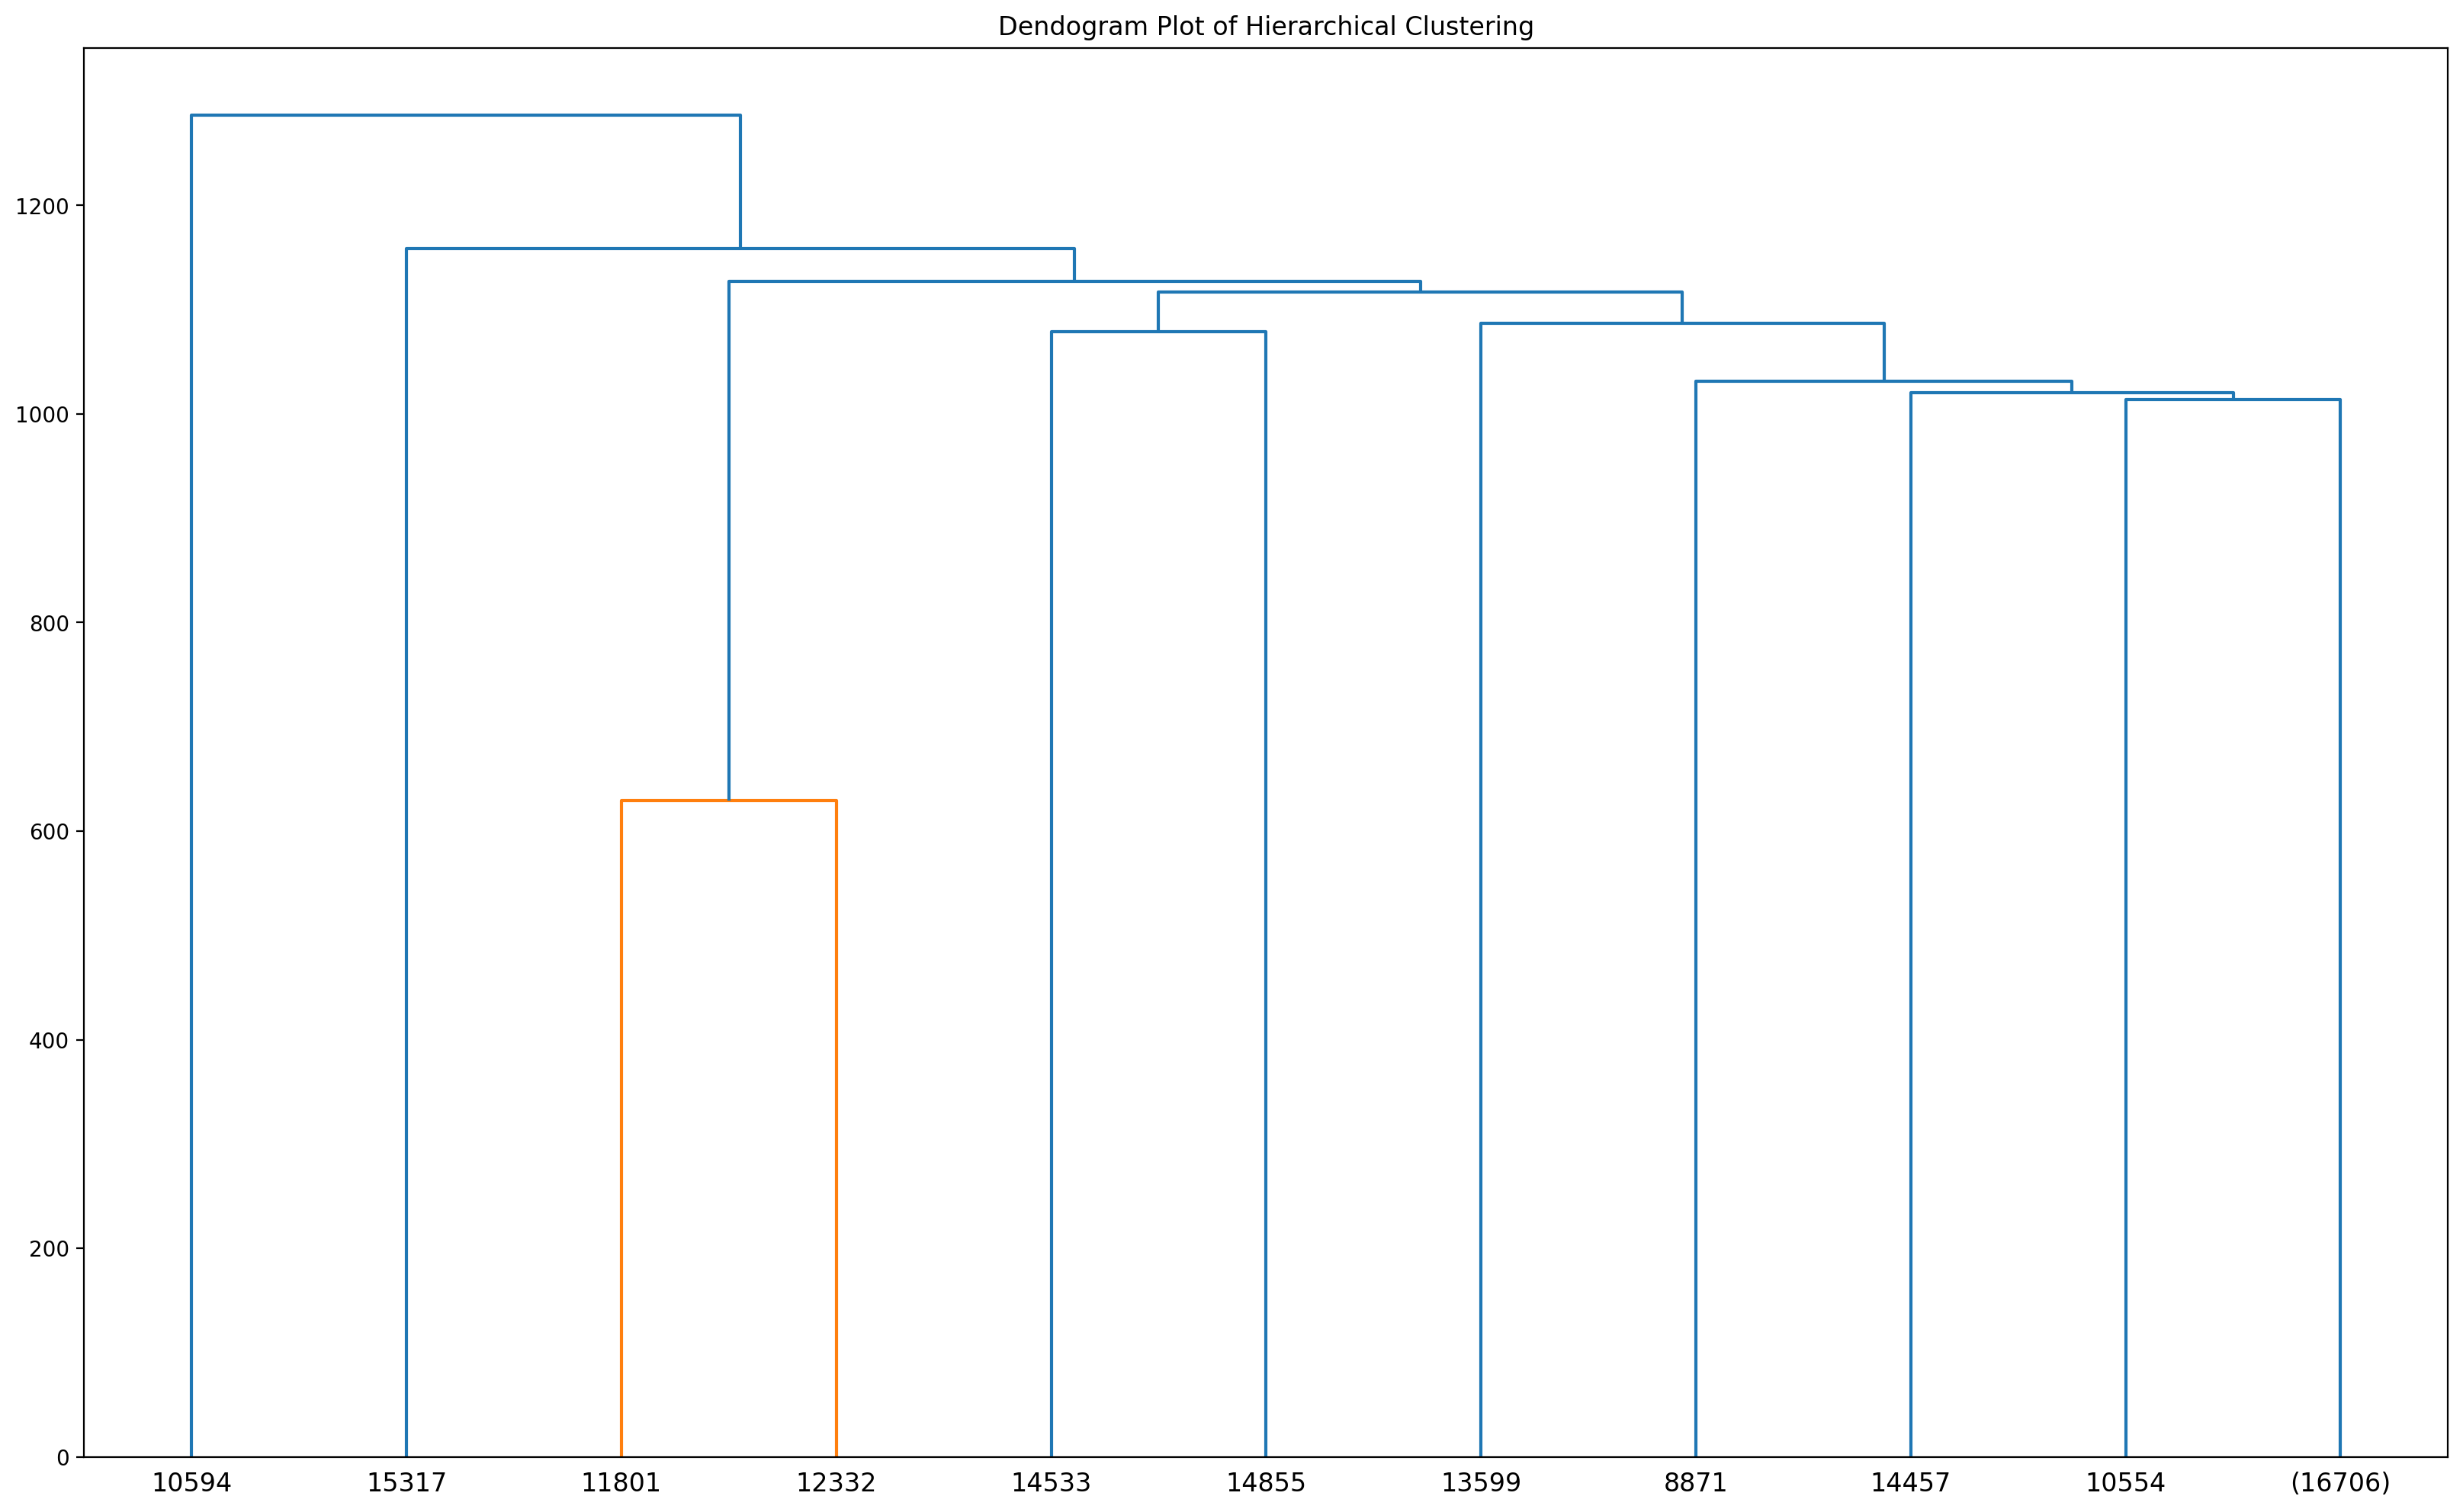

In [306]:
#plot the dendogram
plt.figure(figsize=(20,12), dpi = 200,)
dendrogram(Z=matrix_link,truncate_mode= 'level', p= 7);
plt.title('Dendogram Plot of Hierarchical Clustering');

### Clustering using DBSCAN

In [307]:
#import libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score


In [308]:
#instatiate the model and define eps and min_samples parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
# Fit the model and predict the labels
labels = dbscan.fit_predict(X_ulsd)


In [309]:
#check the number of groups
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87], dtype=int64)

In [310]:
#defining a function to evaluate the clustering
def clustering_performance_metrics(clustering_algo, X, y_true):
    """
    This function computes intrinsic and extrinsic performance metrics for clustering algorithms.

    Parameters:
    clustering_algo (object): The clustering algorithm object such as KMeans
    X (array-like): The scaled data to be clustered.
    ytrue (array-like): The true cluster labels.

    Returns:
    df_cmetrics (dataframe): A dataframe of performance metrics.
    """
    # Fit the clustering algorithm to the data
    clustering_algo.fit_predict(X)
    
    # Compute intrinsic performance metrics
    dbs = davies_bouldin_score(X, clustering_algo.labels_)
    sils= silhouette_score(X, clustering_algo.labels_)
    chs = calinski_harabasz_score(X, clustering_algo.labels_)
    
    # Compute extrinsic performance metrics
    ars = adjusted_rand_score(y_true, clustering_algo.labels_)
    vms = v_measure_score(y_true, clustering_algo.labels_)
    ami = adjusted_mutual_info_score(y_true, clustering_algo.labels_)
    hs = homogeneity_score(y_true, clustering_algo.labels_)

    # Create a dataframe of the performance metrics
    df_imetrics = pd.DataFrame({
        "Davies-Bouldin Score" : [dbs],
        "Silhouette Score" : [sils], 
        "Calinski-Harabasz Score" : [chs]})
    
    df_emetrics = pd.DataFrame({
        "Adjusted Rand Index" : [ars],
        "V-Measure Score" : [vms],
        "Adjusted Mutual Information Score" : [ami],
        'Homogeneity Score' : [hs]
    })
    
    return df_imetrics, df_emetrics


In [311]:
df_imetrics, df_emetrics = clustering_performance_metrics(dbscan, X_ulsd, video_games['Rating'])
print("Internal Evaluation Measures")
print(f'********************************')
display(df_imetrics)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(df_emetrics)

Internal Evaluation Measures
********************************


Davies-Bouldin Score  Silhouette Score  Calinski-Harabasz Score
0              1.607264           -0.4248                72.177407


Extrinsic Performance Metrics:
********************************


Adjusted Rand Index  V-Measure Score  Adjusted Mutual Information Score  \
0            -0.048989         0.190114                           0.183599   

   Homogeneity Score  
0           0.206419

In [312]:
df_imetrics, df_emetrics = clustering_performance_metrics(dbscan, X_ulsd, video_games['Genre'])
print("Internal Evaluation Measures")
print(f'********************************')
display(df_imetrics)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(df_emetrics)

Internal Evaluation Measures
********************************


Davies-Bouldin Score  Silhouette Score  Calinski-Harabasz Score
0              1.607264           -0.4248                72.177407


Extrinsic Performance Metrics:
********************************


Adjusted Rand Index  V-Measure Score  Adjusted Mutual Information Score  \
0             0.018752         0.055948                           0.041894   

   Homogeneity Score  
0           0.048208

In [313]:
df_imetrics, df_emetrics=df_imetrics, df_emetrics = clustering_performance_metrics(dbscan, X_ulsd, 
                                                                                   video_games['Main_Platforms'])
print("Internal Evaluation Measures")
print(f'********************************')
display(df_imetrics)
print()
print("Extrinsic Performance Metrics:")
print(f'********************************')
display(df_emetrics)



Internal Evaluation Measures
********************************


Davies-Bouldin Score  Silhouette Score  Calinski-Harabasz Score
0              1.607264           -0.4248                72.177407


Extrinsic Performance Metrics:
********************************


Adjusted Rand Index  V-Measure Score  Adjusted Mutual Information Score  \
0            -0.002877         0.103883                           0.090513   

   Homogeneity Score  
0           0.088819